# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Models

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from import_file import *
from helpers.parallel_helper import *
load_libs()

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0.
plt.rcParams['axes.ymargin'] = 0.
mpl.rcParams['patch.force_edgecolor'] = True

## 1.2 Read Data

In [2]:
# file_path, bandwidth= './data/NCDC/europe/uk/marham/dat.txt', 1.7
# file_path, bandwidth= './data/NCDC/europe/uk/tiree/dat.txt', 1.9
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NCDC/europe/uk/boscombe_down/dat.txt', 1.5, 4
# file_path, bandwidth= './data/NCDC/europe/uk/middle_wallop/dat.txt', 1.3
# file_path, bandwidth= './data/NCDC/europe/uk/bournemouth/dat.txt',1.3 # 4?
# file_path= "./data/NCDC/europe/uk/weybourne/dat.txt"
# file_path= "./data/NCDC/europe/uk/skye_lusa/dat.txt" # 
# file_path= "./data/NCDC/europe/uk/wattisham/dat.txt"
# file_path= "./data/NCDC/europe/uk/south_uist_range/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/holbeach/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/cambridge/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/us/baltimore/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/bealach_na_ba/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?
# file_path= './data/NCDC/europe/uk/southhamption/dat.txt' # high 0, trend

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = "./data/NCDC/europe/germany/landsberg_lech/dat.txt", 0.9, 4 
# file_path, bandwidth= "./data/NCDC/europe/germany/neuburg/dat.txt", 0.7
# file_path, bandwidth= "./data/NCDC/europe/germany/laupheim/dat.txt", 0.7 # double peak, 4?, trend
# file_path, bandwidth= './data/NCDC/europe/germany/niederstetten/dat.txt', 0.9 # get the peak
# file_path, bandwidth= "./data/NCDC/europe/germany/holzdorf/dat.txt", 0.9 # 2008 year
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/europe/france/nantes/dat.txt', 0.9, 4 # unit shift, one direction deviate big
# file_path, convert_to_knot= './data/NCDC/europe/france/pau_pyrenees/dat.txt', True # unit shift, 2; force using knot 
# file_path= "./data/NCDC/europe/france/avord/dat.txt" # try 4, initial speed (should be good with m/s), incompete dataset
# file_path= "./data/NCDC/europe/france/vatry/dat.txt"  # double peak, initial speed, incompete dataset
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= "./data/NCDC/europe/spain/valladolid/dat.txt", 1.1, 4
# file_path= './data/NCDC/europe/spain/jerez/dat.txt' # high 0
# file_path, bandwidth= "./data/NCDC/europe/spain/barayas/dat.txt", 0.7 # not good fit
# file_path, bandwidth= './data/NCDC/europe/spain/malaga/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/tenerife_sur/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/almeria/dat.txt', 0.7 # negative dimensions?
# file_path, bandwidth= './data/NCDC/europe/greece/eleftherios_intl/dat.txt',0.7 # some direction might be blocked
# file_path= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?
# file_path= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# file_path= './data/NCDC/gibraltar/dat.txt' # bad fit

# MidEast
# file_path, bandwidth= './data/NCDC/mideast/uae/al_maktoum/dat.txt', 1.1
# file_path= './data/NCDC/mideast/uae/sharjah_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/dubai_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/abu_dhabi_intl/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/uae/bateen/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/buraimi/dat.txt' # not good dataset
# file_path= './data/NCDC/mideast/turkey/konya/dat.txt' 
# file_path= './data/NCDC/mideast/turkey/sivas/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/balikesir/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/bartin/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/iran/chahbahar/dat.txt'
# file_path= './data/NCDC/mideast/iran/zabol/dat.txt' # Problematic data
# file_path= './data/NCDC/mideast/iran/torbat_heydarieh/dat.txt' # Unusable

# file_path, bandwidth = "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt", 0.6
# file_path, bandwidth= "./data/NCDC/cn/shanghai/pudong/dat.txt", 0.8
# file_path, bandwidth= "./data/NCDC/cn/hefei_luogang/dat.txt", 0.6 # few 0, trend
# file_path, bandwidth= "./data/NCDC/cn/nanjing_lukou/dat.txt", 0.5
# file_path= "./data/NCDC/cn/zhengzhou_xinzheng/dat.txt" 
# file_path= "./data/NCDC/cn/tianjin/binhai/dat.txt" # few 0, trend, stationary speed, unstationary direction
# file_path= "./data/NCDC/cn/tianjin/tianjing/dat.txt" # 16 sectors
# file_path= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# file_path= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# file_path= "./data/NCDC/cn/nanning_wuxu/dat.txt" # numpy priblem, unstationary speed
# file_path= './data/NCDC/cn/macau/dat.txt'  
# file_path= "./data/NCDC/cn/hk_intl/dat.txt" # few 0
# file_path= './data/NCDC/cn/gaoqi/dat.txt' 

# file_path= './data/NCDC/southeast_asia/malaysia/mersing/dat.txt' # 2 mode, paper comparison
# file_path= './data/NCDC/southeast_asia/malaysia/penang/dat.txt'
# file_path= './data/NCDC/southeast_asia/malaysia/butterworth/dat.txt' # 2 mode 
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_mahmud/dat.txt" # stable
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_ismail/dat.txt" # 
# file_path= "./data/NCDC/southeast_asia/singapore/changi/dat.txt" # trend, no 0, questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/paya_lebar/dat.txt" # questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/seletar/dat.txt"
# file_path= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good; numpy problem
# file_path= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good; numpy problem

# file_path, bandwidth= "./data/NCDC/oceania/auckland_intl/dat.txt", 0.9  # Good data, double mode
# file_path= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0, few data 
# file_path= "./data/NCDC/oceania/narrandera/dat.txt" # high 0, few data
# file_path, bandwidth= "./data/NCDC/oceania/canberra/dat.txt", 0.7 # high 0, bad fit
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/oceania/horsham/dat.txt', 0.9, 4 # get the peak

# file_path, bandwidth= './data/NCDC/us/boston_16nm/dat.txt', 0.9 # Offshore, mixed type

# file_path, bandwidth, NUMBER_OF_GAUSSIAN  = './data/asos/bismarck_ND/hr_avg.csv', 1.1, 4
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/aberdeen_SD/hr_avg.csv', 1.7, 2 # only to 2012
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/minneapolis/hr_avg.csv', 1.1, 4
# file_path, bandwidth = './data/asos/lincoln_NE/hr_avg.csv', 0.9
# file_path, bandwidth = './data/asos/des_moines_IA/hr_avg.csv', 1.3
# file_path, bandwidth = './data/asos/springfield_IL/hr_avg.csv', 1.1 
# file_path, bandwidth = './data/asos/topeka/hr_avg.csv', 0.7 # High 0
# file_path, bandwidth = './data/asos/denver/hr_avg.csv', 1.3
# file_path, bandwidth= './data/asos/olympia/hr_avg.csv', 0.5 # might block

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NDAWN/baker/hr_avg.csv', 0.7, 4 
# file_path, bandwidth = './data/NDAWN/dickinson/hr_avg.csv', 0.6
# file_path = './data/NDAWN/rugby/hr_avg.csv'
# file_path = './data/NDAWN/bowman/hr_avg.csv'
# file_path = './data/NDAWN/grand_forks/hr_avg.csv'
# file_path = './data/NDAWN/williston/hr_avg.csv'
# file_path = './data/NDAWN/jamestown/hr_avg.csv'

# file_path= 'data/ECMWF/spain/28N16W/dat.csv'
# file_path= 'data/ECMWF/yemen/13N42E/dat.csv'
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= 'data/ECMWF/portugal/36N5W/dat.csv', 0.9, 4
# file_path= 'data/ECMWF/greece/38N25E/dat.csv'
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= 'data/ECMWF/greece/37N22E/dat.csv', 1.3, 4
# file_path= 'data/ECMWF/usa/56N88W/dat.csv'
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= 'data/ECMWF/usa/38N122W/dat.csv', 0.7, 4
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = 'data/ECMWF/usa/47N123W/dat.csv', 0.7, 4 #good
# file_path, bandwidth = 'data/ECMWF/venezuela/8N67W/dat.csv', 0.7 # good, but the data might be problematic.
# file_path, bandwidth = 'data/ECMWF/chile/52S75W/dat.csv', 1.9 # good
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = 'data/ECMWF/iceland/65N17W/dat.csv', 1.9, 4 # good
file_path, bandwidth, NUMBER_OF_GAUSSIAN  = 'data/ECMWF/germany/49N9E/dat.csv', 0.9, 4 # good
# file_path, bandwdith = 'data/ECMWF/sudan/18N32E/dat.csv', 1.1 # good
# file_path, bandwidth = 'data/ECMWF/china/24N121E/dat.csv', 0.9 # good
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = 'data/ECMWF/australia/37S142E/dat.csv', 0.9, 5 # miss the peak

In [3]:
del bandwidth

In [4]:
if "cn_database" in file_path: 
    df = read_cn_database(file_path)
elif 'NCDC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
    df.dropna(subset=['dir','speed'], inplace=True)
    integer_data = True
elif 'NDAWN' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    convert_to_knot = False
    integer_data = False
elif 'asos' in file_path:
    # ASOS
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    convert_to_knot = False
    integer_data = False
    knot_unit = True
else:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True)
    df.rename(columns={'U':'x','V':'y'}, inplace=True)
    df.x=-df.x
    df.y=-df.y
    df['speed']=np.sqrt(df.x**2+df.y**2)
    df['dir']=np.degrees(np.arctan2(df.y, df.x))%360
    df['time']=pd.to_datetime('1979-01-01T00:00:00Z')+pd.to_timedelta(df['time'], unit='h')
    df['date']=df['time'].dt.strftime('%Y%m%d')
    df['date']=df['date'].astype(int)
    df['HrMn']=df['time'].dt.strftime('%H00')
    df['type']='default'
    df['wind_type']='default'
    convert_to_knot = True
    integer_data = False
    cartesian = True

In [5]:
df

time        lat  lon         x         y     speed  \
0     1979-01-01 00:00:00  49.000004    9 -5.259441  3.808680  6.493672   
1     1979-01-01 06:00:00  49.000004    9 -3.885094  4.099794  5.648209   
2     1979-01-01 12:00:00  49.000004    9 -3.586332  4.292035  5.593152   
3     1979-01-01 18:00:00  49.000004    9 -3.146370  2.069498  3.765962   
4     1979-01-02 00:00:00  49.000004    9 -3.158253  2.541553  4.053893   
5     1979-01-02 06:00:00  49.000004    9 -3.091016  0.526533  3.135541   
6     1979-01-02 12:00:00  49.000004    9 -4.692710 -0.467602  4.715949   
7     1979-01-02 18:00:00  49.000004    9 -2.537054 -3.812231  4.579274   
8     1979-01-03 00:00:00  49.000004    9 -2.143074  0.380564  2.176602   
9     1979-01-03 06:00:00  49.000004    9 -1.758084  2.064261  2.711463   
10    1979-01-03 12:00:00  49.000004    9 -4.451693 -0.259116  4.459227   
11    1979-01-03 18:00:00  49.000004    9 -2.091751 -1.274903  2.449653   
12    1979-01-04 00:00:00  49.000004    9  0.837700 -2.594853  2.726720   
13    1979-01-04 06:00:00  49.000004    9  3.462572 -0.308320  3.476272   
14    1979-01-04 12:00:00  49.000004    9  4.776464  0.662784  4.822229   
15    1979-01-04 18:00:00  49.000004    9  4.009622  1.636163  4.330600   
16    1979-01-05 00:00:00  49.000004    9  2.882386  0.995608  3.049489   
17    1979-01-05 06:00:00  49.000004    9  3.125946  0.634004  3.189592   
18    1979-01-05 12:00:00  49.000004    9  3.668369  0.749048  3.744063   
19    1979-01-05 18:00:00  49.000004    9  2.947110  0.399206  2.974025   
20    1979-01-06 00:00:00  49.000004    9  2.820947  0.215523  2.829168   
21    1979-01-06 06:00:00  49.000004    9  2.005646  0.159345  2.011966   
22    1979-01-06 12:00:00  49.000004    9  0.984459 -0.249097  1.015485   
23    1979-01-06 18:00:00  49.000004    9  2.198173 -0.174083  2.205055   
24    1979-01-07 00:00:00  49.000004    9  1.331763 -2.051945  2.446237   
25    1979-01-07 06:00:00  49.000004    9  1.656956 -2.358913  2.882702   
26    1979-01-07 12:00:00  49.000004    9  0.226722 -1.779520  1.793905   
27    1979-01-07 18:00:00  49.000004    9 -1.040112 -2.626732  2.825165   
28    1979-01-08 00:00:00  49.000004    9 -1.723644 -2.469735  3.011734   
29    1979-01-08 06:00:00  49.000004    9 -1.334214 -2.708086  3.018916   
...                   ...        ...  ...       ...       ...       ...   
55614 2017-01-24 12:00:00  49.000004    9  1.175126  1.526905  1.926749   
55615 2017-01-24 18:00:00  49.000004    9  1.572231  1.041986  1.886172   
55616 2017-01-25 00:00:00  49.000004    9  2.171187  0.242198  2.184654   
55617 2017-01-25 06:00:00  49.000004    9  2.240311  0.192910  2.248601   
55618 2017-01-25 12:00:00  49.000004    9  4.472687 -0.300002  4.482737   
55619 2017-01-25 18:00:00  49.000004    9  1.326900 -1.074772  1.707571   
55620 2017-01-26 00:00:00  49.000004    9  2.832052 -1.082505  3.031887   
55621 2017-01-26 06:00:00  49.000004    9  1.442935 -1.804380  2.310379   
55622 2017-01-26 12:00:00  49.000004    9  2.538780 -0.811714  2.665386   
55623 2017-01-26 18:00:00  49.000004    9  2.085619 -2.217385  3.044110   
55624 2017-01-27 00:00:00  49.000004    9  2.213448 -2.297133  3.190011   
55625 2017-01-27 06:00:00  49.000004    9  1.664686 -1.795107  2.448181   
55626 2017-01-27 12:00:00  49.000004    9  1.535803 -0.656180  1.670109   
55627 2017-01-27 18:00:00  49.000004    9  2.608135 -0.519905  2.659449   
55628 2017-01-28 00:00:00  49.000004    9  2.094699 -1.592822  2.631510   
55629 2017-01-28 06:00:00  49.000004    9  0.310671 -2.813739  2.830838   
55630 2017-01-28 12:00:00  49.000004    9  0.116953 -1.428000  1.432781   
55631 2017-01-28 18:00:00  49.000004    9  1.346227 -1.969069  2.385279   
55632 2017-01-29 00:00:00  49.000004    9  0.286408 -2.359851  2.377168   
55633 2017-01-29 06:00:00  49.000004    9 -0.699931 -2.058898  2.174618   
55634 2017-01-29 12:00:00  49.000004    9 -1.706397 -2.423789  2.964210   
55635 2017-01-29 18:00:00  49.000004    9 -0.5

In [6]:
if 'NCDC' in file_path:
    lat, long = get_lat_long(file_path)
    print(lat,long)
    map_osm = folium.Map(location=[lat, long], zoom_start=4)
    folium.Marker([lat, long]).add_to(map_osm)
    display(map_osm)

In [7]:
df['time']=pd.to_datetime(df["date"].astype(str).map(str) + df["HrMn"], format='%Y%m%d%H%M')
df.set_index(['time'], inplace=True)
df['HrMn']=df['HrMn'].astype(int)
df = df.query("(dir <= 999) & (speed < 100) ")['1970':'2016']

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


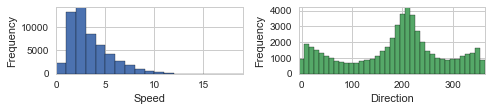

In [8]:
plot_speed_and_angle_distribution(df.speed, df.dir)

lat      lon             x             y         speed  \
count  5.552000e+04  55520.0  55520.000000  55520.000000  55520.000000   
mean   4.900000e+01      9.0     -1.134798     -0.610110      3.442735   
std    3.157680e-11      0.0      3.144751      2.163517      2.092285   
min    4.900000e+01      9.0    -18.459015    -10.437421      0.033510   
25%    4.900000e+01      9.0     -3.194437     -1.915772      1.916510   
50%    4.900000e+01      9.0     -1.002650     -0.648953      2.825749   
75%    4.900000e+01      9.0      1.270575      0.862142      4.538925   
max    4.900000e+01      9.0     11.432183      9.439298     18.862267   

                dir          date          HrMn  dir_windrose  
count  55520.000000  5.552000e+04  55520.000000  55520.000000  
mean     186.477529  1.997567e+07    900.000000    189.492932  
std       96.377499  1.096640e+05    670.826435     90.756804  
min        0.000035  1.979010e+07      0.000000      0.004482  
25%      124.315837  1.988070e+07    450.000000    105.054083  
50%      201.332191  1.997567e+07    900.000000    218.048916  
75%      243.528664  2.007070e+07   1350.000000    255.543928  
max      359.992452  2.016123e+07   1800.000000    359.996790

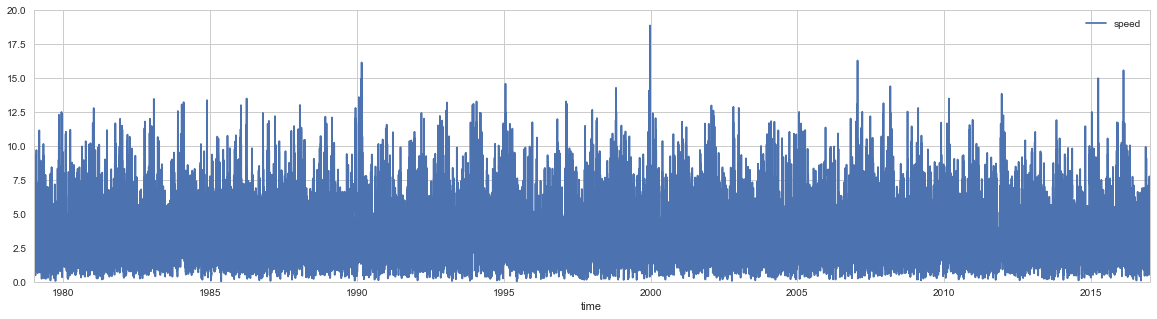

In [9]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
# Convert Windrose coordianates to Polar Cooridinates 
if 'cartesian' in globals():
    df['dir_windrose'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
else:
    df['dir_windrose'] = df['dir']
    df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
display(df.describe())
df.plot(y='speed',legend=True,figsize=(20,5))

## 1.3 General Data Info

### 1.3.1 Unit Detection

True


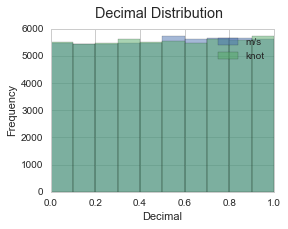

In [10]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))

if 'convert_to_knot' not in globals():
    convert_to_knot = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False
    
if convert_to_knot:
    knot_unit = True
    df['speed'] = df['speed'] * 1.943845
    df['decimal'] = df.speed % 1
    df.decimal.hist(alpha=0.5, label='knot')
    # need more elaboration, some is not near an integer
    if integer_data:
        df['speed'] = df['speed'].apply(lambda x: int(round(x)))
    plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')
else:
    if 'knot_unit' not in globals():
        knot_unit = False
    
df.drop(['decimal'], 1,inplace=True)
print(knot_unit)

In [11]:
dir_unit_text = ' (degree)'
if knot_unit == True:
    speed_unit_text = ' (knot)'
    dir_power_density_unit=''
    speed_power_density_unit=''
else: 
    speed_unit_text = ' (m/s)'
    dir_power_density_unit=' (W/(m$^2$rad))'
    speed_power_density_unit=' (W/(m$^3$/s))'

### 1.3.2 Sampling Type Selection

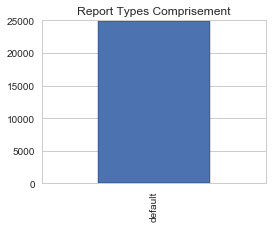

In [12]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.3.3 Sampling Time Selection

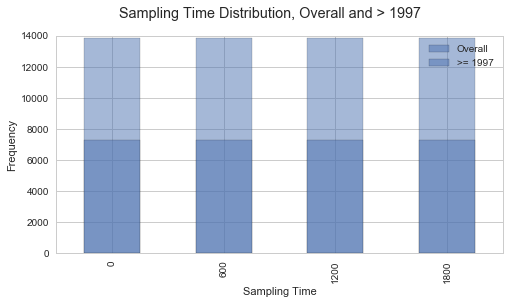

In [13]:
MID_YEAR = int(np.average(df.index.year))

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5,label='Overall')
df[str(MID_YEAR):]['HrMn'].value_counts().sort_index().plot(
    kind='bar', alpha=0.5, label='>= %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 4), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

[0]


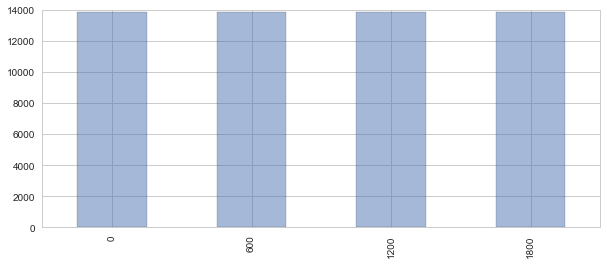

In [14]:
df['sample_time'] = df.HrMn % 100 
sample_time = df['2000':]['sample_time']
sample_times = sample_time.value_counts()[sample_time.value_counts() > 2000]
sample_times = sample_times.index.tolist()
# df = df.query("sample_time in @sample_times")
df = df.query("sample_time == @sample_times[0]")
df.drop(['sample_time'], 1,inplace=True)
print(sample_times)

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5, figsize=(10, 4))

## 1.4 Error Data handling and Adjustment

### 1.4.1 Artefacts

wrong direction record

In [15]:
if integer_data:
    display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
    df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

sudden increase in speed

lat  lon          x          y      speed  \
time                                                                   
1999-12-26 12:00:00  49.000004    9 -18.459015  -3.879420  36.665324   
2007-01-18 18:00:00  49.000004    9 -13.070150  -9.708096  31.648038   
1990-03-01 00:00:00  49.000004    9 -15.252164  -5.274023  31.370299   
2016-02-08 12:00:00  49.000004    9 -12.679472  -9.022505  30.250039   
2007-01-18 12:00:00  49.000004    9 -11.624750  -9.768187  29.515242   
2015-03-31 12:00:00  49.000004    9 -14.935374  -1.083457  29.108342   
1990-02-27 12:00:00  49.000004    9 -14.275352   4.459485  29.071545   
1995-01-23 00:00:00  49.000004    9 -10.490368 -10.114553  28.326298   
2008-03-01 06:00:00  49.000004    9 -12.938262  -6.290564  27.965020   
1998-10-28 12:00:00  49.000004    9 -11.552151  -8.375764  27.736810   

                            dir      date  HrMn     type wind_type  \
time                                                                 
1999-12-26 12:00:00  191.868777  19991226  1200  default   default   
2007-01-18 18:00:00  216.603803  20070118  1800  default   default   
1990-03-01 00:00:00  199.074797  19900301     0  default   default   
2016-02-08 12:00:00  215.435033  20160208  1200  default   default   
2007-01-18 12:00:00  220.040074  20070118  1200  default   default   
2015-03-31 12:00:00  184.149140  20150331  1200  default   default   
1990-02-27 12:00:00  162.651689  19900227  1200  default   default   
1995-01-23 00:00:00  223.955093  19950123     0  default   default   
2008-03-01 06:00:00  205.928951  20080301   600  default   default   
1998-10-28 12:00:00  215.943589  19981028  1200  default   default   

                     dir_windrose      incre  incre_reverse  
time                                                         
1999-12-26 12:00:00    258.131223  22.928554      24.310525  
2007-01-18 18:00:00    233.396197   2.132796       4.815835  
1990-03-01 00:00:00    250.925203  11.028935      10.918585  
2016-02-08 12:00:00    234.564967  11.983324       8.047382  
2007-01-18 12:00:00    229.959926   5.412561      -2.132796  
2015-03-31 12:00:00    265.850860   2.433806      13.824820  
1990-02-27 12:00:00    287.348311   6.116639      11.107784  
1995-01-23 00:00:00    226.044907   3.283661       4.553974  
2008-03-01 06:00:00    244.071049   5.726400       1.865342  
1998-10-28 12:00:00    234.056411   3.410429       3.871098

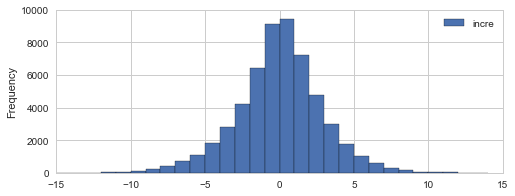

In [16]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [17]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

# Check the max speed
display(df.sort_values(by='speed',ascending=False).head(10))
df.drop(['incre', 'incre_reverse'], 1, inplace=True)

sudden increase number 1


lat  lon          x          y      speed  \
time                                                                   
2007-01-18 18:00:00  49.000004    9 -13.070150  -9.708096  31.648038   
1990-03-01 00:00:00  49.000004    9 -15.252164  -5.274023  31.370299   
2016-02-08 12:00:00  49.000004    9 -12.679472  -9.022505  30.250039   
2007-01-18 12:00:00  49.000004    9 -11.624750  -9.768187  29.515242   
2015-03-31 12:00:00  49.000004    9 -14.935374  -1.083457  29.108342   
1990-02-27 12:00:00  49.000004    9 -14.275352   4.459485  29.071545   
1995-01-23 00:00:00  49.000004    9 -10.490368 -10.114553  28.326298   
2008-03-01 06:00:00  49.000004    9 -12.938262  -6.290564  27.965020   
1998-10-28 12:00:00  49.000004    9 -11.552151  -8.375764  27.736810   
1990-02-26 12:00:00  49.000004    9 -10.633822  -9.447149  27.649567   

                            dir      date  HrMn     type wind_type  \
time                                                                 
2007-01-18 18:00:00  216.603803  20070118  1800  default   default   
1990-03-01 00:00:00  199.074797  19900301     0  default   default   
2016-02-08 12:00:00  215.435033  20160208  1200  default   default   
2007-01-18 12:00:00  220.040074  20070118  1200  default   default   
2015-03-31 12:00:00  184.149140  20150331  1200  default   default   
1990-02-27 12:00:00  162.651689  19900227  1200  default   default   
1995-01-23 00:00:00  223.955093  19950123     0  default   default   
2008-03-01 06:00:00  205.928951  20080301   600  default   default   
1998-10-28 12:00:00  215.943589  19981028  1200  default   default   
1990-02-26 12:00:00  221.618073  19900226  1200  default   default   

                     dir_windrose      incre  incre_reverse  
time                                                         
2007-01-18 18:00:00    233.396197   2.132796       4.815835  
1990-03-01 00:00:00    250.925203  11.028935      10.918585  
2016-02-08 12:00:00    234.564967  11.983324       8.047382  
2007-01-18 12:00:00    229.959926   5.412561      -2.132796  
2015-03-31 12:00:00    265.850860   2.433806      13.824820  
1990-02-27 12:00:00    287.348311   6.116639      11.107784  
1995-01-23 00:00:00    226.044907   3.283661       4.553974  
2008-03-01 06:00:00    244.071049   5.726400       1.865342  
1998-10-28 12:00:00    234.056411   3.410429       3.871098  
1990-02-26 12:00:00    228.381927   7.310807       1.768563

### 1.4.2 Direction re-aligment 
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,50 ...], need to redistribute the angle into 22.5, e.g. [0, 22.5, 45...]

In [18]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
if integer_data:
    SECTOR_LENGTH = 360/len(effective_column) 
else: 
    SECTOR_LENGTH = 10
print(len(effective_column), SECTOR_LENGTH)

0.000035      1
0.006102      1
0.006390      1
0.020004      1
0.027536      1
0.030345      1
0.036918      1
0.037471      1
0.040490      1
0.041966      1
0.043930      1
0.045676      1
0.054019      1
0.062234      1
0.063787      1
0.064978      1
0.065871      1
0.067651      1
0.078062      1
0.084875      1
0.088975      1
0.095155      1
0.104266      1
0.105413      1
0.108156      1
0.133102      1
0.139064      1
0.139833      1
0.143056      1
0.158318      1
             ..
359.872077    1
359.876339    1
359.878094    1
359.882619    1
359.889456    1
359.890069    1
359.898559    1
359.906029    1
359.907017    1
359.910107    1
359.910577    1
359.916105    1
359.922276    1
359.927043    1
359.928531    1
359.930109    1
359.931862    1
359.933210    1
359.935315    1
359.938206    1
359.941290    1
359.941586    1
359.945658    1
359.953069    1
359.955434    1
359.960728    1
359.964867    1
359.982705    1
359.985216    1
359.992452    1
Name: dir, dtype: int64

0 10


In [19]:
df=realign_direction(df, effective_column)

### 1.4.3 0 Speed

In [20]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df['2005':])
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

False 0.00815651380333


Series([], Name: speed, dtype: int64)


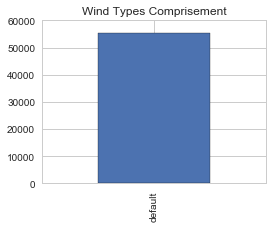

In [21]:
print(df.query('dir == 999')['speed'].value_counts())
df=fill_direction_999(df, SECTOR_LENGTH)

## 1.5 Time Shift Comparison

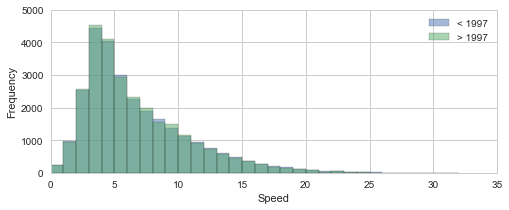

In [22]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, df.speed.max() + 1)
df[:str(MID_YEAR)]['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df[str(MID_YEAR+1):]['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(8, 3))

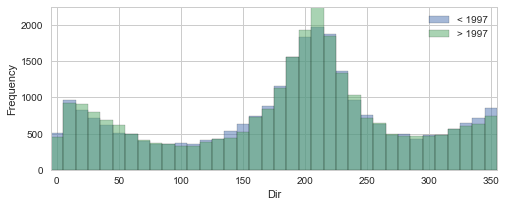

In [23]:
df[:str(MID_YEAR)]['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df[str(MID_YEAR+1):]['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3), tight='x')

In [24]:
display(df[df['dir'].isnull()])
df.dropna(subset=['dir'], inplace=True)

Empty DataFrame
Columns: [lat, lon, x, y, speed, dir, date, HrMn, type, wind_type, dir_windrose]
Index: []

1979 - 1980


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


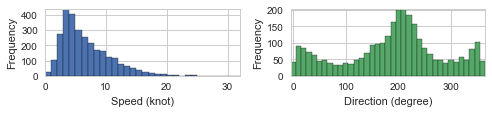

1981 - 1985


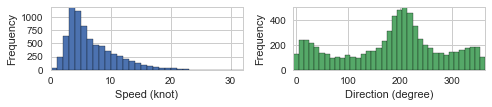

1986 - 1990


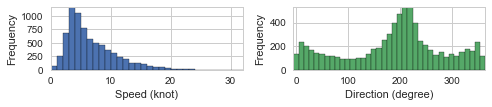

1991 - 1995


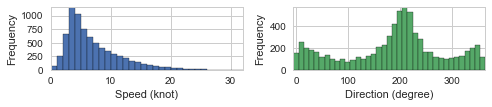

1996 - 2000


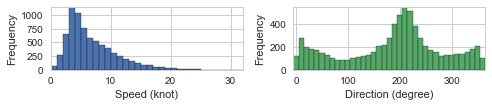

2001 - 2005


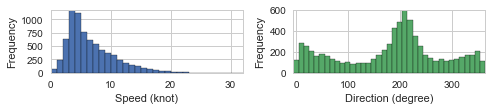

2006 - 2010


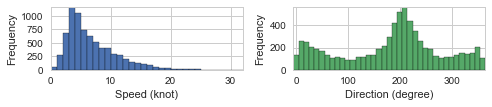

2011 - 2015


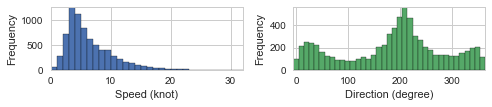

In [25]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df, speed_unit_text=speed_unit_text, dir_unit_text=dir_unit_text)

(0, 14.0)

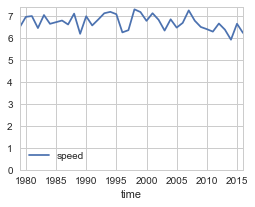

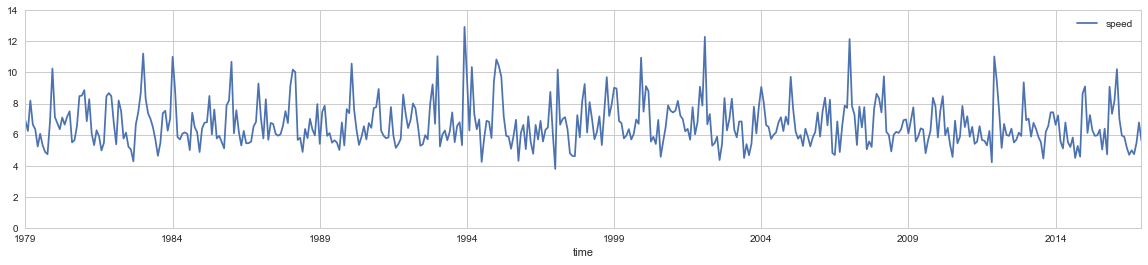

In [26]:
df.resample('A').mean().plot(y='speed', figsize=(4,3))
plt.gca().set_ylim(bottom=0)
df.resample('M').mean().plot(y='speed', figsize=(20,4))
plt.gca().set_ylim(bottom=0)

In [27]:
%%time
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    den, _ = np.histogram(df[column], bins=bins, density=True)
    y_top=max(den)*1.2
    for year in arange(1980, 2016):
        end_year = year
        sub_df = df[str(year):str(end_year)]
        if len(sub_df) > 1000:
            plt.figure()
            df[column].hist(bins=bins, alpha=0.3, normed=True)
            sub_df[column].hist(bins=bins, alpha=0.5, figsize=(3,1.5), normed=True)
            plt.gca().set_ylim(top=y_top)
            plt_configure(title=str(year))
    align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANYAAAB6CAYAAADDPa27AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEVFJREFUeJzt3XlsVOW7wPHvtEM7052lAgKtLYiIVUtFirlK8sMFIxcM
AlIkcCPIHyaIpIgsshSotBCQREIIUUhIkahBNKBXjCgJmwsFaij7RWihUChdpp2lne3cPwYOM2UZ
aHs6S5/PPzDnnPf0OYVn3jPved9ndIqiKAgh2lREoAMQIhxJYgmhAUksITQgiSWEBiSxhNCAJJYQ
GpDEClKKovDee++xdetWdVtdXR0fffQR2dnZvPjii3z++ee43W51v9lsZsGCBQwdOpShQ4cyd+5c
amtr1f0Oh4Nly5aRnZ1NdnY2q1atwuVytet1dRSSWEHI5XKRl5fH/v37fbZ/8MEHnD59mg0bNrB+
/Xp+/fVXVq9ere5funQp586dY/PmzWzatIlz586xcOFCdf9nn33GgQMH2LhxI2vXrmXnzp1s3Lix
3a6rQ1FEUCkvL1dycnKU//znP8rgwYOVoqIiRVEUpbS0VOnfv79y4sQJ9dhjx44pTz31lGKxWBRF
UZSsrCxl165d6v6dO3cqmZmZiqIoSmNjo/Lss88qe/bsUffv2LFDeeGFFxSXy9Uel9ahSI8VZI4d
O0Z6ejo7duwgPj5e3V5eXo7BYGDgwIHqtgEDBuBwOCgtLQWgc+fO7Nq1i4aGBsxmMz/++CMZGRkA
nDp1CpvNxpAhQ9T2gwcPprq6mvLy8na6uo5DH+gAhK/Ro0czevToO7YnJyfT2NhITU0NXbp0AaCi
ogKAmpoaAJYvX86cOXN4/vnnAejTpw/btm0D4Nq1axiNRp9kTU5OBqCyspLHHntMs2vqiKTHChHP
PPMMqampLFmyBJPJRG1tLYWFhej1ehwOBwD//vsvaWlpbNmyhS1bthAfH8+cOXNQFAWbzUZ0dLTP
OaOiogCw2+3tfj3hTnqsEBEVFcW6devIzc0lOzsbo9HIjBkzOHHiBHFxcZSXl5Ofn8/u3btJTU0F
YN26dbz88sv8/fffGAyGOxLo1muj0dju1xPuJLFCyBNPPMFPP/1EdXU1cXFxuFwuVq1aRZ8+fSgt
LcVgMKhJBdCrVy86d+7MpUuX6NevH1arFbPZTFxcHABVVVUAdO/ePSDXE87kVjBEmEwm3nnnHSoq
KujatSvR0dHs3buX5ORk+vbtS/fu3bFarVy+fFltc+PGDerq6khJSWHAgAEYjUaOHDmi7i8uLqZb
t26kpKQE4pLCmiRWiEhMTKSpqYmCggIuXrzI/v37WbZsGTNmzECn05GZmUlGRgZz5syhtLSUkydP
kpubS0ZGBoMHD8ZgMDBu3DiWLVvGkSNH+OOPP1izZg1TpkwJ9KWFJZ2iBMdCR+93UuExc+ZMRo4c
yYgRIwC4fv06mzZt4uzZsyQkJDBy5Ehee+019XiTycTWrVs5fvw4AE8//TSTJ08mISEB8Hym2rJl
C3/++SedOnVi2LBh5OTkEBEh76/+PPfccw91fFAl1sMGHwgSZ9sJhRihZXHKW5UQGpDEEkIDklhC
aEASSwgNSGIJoQFJLCE0IIklhAYksYTQgCSWEBqQxBJCA5JYQmggJNdjKYqC1Wq9Y3tMTAw6nS4A
EQnhKyQTy2q1cuDoBQyGGHVbY6OVF7PSiI2NDWBkQniEZGIBGAwxGGNi/B8oRAD4TSy3201eXh5n
zpwhKiqK/Px8n+XfADabjXfffZdPP/2Uvn37AjBmzBh1CXjv3r0pKCjQIHwhgpPfxNqzZw92u51v
vvmGkpISCgsL2bBhg7r/+PHjLFmyhGvXrqnbmpqaUBSFoqIiTYJ2u92Y6mqx2xvVbTarDbc7WZOf
J8TD8ptYR44c4aWXXgIgMzNTLQ55i91uZ/369Xz88cfqttOnT2Oz2Zg6dSpOp5Pc3FwyMzPbLOja
2loOXt5LfFKiuq2hzkRmbbJP3TwhAsVvYnlX9QGIjIzE6XSi13ua3m1lpcFgYNq0aYwfP56LFy8y
ffp0du/erba5lwddnl9ZWUmTy06Uy6Fua3LaOXz4sE9VV4PBoMkoYaiUEQiFOEMhxpbwm1hxcXFY
LBb1tdvt9psgaWlppKamotPpSEtLIykpiaqqKnr27Hnfdg+6/Lm8vJzD1jISb1aEBVAcTmy6JFzR
jwKeUcJBT7b9KGE4Lydvb6EQI7Qs+f0+IM7KymLfvn0AlJSU0L9/f78n3b59O4WFhYCntLHZbFbL
GWspOtqIMcYzWug9FC9Ee/PbY7366qscPHiQnJwcFEVhxYoV7Nq1C6vVyoQJE+7aZty4ccyfP5+J
Eyei0+lYsWKF315OiHDi9397REQEy5Yt89l2a0jdm/cIYFRUFGvWrGmD8IQITTJXUAgNhM39meJ2
01BvwlTn+Uobea4lAilsEstmsVHi+JsrBk/tcnmuJQIpbBILwBAXQ2yiJ5GcToefo4XQjnzGEkID
klhCaEASSwgNSGIJoQFJLCE0IIklhAYksYTQgCSWEBoIqwfE3hQ81Zy815JJeTTRXvz2WG63m8WL
FzNhwgQmT55MWVnZHcfYbDZycnI4f/78A7fRmsvppPhkBcUnr1F88hoHjl64ay1CIbTgN7G8i8nM
nj1bXcB4y/Hjx5k0aRKXLl164DbtRRY+ikDxm1gPWkwmPT39gdsIEe40KSbjr829PEwxmTpTHS6v
j0v19Sb00Z2IrvEsGzGZ6iivLcPhdAPQ2GgjsukKRqPxgX5GW8QZaKEQZyjE2BKaFJNpSRu4dzEZ
t9tNbW3t7aD1ehItZSR5FZOx1JjQR+vpcnOb4nCSkpBK6mOentRmtTJoYPdWF5cJpQIowR5nKMQI
LUt+v//bs7Ky2Lt3L2+88cYDF5NpSZv7qampYcvBb4iN9/SCFWUVOPWGVp1TCC1pUkzmbm1aw2q1
Umd14TZ4PhI22JxExbpadU4htKRJMZm7tWmtSL0efadOnvPrO7XpuYVoa+H7gFhqYIgACtvEal4D
w1RTQ3KcnV69eqnH9OrVi8jIyECFKMJY2CYW+NbAqKm6QVHx//LIZU+Za3OdiZkjJpGSkhLIEEWY
CuvEai4uIYHErl38HyhEK8nsdiE00KF6LG/KzYfO3g+MO3fuTESEvNeI1uuwiWW1WPm+dDc9qnsA
YGkw8z//NYFu3boFODIRDjpsYrmcLuqBWIenh6q3umRZiWgzHTaxAPSRtx86R8rXDIk2JB8ohNCA
JJYQGpD7n5vcbjcVFRU+22RmhmgpSaybzKYGn5kZDTW1TBn63/Tu3dvnOLfbHYjwRIjxm1hut5u8
vDzOnDlDVFQU+fn5pKamqvt///131q9fj16vZ+zYsbz99tsAjBkzRl1F3Lt3bwoKCjS6hLbjPTPD
2mDmx9N76NHQU91vqTfzVPSdM/uFaM5vYnkXhikpKaGwsJANGzYA4HA4KCgoYPv27RiNRiZOnMjw
4cOJj49HURSfpSShRgE6GaIxxNxeUOmwO1DcSuCCEiHDb2LdrzDM+fPnSUlJITExEfAsrT98+DCP
PvooNpuNqVOn4nQ6yc3NJTMzU6NL0IbL6aKyugGd4XaJgfoaE30S5AGy8K9VxWTMZrPPV5HGxsZi
NpsxGAxMmzaN8ePHc/HiRaZPn87u3btbXEymefGY5oVj7ratrV7XNzSoP6PBYoaE0CmAEgpxhkKM
LdGqYjLN91ksFuLj40lLSyM1NRWdTkdaWhpJSUlUVVXRs2fPO87v7V6FRcrLyzlsLSPxZqGY5oVj
7ratrV8DRLjc1NfXM3ToUPV3AfjMLwyW+YahUKglFGKEABST6du3L2VlZdTV1RETE0NxcTHTpk1j
+/btnD17lry

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOQAAAB6CAYAAACvO/++AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFndJREFUeJztnX1wlNXZ/z9JNrubVwgE0PoQlFQNJkRAFDq1MGIRn4rm
mYIhQZIZlA62o1RpGcQWpCQWcFqYKYMMVpxhQAfyQ35VtGoVmccXQISAIYGIIiSQCMkm+76b3c3e
5/ljyU12yRtks7k3OZ8Zhtyve51793uf65xznevECCEEEolEE8T2twESieQqUpASiYaQgpRINIQU
pESiIaQgJRINIQUpkWgIKcgBghCCRYsWsXPnTnWfxWLhj3/8I1OmTOH+++/nH//4B4qiqMcdDgcv
vvgiU6dOZerUqSxfvhyz2awe9/l8rFmzhilTpjBlyhReeeUV/H5/RMs12JCCHAD4/X5Wr17N559/
HrT/2Wefpbq6mi1btrB582Y+/vhj/va3v6nH//KXv/Ddd9/xxhtvsG3bNr777jv+/Oc/q8c3bNjA
F198wdatW9m4cSPvvvsuW7dujVi5BiVCEtXU1taKgoIC8cADD4jJkyeLHTt2CCGEqKysFHfccYeo
qqpSzz1+/LjIzs4WTqdTCCHEpEmTxL59+9Tj7777rpgwYYIQQoiWlhZx9913i08++UQ9vnfvXvGz
n/1M+P3+SBRtUCJryCjn+PHjjB07lr1795KSkqLur62txWg0ctddd6n7srKy8Pl8VFZWApCWlsa+
ffuw2+04HA7ee+89cnJyADh9+jRut5v77rtPvX7y5Mk0NTVRW1sbodINPnT9bYCkdzz22GM89thj
1+wfMWIELS0tNDc3M2zYMADq6uoAaG5uBqCkpIRly5Zx7733AjB69GjeeustAC5fvkxCQkKQyEeM
GAHApUuXuPXWW/usTIMZWUMOUHJzcxkzZgwvvfQSVqsVs9nMunXr0Ol0+Hw+AH744Qduu+02tm/f
zvbt20lJSWHZsmUIIXC73RgMhqB76vV6ALxeb8TLM1iQNeQARa/Xs2nTJpYuXcqUKVNISEjgmWee
oaqqiuTkZGprayktLeXDDz9kzJgxAGzatIkHH3yQI0eOYDQarxFe23ZCQkLEyzNYkIIcwNx55528
//77NDU1kZycjN/v55VXXmH06NFUVlZiNBpVMQLccsstpKWlceHCBX7605/icrlwOBwkJycD0NjY
CMCoUaP6pTyDAemyDlCsVivz58+nrq6O4cOHYzAYOHDgACNGjCAzM5NRo0bhcrm4ePGieo3JZMJi
sZCRkUFWVhYJCQkcO3ZMPX706FHS09PJyMjojyINCqQgByhDhgzB4/Gwdu1azp8/z+eff86aNWt4
5plniImJYcKECeTk5LBs2TIqKys5deoUS5cuJScnh8mTJ2M0Gpk7dy5r1qzh2LFjHDp0iL///e8U
Fxf3d9EGNDFCRN8E5fZvbclVlixZwiOPPMKsWbMAaGhoYNu2bZw5c4bU1FQeeeQRHnroIfV8q9XK
zp07OXnyJADjx4+nqKiI1NRUINBm3L59O4cPHyY+Pp5p06ZRUFBAbKx8j3fFPffcc8PXRq0ge1Po
SCHtDC/RYGdvbZSvOolEQ0hBSiQaQgpSItEQUpASiYaQgpRINIQUpESiIWTo3CBHURQsFgtNTU3q
vrS0NDnW2E9IQQ5yzGYzB2oPcd5wGQCnzcETU+YwfPjwfrZscNKtIBVFYfXq1Xz77bfo9XpKS0uD
ApI//fRTNm/ejE6nY86cOeTn53d6zfPPP4/JZAICc/PuvvtuNm7cSGlpKeXl5SQlJQHw6quvBs3D
k/QtiSmJpAxN7W8zJPRAkJ988gler5fdu3dz4sQJ1q1bx5YtW4BAEqS1a9eyZ88eEhISKCwsZMaM
GZSXl3d4zcaNG4FAyFZxcTErVqwAoKqqitdff12dSCuRDFa6bSgcO3aMX/ziFwBMmDBBTf8AcPbs
WTIyMhgyZAh6vZ577rmHr7/+ustrIDDvbsGCBYwcORJFUaipqWHVqlUUFBSwZ8+ecJZPIokquq0h
28+HA4iLi6O1tRWdTofD4QhyLZOSknA4HF1e09TUxKFDh9Ta0eVysWDBAhYuXIjf76e4uJicnByy
srK6tCtaAsy1bqfZbMbX2qrmyXFa7RyyHGLo0KHqOUajkZiYmP4yMQitP8/e0q0gk5OTcTqd6rai
KOh0ug6POZ1OUlJSurzmww8/ZPbs2cTFxQGB2efFxcXqLPSpU6dSXV3drSC1HmQM0REMXVtbyzvf
HyQx7WYA3F4nF5q8KIbA9+HxuHl4+p2aaNNHw/Ps7QujW5d10qRJfPbZZwCcOHGCO+64Qz2WmZlJ
TU0NFosFr9fL0aNHmThxYpfXHDp0iGnTpqnb58+fp7CwEL/fj8/no7y8nOzs7F4VSnJ9xOl06OLj
0cXH4/W0ctpxkgpHORWOco42Hg5KnizpW7qtIWfOnMmXX35JQUEBQgj++te/sm/fPlwuF/PmzeOF
F17gqaeeQgjBnDlzGDVqVIfXtHHu3DlGjx6tbmdmZpKXl0d+fj7x8fHk5eVx++23901pJT3CmJxI
0pBAjdja6utnawYX3QoyNjaWNWvWBO3LzMxU/54xYwYzZszo9po23n///Wv2LVq0iEWLFvXIYIlk
ICMDAyRdIhQFs9msjhGDjOTpS6QgJV3idrp4r/oTbrIHOn1kJE/fIgUp6ZbElCQZyRMhpN8hkWgI
KUiJRENIQUokGkK2IQcZQghcLpe63f5vSf8jBTnIcLlcfFF+DqMxEYDamgsocplyzSAFOQgxGhNJ
SAwI0mCQK1lpCdmGlEg0hKwhJV0iAJ+vFd+VtSF9Xh9RuPpE1CAFKekSf6ufS012YoyB6XS2Zqvs
COpDpCAl3aKLC0zPgsBULUnfIduQEomGkIKUSDRERNNAnjp1isWLF3PrrbcCUFhYyK9+9SvKysrY
tWsXOp2O3/72tzzwwAN9VuDBjqIoWC1mvN4WAOw2q+yk0RARTQNZVVXFwoULefLJJ9X7NzY2smPH
Dt5++208Hg/z58/n5z//OXq9vu9KPUhQrsxlbM/Fixf54sKnpKYFkljVN9SiyGahZuj2q+hpGkhA
TQN54sSJDq+prKzk3Llz7N+/nzFjxvDiiy9SUVHBxIkT0ev16PV6MjIyqK6uJjc3N+yFHWyYzWbe
/OptklKvZgCsO3eBuPh4NUWHMSkRl0f2mmqFiKaBzM3N5fHHHycnJ4ctW7awefNmsrKyOrxHd0RL
OsBI2qkoCjabTd22Wq00e8x4ab26z27HTRy6ZiMANpsVnSGe5ubmoG1DJ9t2q4WTJ0/S2NgYqWIF
ES3f+40S0TSQM2fOJDU1MNF15syZlJSUMHny5A7v0R1aTwcIkU9b2NTUFFQj1jkv4FJiSIq7+jz9
6ElOSlCzxDubrbg8rqBtnUHX6XacgPHjx5ORkRGxcrUh00AS3jSQTz31FBUVFUAgHWR2dja5ubkc
O3YMj8eD3W7n7NmzQZ8huT6SUpNJGZpKytBUEpOTiYu9muJRFx9PrC6+v02UdEFE00CuXr2akpIS
4uPjSU9Pp6SkhOTkZIqKipg/fz5CCJ5//nkMBkOfF1wi0SIRTQOZnZ3Nrl27rtmfn59Pfn5+j42W
SAYqMjBAItEQcgRKcl0IApOc23fEASQmJmpmQZ5oRgpScl34W1s5eqqOy/argRstLS7un3RbUDJl
yY0hBSm5LoSi4PV41dA7AE+LB0VR+tGqgYMUpOS6cDvdnPAdod54Ud1nt1iZYB6hiSXroh0pSMl1
0351LJArZIUTKcgooqNg8fYL3wgh8Hl9arqNVr8USrQhBRlFhAaLhy5843K5qLtsJdUXEOilBhv6
JJlVLpqQgow

Wall time: 25.5 s


In [28]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    density_all, _ = np.histogram(df[column], bins=bins, density=True)
    df[column].hist(bins=bins, figsize=(5,3))

    R_squares = []
    years = []
    for year in arange(1980, 2016):
        start_year, end_year = year-1, year+1
        sub_df = df[str(start_year):str(end_year)]
        if len(sub_df) > 1000:
            density, _ = np.histogram(sub_df[column], bins=bins, density=True)
            y_mean = np.mean(density_all)
            SS_tot = np.sum(np.power(density_all - y_mean, 2))
            SS_res = np.sum(np.power(density_all - density, 2))

            R_square = 1 - SS_res / SS_tot
            R_squares.append(R_square)
            years.append(year)

    plt.figure()
    plot(years, R_squares)
    ylim = max(min(plt.gca().get_ylim()[0],0.85),0)
    plt.gca().set_ylim(bottom=ylim, top=1)
    plt_configure(figsize=(5,3))
    align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAU4AAADECAYAAADwD8hjAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFb9JREFUeJzt3X1MW+e9B/CveTEhtkmWbpGqMTZIY2lZxMKL6KYG0lxt
o5uWJatSq3ZFNqXNTVCXDrZQkwRCI9AISrE6urE0G9IkU8NQU+1O2526hWWwBoqqs5IopDSSb8RG
SDJCcjPbCRjs5/7RG7cuJvAcG/sQvh8JCZ7zHPt3HpIv5+051gkhBIiIaMGSEl0AEdFSw+AkIpLE
4CQiksTgJCKSxOAkIpLE4CQikrSg4Dx37hzKysoAACMjI7BarbDZbKirq0MwGAQAdHV14cknn4TF
YsGZM2cAAJOTk9i/fz9sNhv27NmDmzdvAgAGBwfx1FNP4emnn8bPfvazxdguIqJFM29w/vKXv0RN
TQ2mpqYAAI2NjaioqIDL5YIQAt3d3RgfH4fT6URnZyfa2trgcDjg9/vR0dEBs9kMl8uFHTt2oLW1
FQBQV1eH5uZmdHR04Ny5c7h48eLibiURUQzNG5xZWVl49dVXQz8PDQ2hqKgIAFBSUoK+vj6cP38e
eXl50Ov1MJlMyMrKwvDwMBRFQXFxcahvf38/vF4v/H4/srKyoNPpsHnzZvT19S3S5hERxV7KfB1K
S0sxOjoa+lkIAZ1OBwAwGAzweDzwer0wmUyhPgaDAV6vN6z9432NRmNY33/+85/zFqooysK3iohI
QkFBgVT/eYPzk5KSPtpJ9fl8yMjIgNFohM/nC2s3mUxh7ffrm5GRsaD3lt24eFIUhfVFgfVFR8v1
abk2QN1OmfRV9Q0bNmBgYAAA0Nvbi8LCQuTm5kJRFExNTcHj8cDtdsNsNiM/Px89PT2hvgUFBTAa
jUhNTcU//vEPCCHw9ttvo7CwULpwIqJEkd7jtNvtqK2thcPhQE5ODkpLS5GcnIyysjLYbDYIIVBZ
WYm0tDRYrVbY7XZYrVakpqaiubkZAHD06FEcOHAAgUAAmzdvxpe//OWYbxgR0WJZUHBmZmaiq6sL
AJCdnY329vZZfSwWCywWS1hbeno6WlpaZvXdtGlT6PWIiJYa3gBPRCSJwUlEJInBSUQkicFJRCSJ
wUlEJInBSUQkicFJRCSJwUlEJInBSUQkicFJRCRJeq76gygQCMDtdt+3z7p165CcnByniohIyxic
ANxuN8oOurBy1dqIy+/c/hecjTaYzeY4V0ZEWsTg/H8rV62F8VOfTXQZRLQE8BwnEZEkBicRkSQG
JxGRJAYnEZEkBicRkSQGJxGRJAYnEZEkBicRkSQGJxGRJAYnEZEkBicRkSTOVV8AEQzi8uXL9+0T
CATiVA0RJZqq4JyenkZ1dTWuXLmCpKQk1NfXIyUlBdXV1dDpdFi/fj3q6uqQlJSErq4udHZ2IiUl
BeXl5di6dSsmJydRVVWFiYkJGAwGNDU1Yc2aNbHetpi56xnHkZM3sHJV5EfP3bn9L9ifyUVRUVGc
KyOiRFAVnD09PZiZmUFnZyfOnj2LV155BdPT06ioqMCjjz6KI0eOoLu7G5s2bYLT6cSpU6cwNTUF
m82Gxx57DB0dHTCbzdi/fz/+8Ic/oLW1FTU1NbHetpji05OI6B5VwZmdnY1AIIBgMAiv14uUlBQM
Dg6G9rhKSkpw9uxZJCUlIS8vD3q9Hnq9HllZWRgeHoaiKHjuuedCfVtbWxf0voqiqCl3XiMjIzF5
ncWqL1ZYX3RYn3park0NVcG5cuVKXLlyBd/85jdx69YtnDhxAu+++y50Oh0AwGAwwOPxwOv1wmQy
hdYzGAzwer1h7ff6LkRBQYGacudlMpmA31+L+nUWq75YUBSF9UWB9amn5doAdaGuKjh//etfY/Pm
zfjxj3+Mq1ev4nvf+x6mp6dDy30+HzIyMmA0GuHz+cLaTSZTWPu9vkRES4Wq25EyMjJCe4yrVq3C
zMwMNmzYgIGBAQBAb28vCgsLkZubC0VRMDU1BY/HA7fbDbPZjPz8fPT09IT6avmvERHRJ6na4/z+
97+PQ4cOwWazYXp6GpWVldi4cSNqa2vhcDiQk5OD0tJSJCcno6ysDDabDUIIVFZWIi0tDVarFXa7
HVarFampqWhubo71dhERLRpVwWkwGPDTn/50Vnt7e/usNovFAovFEtaWnp6OlpYWNW9NRJRwnDlE
RCSJwUlEJInBSUQkicFJRCSJwUlEJInBSUQkicFJRCSJwUlEJInBSUQkicFJRCSJwUlEJInBSUQk
icFJRCSJwUlEJInBSUQkicFJRCSJwUlEJInBSUQkicFJRCSJwUlEJInBSUQkicFJRCSJwUlEJInB
SUQkKUXtiq+99hr+8pe/YHp6GlarFUVFRaiuroZOp8P69etRV1eHpKQkdHV1obOzEykpKSgvL8fW
rVsxOTmJqqoqTExMwGAwoKmpCWvWrInldhERLRpVe5wDAwN477330NHRAafTiWvXrqGxsREVFRVw
uVwQQqC7uxvj4+NwOp3o7OxEW1sbHA4H/H4/Ojo6YDab4XK5sGPHDrS2tsZ6u4iIFo2q4Hz77bdh
Npvx/PPPY9++fXj88ccxNDSEoqIiAEBJSQn6+vpw/vx55OXlQa/Xw2QyISsrC8PDw1AUBcXFxaG+
/f39sdsiIqJFpupQ/datWxgbG8OJEycwOjqK8vJyCCGg0+kAAAaDAR6PB16vFyaTKbSewWCA1+sN
a7/XdyEURVFT7rxGRkaiWl8EgxgbG8Obb745Z5/MzEwkJydH9T7RWqzxixXWFx0t16fl2tRQFZyr
V69GTk4O9Ho9cnJykJaWhmvXroWW+3w+ZGRkwGg0wufzhbWbTKaw9nt9F6KgoEBNufMymUzA76/N
33EOdz3jcJ7RYeWqyDvwd27/C87GjTCbzarfI1qKoiza+MUC64uOluvTcm2AulBXdaheUFCAv/3t
bxBC4Pr167h79y6++tWvYmBgAADQ29uLwsJC5ObmQlEUTE1NwePxwO12w2w2Iz8/Hz09PaG+Wh7U
hVq5ai2Mn/psxK+Vq9YmujwiiiFVe5xbt27Fu+++i507d0IIgSNHjiAzMxO1tbVwOBzIyclBaWkp
kpOTUVZWBpvNBiEEKisrkZaWBqvVCrvdDqvVitTUVDQ3N8d6u4iIFo3q25FefPHFWW3t7e2z2iwW
CywWS1hbeno6Wlpa1L41EVFC8QZ4IiJJDE4iIkkMTiIiSQxOIiJJDE4iIkkMTiIiSQxOIiJJDE4i
IkkMTiIiSapnDi0lgUAAbrd7zuWXL1+OYzVEtNQti+B0u90oO+ia82EbE6Pv46HML8a5KiJaqpZF
cAIfPb0okju3r8e5GiJayniOk4hIEoOTiEgSg5OISBKDk4hIEoOTiEjSsrmqnkgiGJz3XtF169Yl
/FMwiWhhGJxxcNczjiMnb2Dlqsg34X/4KZi2hH4KJhEtHIMzTu53HykRLS08x0lEJInBSUQkicFJ
RCSJwUlEJInBSUQkKargnJiYwJYtW+B2uzEyMgKr1QqbzYa6ujoEg0EAQFdXF5588klYLBacOXMG
ADA5OYn9+/fDZrNhz549uHnzZvRbQkQUJ6qDc3p6GkeOHMGKFSsAAI2NjaioqIDL5YIQAt3d3Rgf
H4fT6URnZyfa2trgcDjg9/vR0dEBs9kMl8uFHTt2oLW1NWYbRES02FQHZ1NTE55++mmsXfvhw4GH
hoZQVFQEACgpKUFfXx/Onz+PvLw86PV6mEwmZGVlYXh4GIqioLi4ONS3v78/BptCRBQfqm6Af/PN
N7FmzRoUFxfj5MmTAAAhBHQ6HQDAYDDA4/HA6/XCZDKF1jMYDPB6vWHt9/ouhKIoasrFyMiIqvXi
6cKFCwseB7X

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUsAAADECAYAAAAWJgMnAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFo1JREFUeJzt3W1MW+fdP/DvsY0JOTZN6FSpujM6oFhLhlCAiHTKQovU
hWpKlrRqrZqIvEhSJWxrB1uoScJDI1BTK4V1VENrpuSNSUKtpOqq9J76EHUgkYQX514aQcOqWQwp
TZcH2jW2E0xCrv+LCv/rYswF8bEP8P28Mtc51vmdy+brc67zpAghBIiIKC5TqgsgIpoPGJZERBIY
lkREEhiWREQSGJZERBIYlkREEiwyMz399NOw2WwAgBUrVmD37t2or6+HoijIz89Hc3MzTCYTfD4f
uru7YbFYUF1djfLycoyNjaGurg6jo6NQVRUejwdZWVm6rhQRUcKJGYyNjYnNmzdHte3atUucP39e
CCFEY2Oj+PDDD8W1a9fExo0bRTgcFjdv3oy8Pnr0qOjo6BBCCHH69GnR0tIy0yKJiAxnxt3woaEh
3L59G9u3b8e2bdtw4cIFDA4OorS0FABQVlaGs2fP4uLFiygqKoLVaoXdbkd2djaGhoagaRrWr18f
mffcuXP6pj8RkQ5m3A1fsmQJduzYgeeeew7//ve/8cILL0AIAUVRAACqqiIQCCAYDMJut0fep6oq
gsFgVPvkvDPRNG2u60NEFFdJScmc3jdjWObk5OCRRx6BoijIycnBsmXLMDg4GJkeCoWQmZkJm82G
UCgU1W6326PaJ+eVMdcVSjRN0wxRi1HqAFjLdFhLbEarZa5m3A0/efIkXnvtNQDA1atXEQwGsW7d
OvT39wMAent7sWbNGhQWFkLTNITDYQQCAfj9fjgcDhQXF6Onpycyr1E6jYhoNmbcsnz22Wexd+9e
uFwuKIqCV199FcuXL0djYyPa29uRm5uLiooKmM1mVFVVobKyEkII1NbWIj09HS6XC263Gy6XC2lp
aWhra0vGehERJdSMYWm1WmMGXFdX15Q2p9MJp9MZ1ZaRkYGOjo77KJGIKPV4UjoRkQSGJRGRBIYl
EZEEhiURkQSGJRGRBIYlEZEEhiURkQSGJRGRBIYlEZEEhiURkQSGJRGRBIYlEZEEhiURkQSGJRGR
BIYlEZEEhiURkQSGJRGRBIYlEZEEhiURkQSGJRGRBIYlEZEEhiURkQSGJRGRhBmfG05kVBMTExgZ
GYHdbo85DQDMZnPM9+bl5U07jSgWhiXNW36/H55jF7H0gf9MmTZ6+RIy7A9i6QMPTZl265tr8B6s
hMPhSEaZtEBIheXo6CieeeYZHD16FBaLBfX19VAUBfn5+WhubobJZILP50N3dzcsFguqq6tRXl6O
sbEx1NXVYXR0FKqqwuPxICsrS+91okVk6QMPwbb8f6a03/rm6rTTiOZixjHLO3fuoKmpCUuWLAEA
HDx4EDU1NTh+/DiEEDhz5gyuX78Or9eL7u5uHDlyBO3t7RgfH8eJEyfgcDhw/PhxbNmyBZ2dnbqv
EBGRHmbcsvR4PHj++edx+PBhAMDg4CBKS0sBAGVlZejr64PJZEJRURGsViusViuys7MxNDQETdOw
c+fOyLyzCUtN0+ayProwSi1GqQMwRi0jIyNzfu/AwAACgUACq/mWEfplEmtJrLhh+c477yArKwvr
16+PhKUQAoqiAABUVUUgEEAwGIwaZFdVFcFgMKp9cl5ZJSUls14ZPWiaZohajFIHYJxa7HY7cHrq
eKWMgoKChI9ZGqVfANYynfsJ7bhheerUKSiKgnPnzuHSpUtwu9346quvItNDoRAyMzNhs9kQCoWi
2u12e1T75LxERPNR3DHLY8eOoaurC16vFytXroTH40FZWRn6+/sBAL29vVizZg0KCwuhaRrC4TAC
gQD8fj8cDgeKi4vR09MTmdcovy5ERLM161OH3G43Ghsb0d7ejtzcXFRUVMBsNqOqqgqVlZUQQqC2
thbp6elwuVxwu91wuVxIS0tDW1ubHutARKQ76bD0er2R111dXVOmO51OOJ3OqLaMjAx0dHTcR3lE
RMbAyx2JiCQwLImIJDAsiYgkMCyJiCQwLImIJDAsiYgkMCyJiCQwLImIJDAsiYgkMCyJiCQwLImI
JDAsiYgkMCyJiCTw6Y5kaBMTE/D7/TGnDQ8PJ7kaWswYlmRofr8fVXuPx3yk7ejlS3hwxcoUVEWL
EcOSDC/e426JkoVjlkREEhiWREQSGJZERBIYlkREEhiWREQSeDScFh1x717cczTz8vJgNpuTWBHN
BwxLWnRuB66j6fANLH1g6snut765Bu/BSjgcjhRURkbGsKRFabpzN4mmM2NYTkxMoKGhAcPDw1AU
BQcOHEB6ejrq6+uhKAry8/PR3NwMk8kEn8+H7u5uWCwWVFdXo7y8HGNjY6irq8Po6ChUVYXH40FW
VlYy1o2IKGFmPMDzySefAAC6u7tRU1ODP/zhDzh48CBqampw/PhxCCFw5swZXL9+HV6vF93d3Thy
5Aja29sxPj6OEydOwOFw4Pjx49iyZQs6Ozt1XykiokSbccvyySefxBNPPAEAuHLlCjIzM3H27FmU
lpYCAMrKytDX1weTyYSioiJYrVZYrVZkZ2djaGgImqZh586dkXkZlkQ0H0mNWVosFrjdbnz00Ufo
6OhAX18fFEUBAKiqikAggGAwCLvdHnmPqqoIBoNR7ZPzytA0bbbrohuj1GKUOoDk1TIyMpKU5XzX
wMCA9Pf0+xbjZyTDSLXMlfQBHo/Hgz179sDpdCIcDkfaQ6EQMjMzYbPZEAqFotrtdntU++S8MkpK
SmRL05WmaYaoxSh1AMmtxW63A6f/k5RlTSooKJjT0fDF+hnNxGi1zNWMY5bvvvsu3nrrLQBARkYG
FEVBQUEB+vv7AQC9vb1Ys2YNCgsLoWkawuEwAoEA/H4/HA4HiouL0dPTE5nXKJ1GRDQbM25Zbtiw
AXv37sXWrVtx9+5d7Nu3D3l5eWhsbER7eztyc3NRUVEBs9mMqqoqVFZWQgiB2tpapKenw+Vywe12
w+VyIS0tDW1tbclYLyKihJoxLJcuXYo//vGPU9q7urqmtDmdTjidzqi2jIwMdHR03EeJRESpx2vD
iYgkMCyJiCQwLImIJDAsiYgk8EYalHJ83C3NBwxLSjk+7pbmA4YlGQIfd0tGxzFLIiIJDEsiIgkM
SyIiCQxLIiIJDEsiIgkMSyIiCQxLIiIJDEsiIgk8KZ3oO8S9e3EvsczLy4PZbE5iRWQUDEui77gd
uI6mwzew9IGp16rf+uYavAcr5/R8Hpr/GJZE3zPdpZe0uHHMkohIAsOSiEgCw5KISALDkohIAsOS
iEgCw5KISALDkohIQtzzLO/cuYN9+/bhiy++wPj4OKqrq/Hoo4+ivr4eiqIgPz8fzc3NMJlM8Pl8
6O7uhsViQXV1NcrLyzE2Noa6ujqMjo5CVVV4PB5kZWUla92IiBImbli+9957WLZsGQ4dOoT//ve/
2LJlC3784x+jpqYGa9euRVNTE86cOYPVq1fD6/Xi1KlTCIfDqKysxLp163DixAk4HA68+OKLeP/9
99HZ2YmGhoZkrRsZCJ/gSPNd3LB86qmnUFFRAQAQQsBsNmNwcBClpaUAgLKyMvT19cFkMqGoqAhW
qxVWqxXZ2dkYGhqCpmnYuXNnZN7Ozk6dV4eMik9wpPkubliqqgoACAaDeOmll1BTUwOPxwNFUSLT
A4EAgsEg7HZ71PuCwWBU++S8sjRNm/XK6MUotRilDmD2tYyMjCyIJzgODAzE/R7P589IT0aqZa5m
vDb8yy+/xK9//WtUVlZi06ZNOHToUGRaKBRCZmYmbDYbQqFQVLvdbo9qn5xXVklJyWzWQzeaphmi
FqPUAcytFrv

## 1.6 Re-distribute Direction and Speed (Optional)
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

In [29]:
if integer_data:
    df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

In [30]:
if integer_data:
    if delete_zero:
        redistribute_method = 'down'
    else:
        redistribute_method = 'up'

    df, speed_redistribution_info = randomize_speed(df, redistribute_method)

## 1.7 Generate (x,y) from (speed,dir)

In [31]:
# Cook orientation
# df['dir']= (df['dir'] + 180)%360

In [32]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Overview

## 2.1 Data Overview

In [33]:
## Summery of the data selection
print('Knot unit?', knot_unit)
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
if 'speed_redistribution_info' in globals():
    print('Speed redistribution info:', speed_redistribution_info )


Knot unit? True
Report type used: default
Sampling time used: [0]


In [34]:
df_all_years = df # for later across-year comparison
if 'ECMWF' in file_path:
    df = df_all_years['2006':'2015']
else:
    df = df_all_years['2011':'2015']
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
df.describe()

lat      lon             x             y         speed  \
count  1.460800e+04  14608.0  14608.000000  14608.000000  14608.000000   
mean   4.900000e+01      9.0     -2.004862     -1.073745      6.532745   
std    6.167722e-12      0.0      5.990882      4.126877      3.926175   
min    4.900000e+01      9.0    -29.032052    -20.209750      0.204959   
25%    4.900000e+01      9.0     -5.906542     -3.584160      3.690522   
50%    4.900000e+01      9.0     -1.735854     -1.208650      5.380064   
75%    4.900000e+01      9.0      2.574473      1.757827      8.608569   
max    4.900000e+01      9.0     18.672756     14.688132     31.648038   

                dir          date          HrMn  dir_windrose  
count  14608.000000  1.460800e+04  14608.000000  14608.000000  
mean     184.895637  2.010567e+07    900.000000    186.958142  
std       97.224149  2.872210e+04    670.843355     91.423660  
min        0.006390  2.006010e+07      0.000000      0.069898  
25%      118.169417  2.008070e+07    450.000000    101.132739  
50%      200.517086  2.010567e+07    900.000000    214.911427  
75%      244.075364  2.013070e+07   1350.000000    254.389783  
max      359.992452  2.015123e+07   1800.000000    359.976776

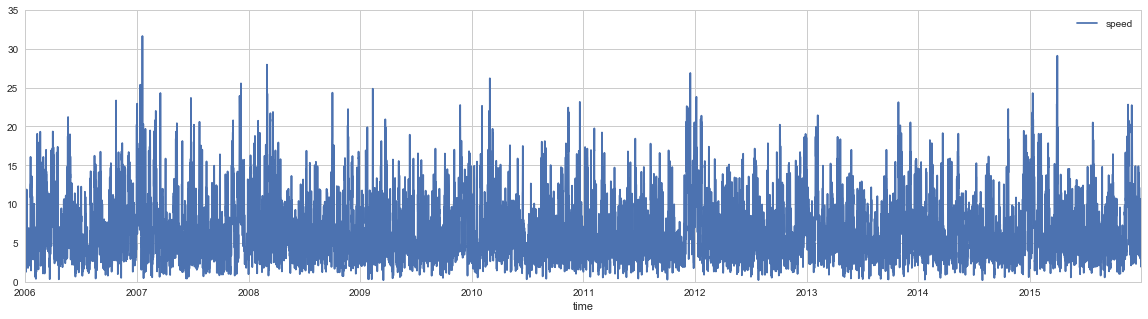

In [35]:
df.plot(y='speed',legend=True,figsize=(20,5))

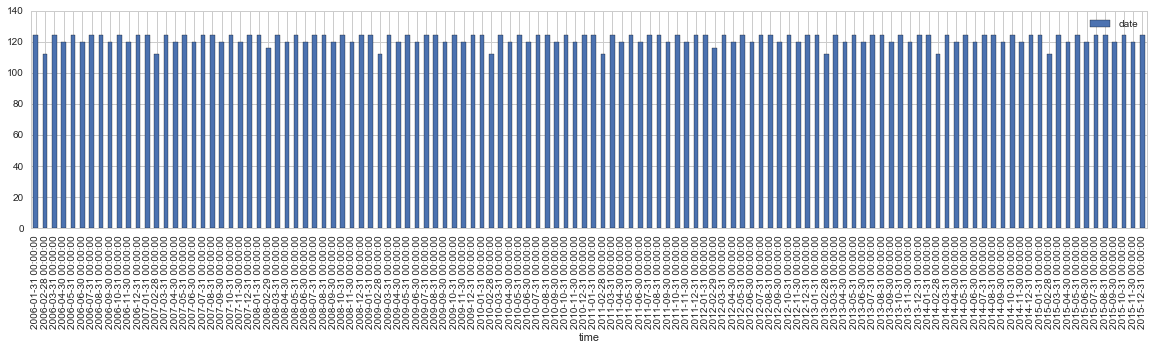

In [36]:
# Accumulation by month
df.resample('M').count().plot(y='date', kind='bar',figsize=(20,4))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


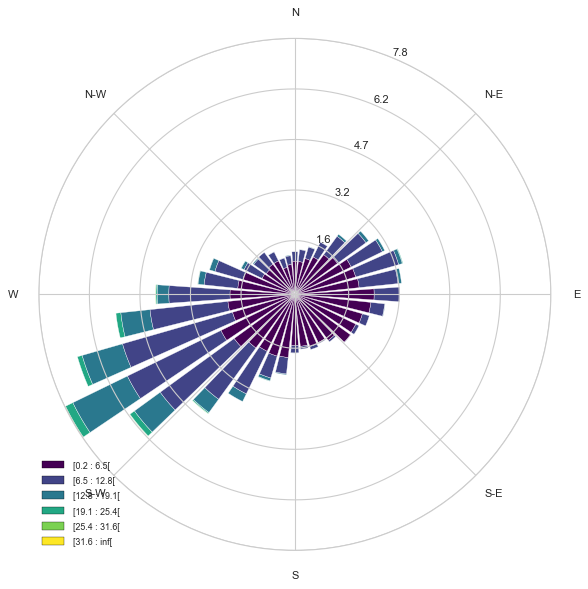

In [37]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [38]:
if len(df) > 1000000:
    bins=arange(0,362)
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
    
    df = df_all_years.sample(n=500000, replace=True)    
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min resmapled')
    plt_configure(legend=True, figsize=(20,4))

In [39]:
x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 1. Histogram comparison
fig = plt.figure()
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data', normed=True)             
plot(x, y_weibull, '-', color='black',label='Weibull')   
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF', legend=True)

# 2. CDF comparison
fig = plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label='ECDF')
plot(log(x), log(-log(1-y_cdf_weibull)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'}, figsize=(4,3))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASEAAADPCAYAAAC6JGddAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlcVXX6wPHPvcAVRBFcM01FxA01U9NIpNIYt9whFgdL
yPI3pmFqKC6gmFKaaaWONc7UaI4Zkw1OjktuTKKm9GNEQE1Ffu4LinBZRc7vD1/ckdiRe8+F+7xf
L17BOfec5zloj2f5nu+jURRFQQghVKJVOwEhhGWTIiSEUJUUISGEqqQICSFUJUVICKEqKUJCCFVZ
q52AMcTHx6udghAWrW/fvlX+rNGKUFFREREREZw5cwadTsfSpUtp3759ic/k5uYyefJk3n//fVxc
XPjuu+/Yvn07APn5+aSkpHD48GEuX77MW2+9RYcOHQDw9/dnxIgRFcavzi+htsXHx0t8iW/R8avD
aEXoxx9/pKCggG+++YaEhASioqJYv369YX1iYiLh4eHcuHHDsGz8+PGMHz8egMWLFzNhwgQcHBxI
Skpi8uTJBAUFGStdIYRKjHZPKD4+nkGDBgHQu3dvTp06VWJ9QUEBa9eupWPHjqW2TUxM5Ny5c/j6
+gJw6tQpDh48yMSJEwkLC0Ov1xsrbSGEiRntTEiv19OoUSPDz1ZWVhQWFmJt/TBkRaeLGzZsYNq0
aYafe/XqhY+PDz169GD9+vWsXbuW0NDQCuOrfV9I4kt8S45fHUYrQo0aNSI7O9vwc1FRkaEAVSQz
M5PU1FSee+45wzIvLy8cHBwM30dGRla6H7WviSW+xLfk+NVhtMuxPn36EBsbC0BCQgKdO3eu0nbH
jx/H3d29xLLg4GBOnjwJwJEjR3Bzc6vdZIUQqjHamZCXlxeHDx/Gz88PRVFYtmwZO3bsICcnx3Cv
pyypqam0bdu2xLKIiAgiIyOxsbGhefPmVToTEkLUDUYrQlqtliVLlpRY5uLiUupzmzZtKvHzG2+8
Ueozbm5ubN26tXYTFEKYBRkxLUQd8dprrxluSxQUFNC3b1/+9Kc/GdYHBgaSkpJSarvY2Fi++eYb
Ll++zKuvvlrleAMHDjTs9/z584+ZffmkCAlRRwwcOJATJ04AD2/+enh4cOjQIeDh4N4rV67QtWvX
Utt5enpWeAtEbfXytY3aVFRUxN27d8tc5+TkhFYrddwSzZkzh2+//bbMdQUFBeh0umrv08fHhxUr
VpS7/vnnn2fdunUEBQVx6NAhfHx8WLlyJVlZWSQlJdG/f3+OHz9OZGQkTZo04amnnmLJkiXs2LGD
Cxcu4Ofnx507d5g6dSrp6em8+OKLTJs2jblz5zJixAg8PT2JjY1l586dREVFVTv/mpIiVIm7d+/y
VcwJ7Bs5lFierc/ktdH9aNasmUqZCUvTvXt3Lly4gKIoHD9+nHfffRd3d3fi4uI4c+YMHh4eLFy4
kNDQUAYPHszq1avZvn17iaExOTk5rFixgoYNGzJx4kSGDBmi4hE9JEWoCuwbOdDYwUntNIQZWbFi
RblnLcYap6PVaunatSuxsbG0aNECnU6Hp6cnBw8e5PTp00ycOJGFCxfyySef8Je//IW8vDyef/75
Eu9sdu3alcaNGwPQs2dPUlNTS8RQY8p5uZYQog4ZOHAgGzZsMLwS1bdvX5KTkykqKsLJyYknnniC
WbNmsWnTJqZOnVpi0C/A+fPnyc7OprCwkJMnT+Lq6opOp+PWrVsAJCcnm/yYpAgJUYc8//zzxMfH
88ILLwCg0+lo3Lgx/fv3R6vVMn/+fD788EP8/PzYsmVLqUHCTZo0YebMmfj5+TF06FA6deqEj48P
X375Ja+//nqJF8pNRS7HhKhD2rRpw5kzZ0osW7duneF7Dw8P7OzsSlwOFs9MARATE1Nqnz179mTH
jh2llh8+fBgoPZavtsmZkBBCVVKEhBCqkiIkhFCVFCEhhKqkCAkhVCVPx4SogYpe58nIyCA9Pb3a
+7TU14CkCAlRA+W9zgNw/Xom5+6crdb+qvoa0LFjxwgJCaFTp04oikJhYSGTJk0qt/vM1atXOX36
NIMHD65WPqZkVi1/AMaNG2eYm7pt27YsX76ctLQ05s6di0ajwdXVlfDwcIv8F0OYl/Je58nS5xr1
NZ/nnnuOjz/+GIDs7GwCAwNxdnamW7dupT579OhRLly4YJlFqCYtf/Lz81EUpdTgqOXLlxMSEsKA
AQNYtGgR+/btw8vLy1ipC1Fn2Nvb4+vry86dO9m8eTPXr18nLS2NkSNHMmPGDD7//HPy8vJ45pln
aNy4MZ999hmKopCdnc1HH32Es7Oz2odgXi1/Tp8+TW5uLkFBQUyaNImEhAQAwzQF8HBulLi4OGOl
LUSd06xZM5KTk+nduzcbN24kMjKSrVu3YmVlxZtvvskrr7zCkCFD+PXXX1mxYgWbNm3id7/7Hbt2
7VI7dcDMWv7Y2toSHByMj48PFy9eZMqUKezatQtFUdBoNMDDyp+VlVVp/NpqeZKRkcH165lk6XNL
LM/KvMuhQ9do0qRJqW0cHBxUb7ki8Y0bv7y/F8WuXr1arf1l6++RkJCDo6NjhZ87e/Ysd+7cKXF8
x44d44knnmD//v3s3LkTOzs78vLyiI+P5+LFi1y/fp34+Hj0ej2zZ8/G1taWO3fu0LlzZ9X/nMDM
Wv44OzvTvn17NBoNzs7OODo6cuvWrRL3f7Kzsw3tfypSW1MppKenc+7O2VLX+NeUAk5fz6fZg4Yl
lmfrM3m6Xaaq87SYQ8uX+h6/vL8X8LAAPfnkk9XaX1amHb17d670xnRhYSG//PKL4fj0ej0RERF4
e3tz8+ZN5syZww8//MCBAwfo06cPly5dorCwkL59+/L222+zd+9eGjVqRGhoKK1btzbK78ls2kD3
6dOHAwcOMGLEiCq3/ImOjubs2bNERERw48YN9Ho9LVq0oHv37hw7dowBAwYQGxtbanoCtTRs1Lic
G5A5Js9FmF62PrOc5ffIyrSrlX2V5ejRowQGBqLVannw4AHTp0/H2dmZWbNmkZCQQF5eHu3bt+fm
zZt07tyZ9evX4+bmxujRo5k4cSJ2dnY0b96cmzdvVitHYzGrlj/e3t7MmzcPf39/NBoNy5Ytw9ra
mtDQUBYuXMiqVavo2LEjQ4cONVbaQlSJk5MTr43uV+a6hIQceveuWp+93+6zMgMGDODIkSNlrit+
Q/7RM8FWrVqxe/duAEaOHFntnEzBrFr+6HQ6Pvroo1KfcXZ2ZvPmzbWfpBA1pNVqy710cnR0lGl/
q0EG2wghVCVFSAihKilCQghVSRESQqhKipAQQlVShIQQqpIiJIRQlRQhIYSqpAgJIVQlRUgIoSop
QkIIVUkREkKoSoqQEEJVUoSEEKqSIiSEUJXRilBRURGLFi3C19eXwMBA0tLSSn0mNzcXPz8/zp8/
D8D9+/eZM2cOAQEBeHt7s2/fPgCSk5MZNGgQgYGBBAYGsnPnTmOlLYQwMbNq+RMTE4OjoyMrVqwg
IyODsWPHMmTIEJKSkpg8eTJBQUHGSlcIoRKzavkzbNgw3nnnHQAURcHKygqAU6dOcfDgQSZOnEhY
WBh6vd5YaQshTMysWv7Y29sbtp0xYwYhISEA9OrVCx8fH3r06MH69etZu3YtoaGhFcY3dsufWzdv
YmWlo/BByc9n6+/Rqam0/JH4lh2/Osyq5Q/AtWvXmDZtGgEBAYwaNQp4OGl+cZsfLy8vIiMjK92P
sVv+aJQCrKx1tGxVsrXLwy4LOfW+5Y3El/gVxa8Oo12O9enTh9jYWIAqt/y5ffs2QUFBzJkzB29v
b8Py4OBgTp48CcCRI0dwc3MzTtJCCJMzq5Y/f/zjH8nMzGTdunWsW7cOgC+++IKIiAgiIyOxsbGh
efPmVToTEkL

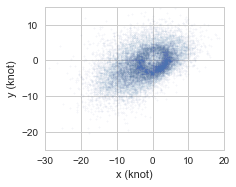

In [40]:
df.plot(kind='scatter', x='x', y='y', alpha=0.05, s=2)
plt.gca().set_aspect('equal')
plt_configure(figsize=(3.2,3.2),xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 2.2 Overview by Direction

In [41]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 10

In [42]:
%%time
original_incre, incre = SECTOR_LENGTH, rebinned_angle
start, end = -original_incre/2 + incre/2, 360

max_speed = df.speed.max()
max_count = max_count_for_angles(df, start, end, incre)
plot_range = [0, max_speed, 0, max_count*1.05]

for angle in arange(start, end, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)   
    
    fig = plt.figure()
    sub_df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Data')
    title ='%s (%s - %s), %s' % (angle, start_angle, end_angle, len(sub_df)) 
    plt.axis(plot_range)
    plt_configure(figsize=(3,1.5), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAM0AAAB6CAYAAAAcc9ekAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEddJREFUeJzt3XlQk9e7B/BvCKCUiNJa0duKBRERFQQXpPyUtmppixsu
1AW9FUuNU6cu0xas4gZatNUZx6pFkdHS1qUU6J2xbngVblVsUXQqrkFBrbLJYsIqyXP/YEiJCZA3
RBPi85nxj5yckOckfpM35z3JERERgTGmNytTF8BYR8OhYUwgDg1jAnFoGBOIQ8OYQBwaxgSyqNA8
efIE69atg5+fH/z8/LBp0yYolUqj9QcAhUKBCRMmoKKiosU+q1atQv/+/TX+rVu3rsX+t27dwuzZ
s+Ht7Y3g4GBkZma2Pdg2zJ8/X6uGPXv2tNg/OzsbISEh8PLywtSpU/H333+rrzt+/DiWL19ucC03
b97EoEGDcP78eY32P/74AxMnToSXlxcmTZqkdX1QUJDWGI4ePWpwHUZDFiQuLo7GjRtHOTk5dObM
GQoICKDt27cbrT8RUUxMDH3//fet9pkxYwbt2LGDiouL1f/kcrnOvjU1NTR69GiKjo4mmUxG27dv
p8GDB1N+fn7bA27FqFGjKDU1VaOG6upqnX0LCwvJx8eHtm7dSjKZjNasWUN+fn5UWVmp7jN16lQ6
f/684DoaGhpoypQp5O7uTllZWer2a9eu0cCBA2n79u2Un59P33zzDfn6+lJRUREREdXV1dGAAQPo
3LlzGmOoq6sTXIOxWUxoamtrydvbm9LT09VtKSkp5O/vT0qlst39iYiKi4tpyJAhVFFR0WotI0aM
oIyMDL3qTk1NJX9/f6qvr1e3hYWFUVxcnF6310Uul5O7uzvJZDK9+m/bto0mT56svqxSqWjMmDGU
lJSkUWdYWJjgWnbu3EmzZ8/WCs3SpUtJKpVq3GdISAidOHGCiBpD1b9//xaDbkoWc3h27do11NTU
YMSIEeq2YcOG4dGjR7h79267+wPAwYMH4ePjg65du7ZYR0lJCSoqKuDi4qJX3RcvXoSPjw9sbGzU
bcOHD0dOTo5et9dFJpPB2toazs7OevXPycnB8OHD1ZdFIhGGDh2qUcPbb7+NnJwc3LhxQ+86bt26
hX379mHt2rVa1507dw7vv/++xn2mpKRg7NixAIC8vDz06tULdnZ2et/f82IxoSkqKoKdnR26dOmi
bnv11VcBAIWFhe3uDwCnT5/GqFGjWq1DJpNBJBJh9+7dCAwMxAcffIDExESoVCqd/YuLi9GjRw+N
tu7du6OoqKjV+2mrBolEgqioKPznP//BpEmTkJqa2mJ/fWro2rUrBg8ejIyMDL1qUCqViIqKwuLF
i9GzZ0+N6+RyOcrKymBjY4NFixbhzTffxMyZMzVCKpPJYGtrC6lUioCAAISGhup938+axYSmpqYG
nTp10miztbUFANTX17e7v1KpxNWrV+Hm5tZqHbdv34aVlRWcnZ2xa9cuhIeHY/v27UhISBBUt64a
9JWXl4fa2lr4+/sjISEBkydPRnR0NA4fPtyuGtzc3HDlyhW9akhISIBEIsGHH36odV1VVRUAIDY2
Vl3j4MGD8dFHH+H+/fvqMVRWVmLKlClISEiAv78/pFIpLl68qNf9P0vWpi7AWDp37qz1JDdd1vUW
L7R/RUUFlEolHB0d1W0ff/wxLly4oL58+PBhzJo1C8HBwejWrRsAoH///qisrMTevXvxySef6F1H
586ddY4zODgYDx48UF/WdRj3+eefQyqVqg8jPTw8cO/ePSQlJSE4ONjgGrp164bbt2/rrKs5mUyG
xMREJCcnQyQSaV1vbd343278+PGYPXs2AMDT0xNZWVn45ZdfsHTpUmzevBl1dXWQSCQAgAEDBuD6
9ev46aef4Ovr22YNz5LFhKZnz56orq6GQqFQP9AlJSUAACcnp3b3b3rymx9mrV+/HrW1terLPXr0
gEgkUgemiZubG0pLS6FUKiEWizWuc3JyUt9vk5KSEp01AMCuXbvQ0NCg87omYrFY63NX3759cfr0
aZ399a1BqVTCyqrtg5OjR49CLpdj4sSJGu0RERGYPHkyVq1aBRsbG613bVdXV/ULgo2NjcbnvKYx
NJ8KNxWLOTzz8PCAnZ2dxit/dnY2unfvrvMDsdD+jo6OsLa2Rnl5ubrNyckJffr0Uf+ztrbG+vXr
MW/ePI3bXrlyBW+88YZWYADAx8cHOTk5GkHIzs6Gj4+PznG+9tprGvepy6JFi7BixQqNttzcXLi6
uurs7+Pjg+zsbPVlIlJPUDRXXl6u/tzXmrCwMBw5cgRpaWlIS0vD/v37ATQeji1evBjW1tbw9vZG
bm6uxu3y8vLQu3dvAMCUKVPw3Xff6T2G58rU03fGFBMTQ++88w5lZ2fT2bNnKSAgQOOcSnl5OZWX
l+vd/2nTpk2j+Pj4VmvIysoiDw8Pio+Pp4KCAkpNTaUhQ4bQb7/9RkSN5y2Ki4uppqaGiIgUCgUF
BARQVFQUyWQy2rFjB3l5edHdu3cNfhxSU1PJ09OTkpOTqaCggPbu3UsDBw6kv/76i4gaz4E0P+fx
8OFD8vb2ps2bN5NMJqO1a9fSyJEj6fHjxxp/NyQkhBITE4mo8fxScXExNTQ0tFmPQqHQmnI+deoU
DRw4kA4cOED5+fm0ceNG8vb2pnv37hFR4zS4r68vnThxgu7cuUNbtmwxyvkrYxARme5LaM1f5Y2h
vr4e+/btQ1ZWFmxsbDB69GjMmDFDfUgRExMDAIiOjtar/9NSUlJw69YtREZGtlrHn3/+iZSUFDx8
+BCOjo6YMGECxowZA6DxsGfx4sVYsGABAgMDAQD5+flITExEQUEBnJycEBYWBi8vr3Y9Funp6Thy
5AhKS0vh5OSE6dOnq6eVr169itjYWKxcuRKenp4AGt8Nf/jhBxQVFcHZ2Rnz5s3TeFWvrq7GggUL
sGnTJvTq1QsZGRmIj4/H1q1b23z3qa2tRXh4uMb9AcDZs2fx66+/orS0FL1790ZYWBg8PDwANB4G
p6WlISMjAxUVFVrXPw9Dhw7VfYUpE5udnW3KuxessLCQvL29qaSkpMU+HW1M+sjOzqYDBw7Q3Llz
NdojIiJafSzMWVvPU2vXW8xnmufByckJISEhOHjwoKlLea6ICPv378fChQvVbRcvXoSVlRW6d+9u
wspMg0Mj0LJly/D777+3umDT0pw/fx7u7u4YOXKkus3Lyws7d+40YVWmYzFTzs9Lly5dWjxJaKlG
jhyJTz/9VKOt6VzLi4jfaRgTiEPDmEAcGsYE4tAwJhCHhjGBLGoKRKVSaawNa87R0VGvxYaMtcWi
QlNeXo59/5MNe4mDRnuV4jH+e+IwvPLKKyaqjFkSvV56L1++jDlz5gAACgoKMHPmTMyaNQurV69W
L5U/dOgQpkyZgtDQUJw6derZVdwGe4kDujg4avx7OkSMtUebodm9ezdWrlyJuro6AMDXX3+NJUuW
4OeffwYR4eTJkygpKUFSUhIOHDiAPXv2YMuWLe365iFj5qzNwzNnZ2ds27YNX375JYDG7zQ0/RjF
6NGjcebMGVhZWcHHxwe2trawtbWFs7Mzrl+/rtdKXWOudK6oqEBh4WPIFTUa7VWKSly6VK315bBn
xdirt80Bj+lfbYYmKChI/b1toHHxXtO3GO3t7SGXy6FQKDR+oMLe3h4KhUKvAlpcfm2AR48eQVZ2
E10cHDXa5Y/tMGSI+3P5THPhwgWjjskcvIhjai1QgqeTms9AVVVVwcHBARKJRP1jCU3tzUPEmCUR
HBpPT0/1z4dmZmZi2LBh8PLywoULF1BXVwe5XI68vDy4u7sbvVjGzIHgKefIyEhER0djy5YtcHV1
RVBQEMRiMeb

Wall time: 8.66 s


## 2.3 Overview by Month

In [43]:
%%time
current_df = df.query('speed>=1')
for month in arange(1, 13): 
    sub_df = current_df[current_df.index.month == month]
    ax = WindroseAxes.from_ax()
    ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=plt.get_cmap('viridis'))
    plt_configure(figsize=(3,3), title='Month: %s'%(month))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOwAAADxCAYAAADIm1tRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAIABJREFUeJzsnXl4VOX1xz+zL5lJMpns+wYJCasoyGJFXEBBsVqrrdWq
1dpWxdZq1VpKq3Wr1g201lrXWqUWN9S6/xRwgYKyhuwL2ZPJzCSzb/f+/ogzEpOQhNxJgub7PHlg
5t55750793vPec97zvfIRFEUmcQkJnFUQD7eJzCJSUxi+Jgk7CQmcRRhkrCTmMRRhEnCTmISRxEm
CTuJSRxFmCTsJCZxFGGSsN8CTK7cfXMwSdgxwNKlSykqKuKuu+4acHtzczNFRUUUFRVhtVolPfZ7
773H2rVrI6/XrVvHnDlzJD2G0+nkpJNO4q233pJ03En0xyRhxwgymYx33313wG1vv/121I779NNP
097eHrXxnU4nv/jFL2hpaYnaMSbxFSYJO0aYM2cOTU1NlJWV9dv21ltvUVRUNA5nNTps376d8847
j/Ly8vE+lW8NJgk7Rpg2bRpZWVn9rGlLSwt79+5l+fLl/T7z7rvvcu655zJ79mxOPPFEHnjgAYLB
YGT70qVL+fvf/87atWuZN28exxxzDDfeeCNOpxOAiy66iO3bt/Phhx9SVFREU1NT5LNvvvkmy5Yt
Y8aMGZxzzjl8/vnnkW1NTU0UFRWxbt26w36nq666iqlTp/L4448f0TWZxMgxSdgxxGmnndbPLX77
7beZNWsWqampfd7fsGEDV199NTNnzmT9+vX86Ec/4oknnuCmm27qs9/f/vY3enp6uO+++/jlL3/J
G2+8wV//+lcA1q5dS0lJCccccwwbNmwgOTkZAI/Hw/3338/q1at58MEH8Xg8XHPNNZGHQXJyMhs2
bOC888477Pd57rnnePDBB0lISBjVdZnE8KEc7xP4NmH58uX84x//oKamhoKCAqDXHT799NP77BcK
hXjggQdYsWJFJGC0ePFijEYja9eu5fLLL6e4uBiA1NRU7rvvPmQyGYsXL+ajjz7i8ccfZ968eZx4
4okYDAb0ej3XXXcdzzzzDNAbNb7nnnuYPXs2AMFgkGuuuYbq6mqKi4tRq9WRbYfD1KlTJbs2kxge
Ji3sGGLGjBmkpaXxzjvvANDa2sqePXtYtmxZn/1qa2uxWq393OQVK1YAsGPHjj5jymSyyOukpCSg
17o6HI4Bz0OhUDBz5szI64yMDIBB95/ExMEkYccQMpmsj1v89ttvM3PmTNLS0vrs193dDYDZbO7z
vtFoRK1WR+aoADqdrt8xFAoFixcv5s477xzwPDQaDXL5Vz99+P+CIBzhN5vEWGGSsGOM0047jf37
99PU1MTbb7/dzx0GiI+PB6Crq6vP+z09Pfj9/sj2w+Gmm27i008/xW63S3Pik5gQmCTsGOOYY44h
KSmJF154gd27d/dzhwHy8vIwmUz9EhHefPPNyBhDwWAwcNttt1FfX98nsjyJoxuTQacxhlwu59RT
T+Wpp56KzGm/DoVCwdVXX81tt91GXFwcJ598MhUVFaxbt47ly5cPO9izePFikpKS+OKLL9DpdPh8
vmF9zu/3U1ZWRmpqar/o9STGF5MWdhxw2mmnEQgEBlx7DeNHP/oRt99+O9u2beNnP/sZzz33HJde
ein33nvviI5166234vF4sFgsVFdXD+szHR0dnH/++bz44osjOtYkog/ZpKbTNwtNTU1cfPHFfPDB
B5H3tm7dyk9+8hPef/99MjMzx/HsJjFaTBJ2EpM4ijDpEk9iEkcRJgk7iUkcRZgk7CQmcRRhclnn
GwBBEAiFQhFlCVEUI/+XyWR9/hQKRZ9UxvHAY489xsaNG1Gr1Zxxxhn8/Oc/j2xrb2/npz/9aeS1
y+Wivb2dbdu2odfrx+N0JxQmCTuBIYoigUAAv99PIBCI/Pl8vsh7wWBwxCmFCoUClUqFSqVCrVaj
Vqsjr1UqFRqNBqUyOrfGJ598wmuvvcZ//vMf9Ho9V111Fe+88w6nnXYaACkpKbz66qtA7/e//PLL
ueKKKybJ+iUmCTtBIIoifr8ft9uNy+XC5XLhdrsRBAG5XB75UyqVKJVKdDodcXFxaDSaCOnCJJPL
5YRCIXbt2sXs2bORyWSIokgwGMTv9+Pz+SKkDx8zTHxBEBBFEZVKhV6vj1T76PV6SUhcVlbGCSec
gNFoBOCEE07gvffeixD2UGzatIlgMMj5558/6uN+UzBJ2HFCMBjE4XD0I6dSqUSlUqHT6TCbzcTF
xaFSqUZ1rHByv0KhQKPRRMgyEERRxOPx0N3djcvlwmKxEAgEEAShD4ljYmIwGAwjdq9LS0u54447
uPLKK9HpdHzwwQcDisQJgsDDDz884kSRbzomCTuG8Pl82O12bDYbLpcr4prq9XqSkpKIi4tDoVCM
6znKZLKIRT0Ufr8fm81GT08PnZ2dtLS0IJPJiIuLIz4+ftjnvmDBAs455xwuuugi4uPjWbBgAbt3
7+633yeffEJycjIzZsyQ7Lt9EzBJ2ChCFEXcbjc2mw273Y7P50OlUmEwGMjIyDispZtoUKvVpKSk
kJKSAvRaQKvVSldXFwcPHiQUChETE0NCQkLEVR8ITqeTU089lUsvvRSAJ598kqysrH77vffee6xc
uTJ6X+goxSRhJYYoihFX0m63IwgCGo2G+Ph4UlJSRu3eThTI5XISExNJTEwEeqO5HR0dtLW10djY
iEajwWQykZSUhFqtjnyuubmZ66+/npdeegmv18uLL77Ibbfd1m/8nTt38uMf/3jMvs/RgknCSoRQ
KITNZqO9vR2fz4dGoyE1NZXk5OQ+xeLfVMTExJCXlwf0uv7t7e10dXXR1tZGXFwcycnJGI1GioqK
WLlyJatWrSIUCnHJJZcwd+5cbrnlFpYuXcrJJ58MQGNjI+np6eP5lSYkJnOJRwmv10tHRwcWiwW5
XE58fDwZGRnjbkkPjRKP57zY6XTS3NyMy+VCqVSSkpKC2WyO2rLRNx2TV+0IIIoidrud9vZ2XC4X
Wq2WnJwcEhISxj0pYaLBYDBQVFREKBSitbWVtrY2mpubSUhIIDk5eXJ9dYSYtLAjgCiKWK1Wmpub
CYVCGAwGsrKy0Gq1431q/TBRLOxAsNlstLS04PV6MRgMZGZmEhMTM96ndVRg0sIOA6Io0tPTQ2Nj
I4FAAJPJRFZW1oQjwtECk8mEyWTC4/HQ0NBAeXl5ZCoxER9+EwmThB0CTqeTxsZGPB4P8fHx5OTk
TBJVIuh0OoqLi/F4PNTV1bF//37MZjPp6el9IsuT+AqThB0EHo+HpqYmHA4HRqORGTNmjHsg6ZsK
nU5HSUkJTqeT+vp69u3bR3JyMqmpqZPBqa9h8mp8DcFgkMbGRqxWK3q9nmnTpvXT/p1EdGAwGJg+
fTpWq5WmpiY6OztJS0sjJSVlMpj3JSYJewhsNhsNDQ3I5XKmTJlCbGzseJ/StxIJCQkkJCTQ0tJC
a2srVquV/Pz8yfktk4QFeq1qQ0MD3d3dJCUlkZGR8a1IdpjoSE9PJzk5merqasrKykhPT//WW9tv
PWFtNhv19fWoVKpJ91ciPP/887zwwguR1y0tLSxZsoR77rkn8l5TU1OkNabRaOTuu++O9Pg5FEql
kuLiYiwWS2Sq8m22tt/addhDrWpKSgrp6enfqCf3RFmHraur4yc/+QnPP/98pHAA4IYbbmD27Nlc
eOGFPPvss+zevXvIUrpQKER1dTUul+tba20njN8XbiL80Ucf9Xl/6dKlfRoRBwIB5syZg9Vqjbx3
0UUXce6550Zed3d3M2fOHPx+/4DHstls7Nu3D7fbzbRp08jIyDjqf/hDC9TDf0Dk/4dKyIwlbr31
VlavXt2HrNB

Wall time: 19 s


In [44]:
df.describe()

lat      lon             x             y         speed  \
count  1.460800e+04  14608.0  14608.000000  14608.000000  14608.000000   
mean   4.900000e+01      9.0     -2.004862     -1.073745      6.532745   
std    6.167722e-12      0.0      5.990882      4.126877      3.926175   
min    4.900000e+01      9.0    -29.032052    -20.209750      0.204959   
25%    4.900000e+01      9.0     -5.906542     -3.584160      3.690522   
50%    4.900000e+01      9.0     -1.735854     -1.208650      5.380064   
75%    4.900000e+01      9.0      2.574473      1.757827      8.608569   
max    4.900000e+01      9.0     18.672756     14.688132     31.648038   

                dir          date          HrMn  dir_windrose  
count  14608.000000  1.460800e+04  14608.000000  14608.000000  
mean     184.895637  2.010567e+07    900.000000    186.958142  
std       97.224149  2.872210e+04    670.843355     91.423660  
min        0.006390  2.006010e+07      0.000000      0.069898  
25%      118.169417  2.008070e+07    450.000000    101.132739  
50%      200.517086  2.010567e+07    900.000000    214.911427  
75%      244.075364  2.013070e+07   1350.000000    254.389783  
max      359.992452  2.015123e+07   1800.000000    359.976776

# 3. Create input data and configuration

In [45]:
SPEED_SET = array(list(zip(df.x, df.y)))
if 'NUMBER_OF_GAUSSIAN' not in globals():
    NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [46]:
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print(fitting_axis_range)

FITTING_RANGE = []
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])
        
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

[-15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2
   3   4   5   6   7   8   9  10  11  12  13  14  15]


# 4. Kernel Density Estimation

In [47]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

0.9
Wall time: 21.4 s


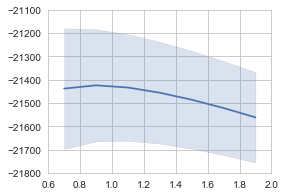

In [48]:
%%time
if 'bandwidth' not in globals():
    from sklearn.model_selection import GridSearchCV  

    # The bandwidth value sometimes would be too radical
    if knot_unit:
        bandwidth_range = arange(0.7,2,0.2)
    else:
        bandwidth_range = arange(0.4,1.1,0.1)

    # Grid search is unable to deal with too many data (a long time is needed)
    if len(sample) > 50000:    
        df_resample=df.sample(n=50000, replace=True)
        bandwidth_search_sample = array(list(zip(df_resample.x, df_resample.y)))
    else:
        bandwidth_search_sample = sample

    grid = GridSearchCV(neighbors.KernelDensity(kernel=KDE_KERNEL),
                    {'bandwidth': bandwidth_range}, n_jobs=-1, cv=4, return_train_score=False) 

    grid.fit(bandwidth_search_sample)
    bandwidth = grid.best_params_['bandwidth']
    plt.plot(bandwidth_range, grid.cv_results_['mean_test_score'], label='test')
    plt.fill_between(bandwidth_range,
                     grid.cv_results_['mean_test_score']+grid.cv_results_['std_test_score'], 
                     grid.cv_results_['mean_test_score']-grid.cv_results_['std_test_score'], alpha=0.2)
    plt_configure(figsize=(4,3))
    
print(bandwidth)

In [49]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH
    
points = FITTING_RANGE    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

In [50]:
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result, kde = fit_kde(df, config)
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

bandwidth: 0.9 961
[  7.31485253e-05   1.23539825e-04   1.64489663e-04   2.01003913e-04
   2.80743303e-04]


In [51]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=(3.5,2.5))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x'+speed_unit_text,ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmUHHd9L/qp6n26Zx/NIo1ma1kYs1kSNhAwyRuimMeB
FycKlpwc3xdwEvLgwjOPQyxCbHyNbYkEFM4BWzk4tpNrQ2wiXgAlXG6wDdGLuWBZsrixLfvas/dM
z0zP9F69V9X7o/Wrqa6u6q61p2tcn3P6aNRVv6W7qz713b8Uz/M8HDhw4GCHgt7uDThw4MCBlXBI
zoEDBzsaDsk5cOBgR8MhOQcOHOxoOCTnwIGDHQ2H5Bw4cLCj4ZCcAwcOdjQcknPgwMGOhkNyDhw4
2NFwSM6BAwc7Gg7JOXDgYEfDITkHDhzsaDgk58CBgx0Nh+QcOHCwo+GQnAMHDnY0HJJz4MDBjoZD
cg4cONjRcEjOgQMHOxoOyTlw4GBHwyE5Bw4c7Gg4JOfAgYMdDYfkHDhwsKPhkJwDBw52NBySc+DA
wY6GQ3IOHDjY0XBv9wYcbD94nkepVEKlUoHL5YLH4wFN06Aoaru35sCBYVA8z/PbvQkH24disYhU
KoXOzk6Uy2UAwMrKCnp7e9HZ2Qmaph3Sc2BrOJLcGxgsyyKfzyMWiyEYDKJSqcDj8YDnefA8D5Zl
UalUUCqVQFEUXC6XQ3oObAeH5N6A4HkelUoFLMuCoiiwLIuZmRmwLAu32w2O45DL5eDz+eB2b10i
hPSKxSJomobL5YLL5YLb7XZIz0HbwlFX32DgOA7lchnkZ49Go4jH4xgbG4PX60WpVMLq6iooikK5
XIbb7UZHRwcCgQA6Ojrgcrlq5iPzUBQlkJ3b7a47z4GD7YIjyb1BQNRPlmUBAJVKBZFIBBzHwePx
oLOzE6VSCX6/Hx6PB93d3QgGgygWi8jlckilUlhbWxNIjxCfmMwqlQp4nkexWHRIz0HbwCG5NwA4
jkOlUgHHcaAoCplMBsvLy+jr60NXVxcWFxdrzqcoCjzPg6Io+P1++P1+9PX1ged5FAoF5PN5JJNJ
rK6uwuPxCITXiPRouhqtVC6X0dXV5ZCeg5bBIbkdDmJHI86E1dVVpNNp7N27V5DU1FosKIoSyExM
erlcDslkEtFoFF6vt0a9JeTG8zzy+TzW19cFBwb515H0HFgJh+R2KKTqaalUwtLSErxeL8LhsOBQ
MOIsEJMeUJUYiaSXSCQQjUbh8/kEwiNjiKQolfQc0nNgBRyS24GQqqeJRAKrq6sYHBxEX19fHbFJ
JTlCQlpB07Rgr+vv7xdIL5fLIR6Po1AoAAA2NjYEchRLeg7pObACDsntMIjVU47jEI1Gkc/nMTk5
Cb/fX3e+lWEfYtIDAIZhsL6+DgDY3NxEsViE3+8XJD2/3++QngPT4ZDcDgHP81hbW0NHRwd8Ph8K
hQKWlpYQDAYRDocF8lAaC1hLeECV9GiaxsDAAICqxJnP55HL5bCxsSGQHrHpqSU9r9frxOg5UIRD
cjsAJPYtkUjA7XYjk8kgFoth9+7d6O7ubjhWjhz0qqvNIF2LpmkEg0EEg0EAWxkYJAujVCoJai2R
9MgcUtIrlUpgWRa9vb3weDwO6TkQ4JCczUEyFwiIOhgOh+H1elXN0S7x4C6XC6FQCKFQCMAW6eVy
Oayvr6NcLtdJeoTMiMMjEAigUCjUZGQ4pPfGhkNyNoU0NSubzSKfz6OzsxN79+5VfVMrndcOxNeI
9NbW1lCpVATSI0QvlfTK5bJDem9wOCRnQ4idCwCwtraGRCIBv9+Pnp4ewzdwuxKAlPQqlYpAetls
VgiZIZKez+dzSM+BQ3J2gjT2rVwuIxKJgKIohMNhrKysaJ7TKvtbK+B2u9HZ2YnOzk74fD7k83mE
QiEhOJllWcGe19HRUeOgEJMecWQQ4nNIb2fBITmbQBr7lk6nsby8jIGBAQwMDNQE2ZoBOxIfTdMC
6QFVSS+XywlpaGIpT0p6HMcJDhwx6bndbrjdbof0bAyH5GwAlmWFgpY8zyMajSKTyWB8fFyIQQP0
SWXiPFXxe3aD3Od2u93o6upCV1cXgKrkS9TbZDIJjuNqJD2xBCcmvXK5jEwmg6GhIYf0bAiH5NoY
UucCiX3z+/3Yt2+fExArQTPi8Xg88Hg8NaRHJL14PA6e52skPUJ6RCIk6i1FUY6kZyM4JNemEKun
ABCPx7G2toahoSH09vaaFt8mtlEZmceOICWluru7wfN8jaQXj8cBAIFAQCgkKpZ4xZKeQ3rtDYfk
2hCJRAIulws+nw8cx2FlZQWFQkExNYvgjUJOVoCiKHi9Xni93hrSy+VyyGQyKBaLmJubk5X0AIf0
2hkOybURiHq6sbGBrq4usCyLpaUldHZ2Nk3NMoKdQI5m719Meh6PB/F4HENDQ8jlcmAYBhsbG6Bp
WiC8QCCgSHoAavpjuFwuh/RaCIfk2gTi2DfiPWUYRlVqFoFZZGVX0rOKOHieF3JkvV4venp6hDaO
JEaP1MkTOzLEEpxDetsHh+S2GdLYN5ZlwTAMaJrWlJoF6Ccnu5LadoKiKPh8Pvh8PvT29taQXiaT
EUhPXCpeifRisRh6enoQDAaFCisO6ZkHh+S2EUplyd1uN3p6ejQRnAPrIA2xkYMc6RWLReTzeaTT
aaE/hli9JaRXKBQEz22pVAKAuv4YDunph0Ny2wRpatbq6iqSySRGR0eRTqd1XdRGJTnpvw6q0Pud
kv4YYtKTawok9qKT351I99Ketw7paYdDci2GNPatXC5jaWkJbrcb+/btE0ol7VS106r9qZG2jMCM
fGClpkAsywr9McSSnpjMHNLTD4fkWgipeppKpbCysoJdu3ahv79fuFCNkFWrx2mBXW9EKwhU3B8j
nU5jeHgYPM8rNgVySE8/HJJrEcR133iex8rKChiGwcTEhNAIhqDVDgTpDUFRlKA+ObAeYu+t2qZA
pD+GQ3rN4ZCcxVBKzQoEAgiHw7KpWUbISi85cRyHUqkEj8eja/x2w0pJ1GpVWG5+NU2BfD5fjaQn
Jb1KpYJSqYSVlRXs2bMHHo/nDUl6DslZCHFiPVBt3rK+vo7h4WH09vYqjtNLVkbU3KWlJUEacLlc
cLvdwo1klxvCLvuUQg2JSpsCiUmvWVMgYvcjYS5iSc/j8dSQ406EQ3IWgMS+vfTSS9i3bx8AYGVl
BaVSCVNTU/D5fA3Ht9KBkE6nUalU0NPTg76+PrAsi1gshkKhgNXVVVQqFeHmkqYyvVGwHZJcM8iR
nlxToEAgUOe5BWolvZ1Oeg7JmQxpYj3DMFhdXUVXVxdGR0dVpWa1wiZHunulUim43W4h6Z/kzNI0
jcHBQdmkdXGAq13V250GaVMgMekBwOzsrFAqXtoUCJAnPSLR2530HJIzEdLYN5Jcv2fPHqG8j1pY
SXIkbIVkVczOztaNI/8XlycSJ62LU5nEkt5OLP/UjpJcMxDSCwQCSCaTmJqaEjqhra+vN+yEBmxd
y9JS8XYkPYfkTABRTyuVilB/LBKJgOd5jI2NCT0J1MJKdZVkVfT399dUFJaur7Qvaf6mNMDV4/HU
SHpWFRWQgngo7QgrSZTMraUpkLgTmtSRUSwWQVFUXUZGO8MhOYNQSs3q6+tDpVLRdQHoveAbkSPP
81hfX0cikcDo6Khm4lVaTxrgSm4csTGckJ6dnv5iWE1CgLXFBeTmliM9UkCUkJ5Y0pM6oMQ9b+Px
OHp6ehAIBASybCfic0jOAKSxb6urq0in09i7dy+CweC2ZC7IjSMNbwAIWRXN1tO7byVjOFGRgGq9
PGmPhXaGncNTyMO3GVwuV11/DPLbEQeUOEZPTHoMw6CjowM0TWNlZQXDw8Po6emx7DNphUNyOiCN
fSsWi1haWoL

## 4.1 Bootstrap GOF limit

In [52]:
%%time
gof_kde=Parallel(n_jobs=-1)(delayed(resampled_kde)(df, kde_result, config) 
                                       for i in arange(20)) 

Wall time: 9.64 s


In [53]:
for gof_name in [ 'R_square', 'K_S','Chi_square']:
    plt.figure(figsize=(4,3))
    pd.DataFrame(gof_kde)[gof_name].hist()
    plt_configure(title=gof_name)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQkAAADXCAYAAAAJK6SPAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEt1JREFUeJzt3XtQFXX/B/D3AeSOog706IMiEipDSmCZlpKQ9xSRQLmI
U5gZoSbhgBiD2CNwHC1FStHUcgwv5JhSzuh4wUvGmOElNZTh4kmkSEHkGtf9/eF4ftHE9xzlXNZ4
v/7icHaXz3dX3nx3z/pZhSRJEoiIOmFi7AKISN4YEkQkxJAgIiGGBBEJMSSISIghQURCZsYugB7y
8/PDnTt3OnzP2toaw4YNQ1xcHLy8vIxUGXV3Ct4nIQ9+fn6YM2cOAgMDAQCSJOH333/HJ598goKC
Apw4cQK2trZGrpK6I55uyIiNjQ0cHBzg4OAAR0dHjBgxAkqlEtXV1Th//ryxy6NuiiEhc+bm5gAA
U1NTjcsWFRUhIiICXl5eGD16ND788EM0NDSo39+xYwd8fHzg7e2N1NRULFq0CBkZGQCA5cuXY8mS
JR225+fnh6+++goA0NraivXr18PPzw8eHh54+eWXkZKSgra2NvX6y5YtQ3BwMEaNGoUffvgBLS0t
WLduHV555RWMHDkS8+fPR0lJiU72CxkOQ0LGqqqqkJKSAgcHB7zwwgsal4+NjUX//v1x6NAhbNmy
BXl5edi6dSsA4Ouvv0ZGRgbi4+Oxb98+lJeX4/Tp01rXsm3bNhw6dAhKpRJHjx5FXFwcsrKycPLk
SfUy3333HcLDw7Fz5054eXlh48aNOHPmDDZs2IDs7Gy4uLggIiICtbW1j78zyGgYEjKiVCrh5eUF
Ly8veHp6wsfHB5WVlfjiiy+0uh5RVlYGe3t79O/fH56enti8eTP8/f0BAHv27EFISAhef/11uLm5
QalUwsrKSuvann32WaSlpWHUqFFwcnJCQEAAXF1dUVhYqF7GxcUFAQEBcHd3h0KhwJdffonk5GS8
+OKLcHV1RWJiImxtbZGTk/P4O4eMhp9uyMjChQvh7++P5uZm7N69G8eOHcOiRYvg5uam1fqLFy/G
mjVrcODAAYwdOxYTJ07E1KlTAQDFxcWIjIxUL2tra4uhQ4dqXduECRPw448/Yu3atSgtLUVhYSFu
376NSZMmqZcZMGCA+utff/0Vzc3NiIyMhEKhUH+/qamJpxxPGYaEjPTu3RvOzs4AgJUrV6KqqgpR
UVHIyclBv379NK7/5ptvYsqUKThx4gTOnj2LuLg4nD17FmlpabC0tER7e3uH5R9d7wDQ4Rf5kdbW
VvXXn376KXbu3Ik33ngDkyZNQmxsLGJjYzssb2lpqf760bWKHTt2oG/fvh2W46c0TxeebsjYypUr
YWpqiuTkZI3LNjU1ISUlBS0tLQgPD0dmZiaSkpJw+PBhAMCQIUNw5coV9fLNzc24efOm+nWPHj1Q
X1+vfl1fX4+qqir16+3btyM+Ph7Lly9HQEAAnJycUF5ejs4+QR84cCDMzMxQVVUFZ2dnODs7Y8CA
AUhPT+9QB8kfQ0LG+vTpg9jYWJw6dQrHjx8XLmthYYGLFy/io48+QmFhIYqLi3Hs2DGMGDECAPDO
O+8gOzsb+/fvR0lJCVatWoW7d++q1x8+fDh++uknnD59GiUlJUhMTISJyf//83jmmWdw+vRpqFQq
XL9+He+//z4ePHiA5ubmf6zHxsYGoaGhSElJUa+XnJyM3NxcrU+fSB4YEjIXFBQELy8vpKamorGx
Ubjshg0bYGJigrCwMAQFBcHc3Bzr1q0DAIwbNw5JSUn47LPPEBgYCCsrK7i7u6vXnTlzJqZPn46Y
mBiEh4fD3d0d3t7e6veVSiXKysowY8YMREdHw8nJCUFBQbh+/Xqn9cTFxWHy5MlYsWIF/P39UVhY
iG3btnW4dkHyxzsuu7HAwED4+vpi8eLFxi6FZIwXLp8SVVVV6ouB/8Ta2ho2NjYGrIi6C4bEUyIs
LAylpaWdvr9gwQIsW7bMgBVRd8HTDSIS4oVLIhJiSBCREEOCiIQ0Xrg8cOAAvvnmGwAP7+orKCjA
uXPn0LNnT70XR0TG91gXLletWoVhw4Zhzpw5+qyJiGRE69ONq1evoqioiAFB1M1oHRJbtmxBdHS0
PmshIhnS6maqmpoalJaWYvTo0RqXzc/P73JRRPRkRo4cqfNtahUSFy5cwJgxY7TeqD4K1VZ+fr5R
f74x/XXshYWFWKg8Dtve/+3SNuvu38GW5RMwZMgQXZSoV9352AP6+wOt1elGaWkpnJyc9FIAEcmb
VjOJt99+W991EJFM8WYqIhJiSBCREEOCiIQYEkQkxJAgIiGGBBEJMSSISIghQURCDAkiEmJIEJEQ
Q4KIhBgSRCTEkCAiIYYEEQkxJIhIiCFBREJaNZ3ZsmULTp48iZaWFoSGhiI4OFjfdRGRTGgMifPn
z+PSpUvYs2cPGhsbsWPHDkPURUQyoTEkvv/+ewwZMgTR0dGoq6tDXFycIeoiIpnQGBL3799HeXk5
MjMzUVZWhqioKBw5cgQKhaLTdYzdVt/YP9+YHo1dpVLpbJvXrl1DbW2tzranT9352OuLxpCwt7fH
4MGDYW5ujsGDB8PCwgJVVVXo27dvp+uwpb5x/HXsdnZ2wHe/62S7zz33HFvqPwWM1lJ/5MiROHv2
LCRJQkVFBRobG2Fvb6+XYohIfjTOJHx9fXHhwgUEBQVBkiQkJSXB1NTUELURkQxo9REoL1YSdV+8
mYqIhBgSRCTEkCAiIYYEEQkxJIhIiCFBREIMCSISYkgQkRBDgoiEGBJEJMSQICIhhgQRCTEkiEiI
IUFEQgwJIhLSqp/ErFmzYGtrCwBwcnJCWlqaXosiIvnQGBJNTU2QJAm7du0yRD1EJDMaTzdu3LiB
xsZGREZGYt68ebh8+bIh6iIimdA4k7C0tMT8+fMRHByMW7duYcGCBThy5AjMzDpf1dhtzY39842J
LfW777HXF40h4eLiAmdnZygUCri4uMDe3h53795Fv379Ol2HLfWNgy31u++xB4zYUn///v1QKpUA
gIqKCtTV1cHBwUEvxRCR/GicSQQFBSEhIQGhoaFQKBRITU0VnmoQ0b+Lxt92c3NzfPzxx4aohYhk
iDdTEZEQQ4KIhBgSRCTEkCAiIYYEEQkxJIhIiCFBREIMCSISYkgQkRBDgoiEGBJEJMSQICIhhgQR
CTEkiEiIIUFEQlqFRGVlJV599VUUFxfrux4ikhmNIdHS0oKkpCRYWloaoh4ikhmNIbFmzRqEhITA
0dHREPUQkcwI29cdOHAAffr0wbhx47B161ZD1UT0j9ra2oSnvCqV6mGXcC24urrC1NRUV6X9qykk
SZI6ezM8PBwKhQIKhQIFBQUYNGgQNm/eLOyWzeceyINKpULGd7/Dtvd/u7Sduvt3sHj6f+Ds7Kyj
yp6cSqXCmqyfYd2ra7Pahgd/ID58hCzGpGv6eKSAcCaRlZWl/joiIgLJyclatdPnczeM49/+3A07
OztY9+p68AHyGZMuGe25G0TUvWn9AA0+MJioe+JMgoiEGBJEJMSQICIhhgQRCTEkiEiIIUFEQgwJ
IhJiSBCREEOCiIQYEkQkxJAgIiGGBBEJMSSISIghQURCDAkiEtLYT6KtrQ2JiYkoLS2FQqHAqlWr
/nUdfYiocxpnErm5uQCAvXv3YunSpVi/fr3eiyIi+dA4k5gwYQLGjx8PACgvL0fPnj31XRMRyYhW
7evMzMwQHx+PY8eOYePGjfquieipoKnFv7bk3t5f6x6Xa9aswbJlyzB79mwcPnwY1tbWnS5r7Lb6
xv75xvRo7CqVSmfbvHbtGmpra3W2vScltzHposX/09DeX2NIHDx4EBUVFVi4cCGsrKygUChgYiK+
lMGW+sbRHVr

## 4.2 Bivariate Empirical Limit

In [54]:
%%time
fig1, ax1 = plt.subplots(figsize=(3,2.5))
fig2, ax2 = plt.subplots(figsize=(3,2.5))
gofs_mean_set_bivar, gofs_bivar_set=[], {}

# for year_length, line_style in zip([5, 7, 10], ['-.','--', '-']):
for year_length, line_style in zip([5, 10], ['-.','-']):
    start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
    df_standard = df_all_years[str(2015-year_length+1):'2015']
    kde_result_standard, _ = fit_kde(df_standard, config)
    gofs_bivar=Parallel(n_jobs=-1)(delayed(kde_gofs)(df_all_years[str(start_year):str(start_year+year_length-1)], kde_result_standard, config) 
                                   for start_year in arange(start_year, end_year+1)) 
    gofs_bivar_set[year_length] = gofs_bivar = pd.DataFrame(gofs_bivar, index=arange(start_year, end_year+1))
    if len(gofs_bivar)>0:
        gofs_bivar.plot(y='R_square', ax=ax1, label=str(year_length)+' years', style=line_style)
        gofs_bivar.plot(y='K_S', ax=ax2, label=str(year_length)+' years', style=line_style)
        year_lim = end_year-year_length-5, end_year-year_length
        gofs_mean = gofs_bivar.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
        gofs_mean['year_lim']=year_lim
        gofs_mean_set_bivar.append(gofs_mean)
    
plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='Start year')
plt_configure(ax=ax2, ylabel='K-S', xlabel='Start year')
align_figures()
display(pd.DataFrame(gofs_mean_set_bivar).set_index('year_lim'))

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOsAAAC3CAYAAADzRqlZAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlAlNXewPHvzLDvIO7ILiruiFu4b6hphuACaVpaWdlm
i9nt2rWsrFv2avemaVpXu2VmpWbXfc0dcEVFRQQBWWWTfZbz/kFMkqAsAwx4Pn/BM888zzkwvznP
c55zzk8hhBBIkmT0lA1dAEmSqkYGqyQ1EjJYJamRkMEqSY2EDFZJaiRksEpSI9FgwXr27FmmT59+
1/Z9+/YRHBzMlClT2LhxIwA6nY6FCxcyZcoUpk+fTnx8fH0XV5IanElDnHT16tVs3boVS0vLctvV
ajUffvghmzZtwtLSktDQUIYNG8apU6coKSnhhx9+4MyZMyxZsoQVK1Y0RNElqcE0SMvq6urK559/
ftf2a9eu4erqir29PWZmZvTq1Yvw8HAiIyMZOHAgAD169CAqKqq+iyxJDa5BWtbAwEASExPv2p6X
l4etra3+d2tra/Ly8sjLy8PGxka/XaVSodFoMDGpvPiRkZGGLbQkGVivXr2qtX+DBGtlbGxsyM/P
1/+en5+Pra3tXdt1Ot09A7VMRX+MyMjIav+RjJmsT/XcLs5j/dmfOXD9GACWJhb0d+3FEPf+dHD2
RKFQGPycZXUqKtYw+4PdaDQ6Xp/YqtrHMapg9fLyIj4+nuzsbKysrIiIiGDWrFkoFAr279/P2LFj
OXPmDD4+Pg1dVKmREULwe/xJ/nNmE7eL83BzcGF8hxH0cemBhYl5vZRhx/F4cvJKmDLSByio9vuN
Ilh//fVXCgoKmDJlCm+++SazZs1CCEFwcDAtW7Zk5MiRHDlyhKlTpyKE4IMPPmjoIkuNSEpeOl9F
fM+51EuYq8yY3j2YsT5DUSlV9VaGErWWXw5cxdJcxSMDvbgafb7ax2iwYHVxcdE/mhk/frx++7Bh
wxg2bFi5fZVKJe+++269lk9q/LQ6Ldsu72XjhW2otWp6tu7CrF5TaWHdrN7Lsi8igczcYoKHemNn
bVajYxhFyypJhpaUm8IXJ/7D1cw47C3seKLPDPq386uTe9KqGOrfDrVGx4AebWp8DBmsUpOi0+nY
dmUPP5z/FbVOwwC3PjzZczI25tYNWi5zUxXjB3rW6hgyWKUmIzEnmZXh33LlViz25rY85R9GH5ce
DVomrVbHun3pZOtuMLy3a62OJYNVatR0QseZ5AvsjDnI6eQLAAS4+vOk3xRszW3u8+66l5JZQEau
hss3smSwSg+mvOJ89l8/xq6Yg6TmZwDQwdmLCR1H4d+2WwOX7k9tm9vw4vhWdO7qW+tjyWCVGhUh
BPtij/CfM5so0hRjpjJlmGcAo70H4+7YrqGLV05yRj7ODhaYqBTYWJrW+ngyWKVGI7swh5Xh33Iq
OQorU0umdQ9imEdAg3ceVUQIwQffnCS/SM1TIx0NckwZrFKjcDzhFKsjvuN2ST5dW3bg2T6P42zl
1NDFqlT4xVTiknMZ3NMFMwNFmQxWyail5KWzMWobh+NPYqYy5Um/KYzyHoRSYbzrJggh+GHPZQAm
jWhPRtJVgxxXBqtkdEo0JRxPPM3+60e5kHYFgPZO7jzfbyZtbFs2cOnu78yVdK7cyKZ/19a4tbIj
I8kwx5XBKhmNzIJsdqUf4fOt/6VAXQhA5xY+DPV4iABX/3ody1sbG/eWfsFMHm7YCScyWCWjUKgu
4r2Dy0jKTcHR0p5A78EM9ehPK9sWDV20arkQe4uoa7fo1bEF3u0cDHpsGaxSgxNC8O+T/yEpNwU/
e19eH/Vco2lF/0rfqo4w/DROGaxSg9sSvYuTiWfwbd6eYXb9Gm2gXk3I4lR0Gl29nPH1MPzMHuPt
UpMeCGdTLvL9+S04WTrw8kOzURlxL+/9qDU6PNrYMaUOWlWQLavUgNLyMlh2bC0qhYrXAp7BwcKu
oYtUY0IIfD2asWzekDo7R+P9GpMatWJNCZ8c+ZK8knxm+U3Bu5l7Qxepxk5eTOFvK45SrNaiUCjq
bM6sDNYa0gkdGfmZxNyKQ6PVNHRxGp01pzYQl53IcM8BDPca0NDFqZXMnCKi4zO5eiOrTs8jL4Or
6ObtVA7FneBmbirJt1NJzkujRKsGwNW+Lc/2mY6Xk1sDl7L+qLVqkm+n0c6+TbVbktPJURy4fgxP
R1ee9JtcRyWsW4lpt0nOyKe3bysC+7nRs0MLWjpZ1ek5ZbDeR5G6iJ8ubmfblb1odVoAzE3MaWvb
ita2LRDAsYRI3trzEeM7jGRy54cxM6nZGjuNxc3cFD47tob47ET823Zntt9UnKyq9kyxUF3Eqojv
UCmUPNtnOqaq2s9GqW/Hziez9LtIFApYtWAkDrbmdR6oIIO1UkIIjtyIYP3Zn8gqzMHZyomwbhPw
be6Do6V9udZkZOoAVoZ/y9boXYQnnmFOn2l0at6+AUtfdw5cP8aaUz9QrCmmtU0LIpLOciH1Mo91
f5QRXgPvO2b3+/NbuFWQxUTfMbg5uNRTqQ2nWK3l35vOIIAXJ/XEwbZ+ljEFGax3KdIUcyUjlp8u
budS+lVMlSaEdB7LhI6BmFfSYnZp2ZFPRv+dDee3sv3Kft7Zt5RhngFM7TIeB0v72pVHXcTBuBMc
TYjAzd6Fib6ja33MmihUF7EmcgOH4k9gaWrBy/1n07+dH/uvH2X9mZ/4KnIDv8eH84z/Y7jYt67w
GFcyYtl59SBtbVsR7DumnmtgGHtO3iAnr4RJw9szsGfbej33Ax+sBSWFRGdc42L6VS6lXyU2Mx6t
0AHg37Y7M3oE09Km+X2PY2Fizsyek3ioXS++DP+WfbFHOHIjggkdRzGuw/C7FpK+XZzHqZtRJOel
0ta2NW4ObWlj1wqTPwYEpOXfYsfVA+yLPaIfJ3spPYb914/ycIfhPNJhJFZmlneVoy7EZSXy2dHV
JOel4eXkxsv9Z+n/JsM8A/Br3YW1pzdyPOEUr+96n0c7BhLUKbDc7YBaq2ZF+HoEgmd6T2uUl79a
rY5fDsRgaqKs9eJnNfHABatO6LiccY2zKZc4n3KJq5lx6P4ITqVCiZejK51atMevdRd8W1T/4baP
sycfB/6NfbFH2Rj1KxujfmX3tUNM7fIInZp7E3HzPBFJZ7mUEYMQotx7TZUmuNi3xtbMhvNp0Qgh
sLewY5LPMIZ5BhB58zybLvzGzxe3szvmEEG+o2mus62kJIZxJvkCnx5dTbGmmPEdRhDadQImqvIf
GwdLe+Y99BQRSedYE7mBny7+j8M3wpnlN4UerTsD8MulHSTlpjDKexAdm3vVaZnrytFzyaRmFjC6
vzuOthb1fv4HJljzSwpYE7mBk4lnKLlW2ourUCho7+RBl5Y++Db3waeZBxamtf8nqJQqRnoPJMDN
n63Ru/j18l5WhK/Xv65AQftmHvi37YanoytJuSnEZycSl51IQs5N1DoNno6ujPUZRv92fvpWaJT3
IAa592X7lf1sid7FujM/Ya40I1x3iX4uPenWyhczA7ZYB64f48vwb1EqlMx76Cn6tfO75/7+bbvR
pYUPP174jd+u7OODQ/+iXzs/hnsG8MulnTSzdCSs26MGK199EkKwaf9VlAoIGtIwXzYPRLAKIfgy
4r8cTziFvYktgz360b2VL51b+GBtVne9eFamlkztOoGRXoP46eJ2copy8WvdhV5tupa77+zWqpP+
Z61OS25xHg4WdhU+ErEwMSfIdzQjvAbw6+U97L16mENxJzgUdwILE3P8WndhiEd/fYtWE0IIfrm0
gw3nt2JtZsX8Ac/Ssbl3ld5rYWrB9B7BDHLvy+qI7zmecIrjCacAeMo/FCvT+rl0N7QzV9KJTcoh
oHsb2jg3zKq

Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  \
year_lim                                                                    
(2001, 2006)   28.655779  0.026022  5.325342e-08    0.023511     0.225463   
(1991, 1996)    0.035405  0.019661  2.771579e-08    0.017937     0.162780   

              R_square  
year_lim                
(2001, 2006)  0.983180  
(1991, 1996)  0.990596

Wall time: 21.6 s


## 4.3 Univariate GOF Limit

In [55]:
def yearly_gof(df_all_years, start_year, end_year, density, y_ecdf, x, density_dir):
    df_previous = df_all_years[str(start_year):str(end_year)]
    _, _, density_expected, y_ecdf_previous, density_dir_expected = empirical_marginal_distribution(df_previous, x)
    
    # 1. Speed
    r_square = sector_r_square(density, density_expected)
    k_s = max(np.abs(y_ecdf - y_ecdf_previous))
    
    # 2. Direction
    r_square_dir = sector_r_square(density_dir, density_dir_expected)
    return {'year': start_year, 'r_square': r_square, 'k_s': k_s, 'r_square_dir': r_square_dir}

In [56]:
%%time
x = arange(0, df.speed.max() + 1)
fig1, ax1 = plt.subplots(figsize=(2.7,2.4))
fig2, ax2 = plt.subplots(figsize=(2.7,2.4))
fig3, ax3 = plt.subplots(figsize=(2.7,2.4))
gofs_mean_set, gofs_univar_set = [], {}

for year_length, line_style in zip([5, 7, 10], ['-.', '--','-']):
    start_year, end_year =df_all_years.index.year[0], 2015-year_length+1
    df_standard = df_all_years[str(2015-year_length+1):str(2015)]
    _, _, density, y_ecdf, density_dir = empirical_marginal_distribution(df_standard, x)
    gofs = [yearly_gof(df_all_years, start_year, start_year+year_length-1, density, y_ecdf, x, density_dir) 
            for start_year in arange(start_year, end_year+1)]
    if len(gofs)>0:
        gofs = pd.DataFrame(gofs).set_index(['year'])  
        gofs_univar_set[year_length]=gofs
        ax1.plot(gofs.r_square, line_style, label=str(year_length)+' years')
        ax2.plot(gofs.k_s, line_style, label=str(year_length)+' years')
        ax3.plot(gofs.r_square_dir, line_style, label=str(year_length)+' years')
        year_lim = end_year-year_length-5, end_year-year_length
        gofs_mean = gofs.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
        gofs_mean['year_lim']=year_lim
        gofs_mean_set.append(gofs_mean)
# plt.tight_layout()
plt_configure(ax=ax1, xlabel='Start year', ylabel='$\ R^2$', tight='xtight', legend=True)
plt_configure(ax=ax2, xlabel='Start year', ylabel='K-S', tight='xtight', legend=True)
plt_configure(ax=ax3, xlabel='Start year', ylabel='$\ R^2$', tight='xtight', legend=True)
align_figures()
display(pd.DataFrame(gofs_mean_set).set_index('year_lim'))

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOAAAACyCAYAAABba8MdAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXlAVFX7xz8DzLDvKO5sIgqKCCauaL1uuaSIG7hrpm9p
aYtYadpPKy2zV62s3tc2l8zMTK3UXEnADRQFxAQERZFFQBjWYeb+/piYRNkZGIj7+Qvu3HvmuXfm
mXPOc57neySCIAiIiIjoBD1dGyAi0pIRHVBERIeIDigiokNEBxQR0SGiA4qI6BDRAUVEdIjOHDAq
KooZM2Y8dvzEiRMEBAQwZcoU9uzZA4BKpeKtt95iypQpzJgxg+TkZACSk5MJDAwkKCiIVatWoVKp
GvUeRETqjaADvvjiC2HMmDHCpEmTyh0vKSkRhg4dKuTk5AjFxcXChAkThIyMDOHIkSNCcHCwIAiC
cOnSJWHhwoWCIAjCggULhLNnzwqCIAgrV64Ujh492rg3IiJST3TSA3bq1IktW7Y8djwhIYFOnTph
aWmJTCbDx8eHCxcuEBERwaBBgwDw8vIiOjoagJiYGPr06QOAn58fYWFhjXcTIiJawEAXbzpixAhS
UlIeOy6XyzE3N9f8b2pqilwuRy6XY2Zmpjmur69PaWkpgiAgkUg05+bl5VX73hEREVq4AxGRivHx
8anV+TpxwMowMzMjPz9f839+fj7m5uaPHVepVBgYGKCnp1fuXAsLixq9z6MPKSIiotYPrqkg2v43
BSWFbD73FZF3r2JnYoNnm260MrHBzsSGVqY2dLJsj5mhqVbeq8z2X0Jv8vlPV3g50Btz0mvdTpNy
QBcXF5KTk8nJycHExISLFy8yb948JBIJJ0+eZNSoUVy+fJkuXboA4O7uzrlz5/D19SUkJIS+ffvq
+A5EdEVKbiofnPmM1Lx0PO278VK/uZgbmlV/YT0Z4NmOq/GZeLq24uaNZuqABw8epKCggClTprB8
+XLmzZuHIAgEBARgb2/PsGHDCA0NZerUqQiCwLvvvgtAcHAwK1euZOPGjTg7OzNixAgd34mItskt
lpOck0Jyzh2Sc1K4lXOHEpUCe1M7WpvZ0casFXoSPb678jOFpUU803UYgT3Goa+n36B2ZclLKVWq
sDI3ZPmsJwC4WYd2JILQsqohKhr2iMM43VCd7QfifmdH1L5yx6T6UmR6BuQrCssdl+lL+XefGQzo
9ESD2PowmTmFLN5wDNeOtqye3w89PXUcoi6fRZPoAUVEHuXG/ZvsurIfayNLhjj1w8GqPQ5WHWhr
1ho9PT3kJfmkyzNJy8/kfkEOXm3c6WDZtsHtEgSB9d9eQF6owrtra43z1RXRAUWaHEWKIrac/QpB
EFjcdw7d7d0eO8dMZoqZjSnONg6Nalvk9XTikrPp2sGIcX4u9W5PTEUTaXJ8c/lH7skzGNt1aIXO
pysEQeD73/8EYEgPC80SWH0Qe0CRJsWFO1EcTzyDo1UHpnQfq2tzyhGdeJ9rSVk84W5PG2upVtoU
e0CRJkNO4QM+u7ADqb6UF/vORaqvnS+5tthzTN37TR7aRWttig4o0iQQBIGtF7aTVyxnuqd/owRU
asOft7K5/GcGnp3t6Opgo7V2RQcUaRKcvBnOpdQYerZxZ4TrYF2b8xgN0fuBOAcUaQLkFOWyPepH
jA2MWPjEdPQkTa9f6OPRBiOZAZ6d7bTaruiAWkSlUpXLT61TG4KKkKRznL8Txbiuw3Czq3+ou6nz
zaUfyC8pYK73FGxNrHVtToUM93VguK/2lzxavAMm56SQq5DX6hqVoKJQUcTtB6nEZyURn5VEwv0k
7hfmMK7rcCZ3H1OnEHVs+g2+vbyXxOxbAETcvcJYt6FM7j4WWRMLSGiLS6nRhN66iKutE8Nd/HRt
zmPczZBzMS6N4b4OGMm07y4t2gEPXT/Gt5d/VP+dfRqvth70autBF1tnMguzuZVzh1sP7nAr5y7p
+ZnkKwopKCmgQFGEQPkMPjOZKaZSY36M/RWJBCbXIoR+T57Bjqh9nE+5DMBAhz707dCL7VH7OBD3
O5F3o3nBdxYujbzo3NCUqBTsuLgPfYkeC3pPq/fooSE4HZnCrqPXsbUwZkDPdlpvv0U6oCAIfHf1
Z/ZfO4K1sSXWEnNu56dx8PoxDl4/VuE1hgaGmMlMsDWxoZPMGBOpMfamdnS2daKzrSP2pnZkFz5g
1cmN7I35FT2JHhM9Rldph0pQ8cv1E+y++jMKVSluts7M7DURV1snADzbdGNn1E8ciT/Nm8feZ5LH
aAI8Rmn9edSUi3eiyCrMYajzIK04y5msSDIKshjfbQSdrNprwULtM2WYG/a2pvTr0TBR2RbpgP+9
uItjiWdoY9aKFUNe4nZcEj169iA2I57LqdEkZt+itakdnaza08myPQ5W7bEyqj7zwcbEilVPLmH1
iY3siT6EnkSPCe5PV3huRv59Pjn3DbEZN7A0NGeO92T6dfQp9x5GBobM85lKnw5ebD2/ne+jD2Jr
Ys0Qp35afR7VIQgCB+J+Z+eVnwAIvx3Ji33nYm1sWec2E7NucTEnGnuzVkx0192PSmXcupeLqbEU
W0tjnurdscHep0U64LG/Mi3eGLwYKyMLbpOEzECGV1t3vNq616ttOxMbVj25lNUnNrL76gEUylJ8
O3hhbWyJuaEZEiSEJJ3jy0vfU6go4on2PVnQexoWRuaVttnDviurn1zKsqPvsi1iN662TrS3aFMv
O2uKSlDx7aW9/HrjJLbG1jhYtScyNZrXjqxlke+cOj2v/JICtp7/FgGB53oHITOQNYDldaewuJR3
vz6PvFDB1uB/YW7ScPa1SAfs1qozwQOfx0Rm3CDttzK1ZdWTS1l1ciM/xv7Kj7G/AqAv0cNMZsqD
4jyMDYx4vs9MBjv2rVHAprWZHQufmM7GsP/yUdj/eHfosgb/4iqUCj4+9w3htyPoaNGWNwYvxsbY
isM3TrE9ah/vhmxhfLcRTO4+FoMa1t/lFst559Rmkh/coZdlN3rYd23Qe6gLn+27wp2MfMYPdmlQ
54MW6oBv+i1u8C9vazM73vnXMkKSz5FVkEN20QOyCx+QXfSAXjYezPMJpLWpba3a7NvRm+Gd/Tga
H8LXl/fyXO+gBrFdEATu5N7jy8jviU6/Tlc7F5YN+jdmMrWcw9NdnsTNzpmPwrex/9oR5MX5PPfE
tGrbzSnKZc2pTdx+cJd/OQ/ER9J0Eq3LOHHxNicu3qZzRytmjqrfaKgmtEgHbKwhj42JFeO7abdK
f6bXRK5nJnIs4Q+6t+6CIeres6CkkCtp17iZfZvRXZ6qckhbEXdz73H5Xiyx6Te4lhlPXrF6aeaJ
9j15qe/cx56Zs40D64e/zpu/v8/Jm2EEeIyqcg0vqyCH/zv1H+7mpTHSdQhzek0mMjKylnffsNy7
n8/WH6MwNjRg2fTeSA0aPirbIh2wOSPTl7K0/7MEH32Pzy/sxMfCg4MnTnM9MwGloBYmLlWVMsMr
oMZtxt9PYuWJDShVSgBsTawZ5NCHHvZd8XPwrTTiaSI15pmuw9h6YTu//HmCmZW8Z2Z+Fm+f+g9p
8gzGug1les8JWinl0TY7j8RRVKJkydRetLXTjnhTdTS6A6pUKlavXs3169eRyWSsXbsWB4e/17f2
79/Ptm3bMDc3x9/fn0mTJlFSUsLrr7/O7du3MTMz46233sLR0ZHY2FgWLFiAo6MjAIGBgYwa1fQi
atqmnbk9z/kEseXcV5zJikCCBBcbB7zaevDLn8cJvx1Zqy/5/rgjKFVKpvecQN+O3rQysanxtQMd
nmD31QMcS/iDAPenMZWZlHtdpVLxYdgXpMkzCHAfVeckhYYm+V4upyNTcGxrwZM+DRf1fJRGd8Bj
x45RUlLC999

k_s  r_square  r_square_dir
year_lim                                      
(2001, 2006)  0.039069  0.991261      0.948159
(1991, 1996)  0.029541  0.995171      0.966484

Wall time: 895 ms


# 5. GMM by Expectation-maximization

In [57]:
sample=SPEED_SET
clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print(clf.converged_)

True


In [58]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

weight  mean_x  mean_y  sig_x  sig_y   corr
1  0.267   3.541   1.869  3.616  2.898  0.275
2  0.248  -8.600  -3.924  4.738  4.514  0.147
3  0.243   0.779  -2.596  3.198  1.967  0.635
4  0.242  -4.164   0.128  3.095  3.830  0.514

GMM Plot Result
0.267315693124 [[ 3.54089252  1.86870806]] [ 2.65076275  3.80151403] -64.5138985746
0.248145490439 [[-8.59985861 -3.92399957]] [ 4.25504884  4.97202001] -54.1450064273
0.24282015055 [[ 0.77876227 -2.59649468]] [ 1.39404846  3.48590715] -64.2612660719
0.241718665887 [[-4.16385393  0.12793247]] [ 2.35032572  4.32756827] 146.339539506


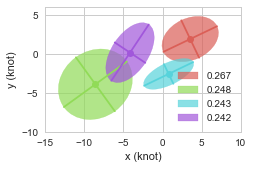

In [59]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [60]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points))
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXl0G/d9L/qZwU6AO8VF3AlJduKk1uI4cV0lt+xTnZPb
NE7UWHZbv5fGbXNP8rK93FwrdRZdxbbcNlHaJrb76tpur7JYuc5tErV5SaM4qU6dm1iWK596bUJS
JECQIEDsOzAz7w/oNxwMZoCZwQyIoedzDo5EAL/5DYmZDz7fneI4joMFCxYs7FDQ230CFixYsGAk
LJKzYMHCjoZFchYsWNjRsEjOggULOxoWyVmwYGFHwyI5CxYs7GhYJGfBgoUdDYvkLFiwsKNhkZwF
CxZ2NCySs2DBwo6GRXIWLFjY0bBIzoIFCzsaFslZsGBhR8MiOQsWLOxoWCRnwYKFHQ2L5CxYsLCj
YZGcBQsWdjQskrNgwcKOhkVyFixY2NGwSM6CBQs7GhbJWbBgYUfDIjkLFizsaFgkZ8GChR0Ni+Qs
WLCwo2GRnAULFnY07Nt9Aha2HxzHoVQqoVKpwGazweFwgKZpUBS13admwULLoDiO47b7JCxsH4rF
IpLJJLq7u1EulwEAoVAI/f396O7uBk3TFulZMDUsJfcaBsMwyOfziEQi8Hq9qFQqcDgc4DgOHMeB
YRhUKhWUSiVQFAWbzWaRngXTwSK51yA4jkOlUgHDMKAoCgzDYGFhAQzDwG63g2VZ5HI5uFwu2O1b
lwghvWKxCJqmYbPZYLPZYLfbLdKz0LGwzNXXGFiWRblcBvnY19bWEIvFMDU1BafTiVKphPX1dVAU
hXK5DLvdjq6uLng8HnR1dcFms9UcjxyHoiie7Ox2e937LFjYLlhK7jUCYn4yDAMAqFQqCAaDYFkW
DocD3d3dKJVKcLvdcDgc6O3thdfrRbFYRC6XQzKZRDgc5kmPEJ+QzCqVCjiOQ7FYtEjPQsfAIrnX
AFiWRaVSAcuyoCgK6XQaq6urGBgYQE9PD1ZWVmreT1EUOI4DRVFwu91wu90YGBgAx3EoFArI5/NI
JBJYX1+Hw+HgCa8R6dF0NVupXC6jp6fHIj0LbYNFcjscxI9Gggnr6+tIpVKYnJzklZpSjwVFUTyZ
CUkvl8shkUhgbW0NTqezxrwl5MZxHPL5PDY2NvgABvnXUnoWjIRFcjsUYvO0VCohEAjA6XTC7/fz
AYVWggVC0gOqipEovXg8jrW1NbhcLp7wyBqiFMVKzyI9C0bAIrkdCLF5Go/Hsb6+juHhYQwMDNQR
m1jJERJSC5qmeX/d4OAgT3q5XA6xWAyFQgEAEI1GeXIUKj2L9CwYAYvkdhiE5inLslhbW0M+n8fs
7Czcbnfd+41M+xCSHgBks1lsbGwAADY3N1EsFuF2u3ml53a7LdKzoDssktsh4DgO4XAYXV1dcLlc
KBQKCAQC8Hq98Pv9PHnIrQWMJTygSno0TWNoaAhAVXHm83nkcjlEo1Ge9IhPTynpOZ1OK0fPgiws
ktsBILlv8Xgcdrsd6XQakUgEu3fvRm9vb8O1UuSg1VxtBvFeNE3D6/XC6/UC2KrAIFUYpVKJN2uJ
0iPHEJNeqVQCwzDo7++Hw+GwSM8CD4vkTA5SuUBAzEG/3w+n06noGJ2SD26z2eDz+eDz+QBskV4u
l8PGxgbK5XKd0iNkRgIeHo8HhUKhpiLDIr3XNiySMynEpVmZTAb5fB7d3d2YnJxUfFPLva8TiK8R
6YXDYVQqFZ70CNGLlV65XLZI7zUOi+RMCGFwAQDC4TDi8Tjcbjf6+vpavoE7lQDEpFepVHjSy2Qy
fMoMUXoul8siPQsWyZkJ4ty3crmMYDAIiqLg9/sRCoVUH9Mo/1s7YLfb0d3dje7ubrhcLuTzefh8
Pj45mWEY3p/X1dVVE6AQkh4JZBDis0hvZ8EiOZNAnPuWSqWwurqKoaEhDA0N1STZ6gEzEh9N0zzp
AVWll8vl+DI0ocoTkx7LsnwAR0h6drsddrvdIj0TwyI5E4BhGL6hJcdxWFtbQzqdxvT0NJ+DBmhT
ZcI6VeFzZoPU722329HT04Oenh4AVeVLzNtEIgGWZWuUnlDBCUmvXC4jnU5jZGTEIj0TwiK5DoY4
uEBy39xuN/bs2WMlxIrQjHgcDgccDkcN6RGlF4vFwHFcjdIjpEcUITFvKYqylJ6JYJFch0JongJA
LBZDOBzGyMgI+vv7dctvE/qoWjmOGUFaSvX29oLjuBqlF4vFAAAej4dvJCpUvEKlZ5FeZ8MiuQ5E
PB6HzWaDy+UCy7IIhUIoFAqypVkErxVyMgIURcHpdMLpdNaQXi6XQzqdRrFYxNLSkqTSAyzS62RY
JNdBIOZpNBpFT08PGIZBIBBAd3d309KsVrATyFHv8xeSnsPhQCwWw8jICHK5HLLZLKLRKGia5gnP
4/HIkh6AmvkYNpvNIr02wiK5DoEw941ET7PZrKLSLAK9yMqspGcUcXAcx9fIOp1O9PX18WMcSY4e
6ZMnDGQIFZxFetsHi+S2GeLcN4ZhkM1mQdO0qtIsQDs5mZXUthMURcHlcsHlcqG/v7+G9NLpNE96
wlbxcqQXiUTQ19cHr9fLd1ixSE8/WCS3jZBrS26329HX16eK4CwYB3GKjRSkSK9YLCKfzyOVSvHz
MYTmLSG9QqHAR25LpRIA1M3HsEhPOyyS2yaIS7PW19eRSCQwMTGBVCql6aJuVcmJ/7VQhda/KZmP
ISQ9qaFAwig6+dyJuhfPvLVITz0skmszxLlv5XIZgUAAdrsde/bs4Vsl7VSz06jzU6K2WoEe9cBy
Q4EYhuHnYwiVnpDMLNLTDovk2gixeZpMJhEKhbBr1y4MDg7yF2orZNXudWpg1hvRCAIVzsdIpVIY
HR0Fx3GyQ4Es0tMOi+TaBGHfN47jEAqFkM1mMTMzww+CIWh3AEF8Q1AUxZtPFoyHMHqrdCgQmY9h
kV5zWCRnMORKszweD/x+v2RpVitkpZWcWJZFqVSCw+HQtH67YaQSNdoUljq+kqFALperRumJSa9S
qaBUKiEUCmF8fBwOh+M1SXoWyRkIYWE9UB3esrGxgdHRUfT398uu00pWrZi5gUCAVwM2mw12u52/
kcxyQ5jlPMVQQqLioUBC0ms2FIj4/Uiai1DpORyOGnLcibBIzgCQ3LcXX3wRe/bsAQCEQiGUSiXM
zc3B5XI1XN/OAEIqlUKlUkFfXx8GBgbAMAwikQgKhQLW19dRqVT4m0tcyvRawXYouWaQIj2poUAe
j6cucgvUKr2dTnoWyekMcWF9NpvF+vo6enp6MDExoag0qx0+OTLdK5lMwm6380X/pGaWpmkMDw9L
Fq0LE1zNat7uNIiHAglJDwAWFxf5VvHioUCANOkRRW920rNITkeIc99Icf34+Djf3kcpjCQ5krZC
qioWFxfr1pGfhe2JhEXrwlImodLbie2fOlHJNQMhPY/Hg0Qigbm5OX4S2sbGRsNJaMDWtSxuFW9G
0rNITgcQ87RSqfD9x4LBIDiOw9TUFD+TQCmMNFdJVcXg4GBNR2Hx/nLnJa7fFCe4OhyOGqVnVFMB
MUiE0owwkkTJsdUMBRJOQhMHMorFIiiKqqvI6GRYJNci5EqzBgYGUKlUNF0AWi/4RuTIcRw2NjYQ
j8cxMTGhmnjl9hMnuJIbR+gMJ6Rnpm9/IYwmIcDY5gJSx5YiPdJAlJCeUOmJA1DCmbexWAx9fX3w
eDw8WXYS8Vkk1wLEuW/r6+tIpVKYnJyE1+vdlsoFqXVk4A0Avqqi2X5az1vOGU5MJKDaL088Y6GT
Yeb0FPLl2ww2m61uPgb57EgASpijJyS9bDaLrq4u0DSNUCiE0dFR9PX1GfY7qYVFchogzn0rFosI
BAJwOBzw+/0

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAO0AAAC3CAYAAAD+WNkeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXlQFGf6x7/DDOMFQlwUiARFokaJR9TV/KJJFHWptWKC
iwZR2drViqvrsUmMQbwwCh4xmj+8tiTJ7npFPLbWWJuKm8Vrs0ajuKCieBAFUUAUiQMihJn+/TF2
0zP0NUPP9DQ8nyqroM9nhA/P228/7/saGIZhQBCEbvDTOgCCIFyDpCUInUHSEoTOIGkJQmeQtASh
M0hagtAZmkibl5eH5ORkAMDly5fx6quvIjk5GcnJyfj666+1CIkgFGOz2bB8+XIkJiYiOTkZRUVF
DvuPHj2KhIQEJCYmYt++fQ77+L/7AFBUVISkpCRMmTIFaWlpsNls8gEwXmb79u3MG2+8wUyaNIlh
GIbZt28f8/nnn3s7DIJwmyNHjjApKSkMwzDM//73P2bWrFncvvr6embMmDFMVVUVU1dXx/zmN79h
KioqGIZp+rvPMAzzhz/8gTl9+jTDMAyzbNky5l//+pfs/b2eaSMjI7Fp0ybu+0uXLuH48eOYOnUq
Fi9ejOrqam+HRBAukZOTg1dffRUAMHDgQFy6dInbV1hYiMjISAQFBcFsNmPw4ME4e/YsgKa/+wCQ
n5+PoUOHAgBee+01nDp1Svb+JrU+iFLi4uJQUlLCfd+/f39MmjQJL774IrZt24YtW7YgJSVF8ho5
OTmeDpPQOYMHD5Y9Jjc3G1ZrsOA+s9mMfv36Ce6rrq5GQEAA973RaERDQwNMJhOqq6sRGBjI7evQ
oQOXiJx/9wGAYRgYDAbuWIvFIhu316V1ZuzYsejYsSP39apVqxSdl7XymEfisViqERgYIH+gD6HH
mAHPxZ24fJSi46zWYHSNXC24707xYtHzAgICUFNTw31vs9lgMpkE99XU1DhI7Iyfn5/DsawLUmje
ezxjxgxcuHABAPD9998jJiZG44gIQppBgwbh5MmTAIDc3Fz06tWL2xcdHY2ioiJUVVWhvr4e586d
w0svvSR6rb59++LMmTMAgJMnT2LIkCGy99c8065YsQKrVq2Cv78/QkJCFGdagtCKsWPH4r///S8m
T54MhmGwevVqHD58GI8fP0ZiYiIWLVqEGTNmgGEYJCQkIDQ0VPRaKSkpWLZsGTZu3IgePXogLi5O
9v4GhtHfKJ+cnBxqHvPQY8yAZ5vHSp5pc3JyJJvHSq6hBZo3jwmCcA2SliB0BklLEDqDpCUInUHS
EoTOIGkJQmeQtAShM0hagtAZmldEEYSWPHhyXesQXIakJVo1tzBScHuYd8NwCWoeE4TOIGkJQmeQ
tAShM0hagtAZJC1B6AzNp1B1awpJgmjFeF3azMxMLF26FHV1dQCANWvW4N1338WePXvAMAyys7O9
HRJB6ArNp1B1ZwpJgmjNaD6FqjtTSAL2qUo8hSev7Sn0GDOg37i1RPOKKHemkATgsTmR9Djfkh5j
BvQbt81mw4oVK3D16lWYzWakp6ejW7du3P6jR49iy5YtMJlMSEhIwNtvvy16zpUrV5CWlgaj0Yju
3bsjIyPDwQkhNO89dmcKSYLQkn//+9+or69HVlYWFixYgLVr13L7fv75Z6xZswZffPEFdu7ciays
LNy/f1/0nM2bN2POnDn48ssvUV9fj+PHj8veX3NpU1JSsGnTJiQmJuLnn39WNIUkQWiJO8uCiJ3T
p08fVFVVgWEY1NTUcJOeS6FJ8zgiIoJbTSwqKgq7du3SIgyCQNHjYsHtUgMG3FkWROyc7t27Y+XK
ldi2bRsCAwMxbNgw2Zg1f6YlCC35yfaKy+e4syyI2DkZGRnYvXs3evbsid27d2Pt2rVIS0uTvL/m
zWOC0BvuLAsidk5QUBCXgbt06YJHjx7J3p8yLUG4iDvLggidAwDp6el47733YDKZ4O/vr2hZHJKW
IFzEz88PK1eudNgWHR3NfR0bG4vY2FjZcwBgyJAh2Lt3r2v3d+logiA0h6QlCJ1B0hKEziBpCUJn
UEdUC+XG/VrZY54Paaf4OMJ3IGlbAHcfA8a6pvJF94uUPO/GxWLZYwovFjcRmyTWFpJWpziLJCef
EErOETrmxkXH0j+S2LuQtD6OWPOVL5PSMchqwb83PxOTvN6BpPUhlAjqa7Cx6VXeq49KBbf/yofN
8OHQWgdqNHN9AWd59SKuydZP6xBchqTVAL6o3pA0v6qK+zomONij94ruF6k7cfWGz0g7YcIEbrRD
REQE1qxZo3FE6uNJWfliOhPdyz46tPBameRxaglN4noWn5C2rq4ODMNg586dWofiEVhZPSWq1WqF
0Wjk5BRDbn/+tTLB7e7ITOJ6Dp+QtqCgALW1tZg+fToaGhrw/vvvY+DAgZLn6GE2xruPG78Ojw5x
u5f3Zn296L7wiMaJ8Jrbi9wlvEOTbaUlj3DhwQMAQJTZ7Nr1uj+D0sL7uFpejWfbCx9DszG6jk9I
27ZtW8yYMQOTJk3CrVu38M477+Cbb76RnC/Hl2djZDOr0ehednVuwvbq01XyeIvF4jDFyQXLfcX3
6h8YIrk/sI/9uoXXylBstbqcdQMHBqLwYjHK65r2Kut1Nkat8Qlpo6Ki0K1bNxgMBkRFRSE4OBgV
FRUIDw/XOjSXaM4zK19UuWZsk/taH8NoqXPY1jOqi+x512/eayK4mMTRvcK4Z2JXxaWmsrr4hLQH
DhzAtWvXsGLFCpSXl6O6uhqdO3fWOizFNLeDiRVWiaxCWbRraIBDplWKs9h8iYXkZePLv1bmtrhE
8/EJaSdOnIjU1FQkJSXBYDBg9erViqaS1Bo1eoOlhBUSVCiDij3L5j2ukL3/gPaNfxzZa8vJC8Dt
jHvjYjFl22biE2aYzWZs2LBB6zAUo9arGzFh+bIqaeY6w5f1hQjpFkteSeOxrMDO8jqL25ymMtF8
FElrsVhQXFwMPz8/REREuNUUaymo8frGF2QVOo4VmC+v2uJStm0+ktKeOHECn332GW7cuIGwsDCY
TCaUlpYiOjoa06dPx+uvv+6tOH0CbwjrjqzXUQ3j4ycAlMuaV2+vuR1gbuzseyGiMwpKKjj5B7Tv
zMVz4eY9UXFbG2qu5fPgwQMsXboUjx49gtVqxccff4zISOnfL1FpFy1ahJCQECxfvhw9e/Z02Hf9
+nUcOHAAhw8fxieffNLM/wJ9oIWwSp5JASCyk7KOKFZUqW0DIuwSs/Lys+6Fm/cAOD7nRvcKc6tj
Ss/w1+XJzc3F2rVrsW3bNgCNa/kcOHAA7dq1Q1JSEmJjY3H+/HnBc9avX4/x48dj3LhxOH36NH78
8Uf3pX3vvfcQGhoquK9nz55ITU1FWVnr+CvbXGHFXueINYddbeYqKapg5ewTJn69K2UVyKsvxQBz
uEPWdW4uC6HX59v8ynLhHRId+UrX8gHAreWTm5sreM758+fRu3dv/O53v0PXrl2xZMkS2ZhF54hi
hRWaPDklJcX+ucJce5+oR5ojbH5VlUN2FRK2Z1QXTti8x41N0xciOisStqCkAsWV1SgoUZaVpWCF
ZgVn7++c8Z17tV19r+xLRBq6C/6TQmxdHnafK2v53LlzBx07dsRf//pXhIeHIzMzUzZm0Uy7ZMkS
3L59G5cuXcL169e57Q0NDV4fdK01ar97FWoO82VVCitqTwTgRzxxENf5OgPM4YLNY2f6hHWWzLhi
nVOtqZms5lo+wcHB3MTmsbGx+PTTT2XvLyrt7NmzcefOHWRkZGDu3LncdqPR6DCbekvmxv1atyub
XJUVcE/YAe07w2KxOLxvzXtcgYKSCpeuV8zcAmDPPGLiskg1k1sDgwYNwrFjxzBu3DjJtXzat2+P
c+fOYcaMGTA

## Goodness-of-fit Statistics

In [61]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points))
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.962  0.017      0.046  1.131680e-07      0.036       0.330

In [62]:
gmm_em = group_gmm_param_from_gmm_param_array(gmm_em_result, sort_group = True)
mixed_model_pdf_em = generate_gmm_pdf_from_grouped_gmm_param(gmm_em)

# 6. GMM by Optimization

In [63]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print(FIT_METHOD)

square_error


In [64]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -17.390074611150791
     jac: array([  4.09545779e+00,  -2.38418579e-07,  -2.38418579e-07,
         0.00000000e+00,  -2.38418579e-07,  -4.76837158e-07,
         4.09545922e+00,   2.38418579e-07,  -4.76837158e-07,
         0.00000000e+00,   0.00000000e+00,   9.53674316e-07,
         4.09545183e+00,   0.00000000e+00,   0.00000000e+00,
         9.53674316e-07,  -2.38418579e-07,  -1.90734863e-06,
         4.09546256e+00,   0.00000000e+00,   0.00000000e+00,
        -2.38418579e-07,  -2.38418579e-07,   0.00000000e+00,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 1403
     nit: 53
    njev: 53
  status: 0
 success: True
       x: array([ 0.23126488,  2.88215031,  2.88554367,  3.93679034,  2.27417082,
       -0.14948966,  0.44427113, -6.58771304, -3.07444987,  4.90726992,
        4.23427418,  0.28063387,  0.19895141,  2.53163354, -1.8108725 ,
        2.28108834,  2.01980358,  0.56363265,  0.12551258, -3.12055787,
       -1.63511333,  1.8130324

## 6.1 GMM Result

In [65]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.444  -6.588  -3.074  4.907  4.234   0.281
2  0.231   2.882   2.886  3.937  2.274  -0.149
3  0.199   2.532  -1.811  2.281  2.020   0.564
4  0.126  -3.121  -1.635  1.813  2.544  -0.205

GMM Plot Result
0.444271129281 [[-6.58771304 -3.07444987]] [ 3.79636008  5.25338234] -58.9063790793
0.231264883928 [[ 2.88215031  2.88554367]] [ 2.23633895  3.95840362] -97.265954767
0.198951407506 [[ 2.53163354 -1.8108725 ]] [ 1.40873731  2.70156061] -51.1044182044
0.125512579285 [[-3.12055787 -1.63511333]] [ 1.73992438  2.5947742 ] -164.647278458


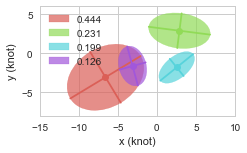

In [66]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 6.2 Bivariate Goodness-of-fit statistics

In [67]:
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.024      0.170  2.802764e-08      0.018       0.164

In [68]:
# Empirical Power
pd.DataFrame(gofs_mean_set_bivar).set_index('year_lim')

Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  \
year_lim                                                                    
(2001, 2006)   28.655779  0.026022  5.325342e-08    0.023511     0.225463   
(1991, 1996)    0.035405  0.019661  2.771579e-08    0.017937     0.162780   

              R_square  
year_lim                
(2001, 2006)  0.983180  
(1991, 1996)  0.990596

In [69]:
%%time
# GMM test against previous data
fig1, ax1 = plt.subplots(figsize=(3,2.5))
fig2, ax2 = plt.subplots(figsize=(3,2.5))
gofs_mean_set_bivar_previous = []
prop_cycle = iter(mpl.rcParams['axes.color_cycle'])
for year_length in [10]:
    color = next(prop_cycle)
    start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
    gofs_bivar_previous=Parallel(n_jobs=-1)(delayed(gmm_gofs_in_previous)(df_all_years[str(sub_start_year):str(sub_start_year+year_length-1)], gmm_pdf_result, config) 
       for sub_start_year in arange(start_year, end_year+1)) 
    gofs_bivar_previous=pd.DataFrame(gofs_bivar_previous, index=arange(start_year, end_year+1))    
    
    gofs_bivar_set[year_length].plot(y='R_square',ax=ax1, style='--', color=color, label='Empirical')
    gofs_bivar_set[year_length].plot(y='K_S',ax=ax2, style='--', color=color, label='Empirical')
    gofs_bivar_previous.plot(y='R_square', color=color, ax=ax1, label='GMM on previous')
    gofs_bivar_previous.plot(y='K_S', color=color, ax=ax2, label='GMM on previous')
    year_lim = end_year-year_length-5, end_year-year_length
    gofs_mean = gofs_bivar_previous.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
    gofs_mean['year_lim']=year_lim
    gofs_mean_set_bivar_previous.append(gofs_mean)
    
print('10 year comparison')
plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='start year', legend=True)
plt_configure(ax=ax2, ylabel='K-S', xlabel='start year', legend=True)
align_figures()
display(pd.DataFrame(gofs_mean_set_bivar_previous).set_index('year_lim'))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


10 year comparison


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOoAAAC3CAYAAAAchMJnAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlYVNX/wPH3sO+LgDuIgKIiqEAqLmCmuZcbmhjupf5M
zS3U3Gn/mvbVylyz7Gu55JJ7iVuBIqCCgKCCoKiACMi+zZzfH+QkiQLKNnBfz+PzyJ25554z8Jl7
77nnnI9MCCGQSCS1mlpNV0AikZRNClSJRAVIgSqRqAApUCUSFSAFqkSiAqRAlUhUQI0FamhoKN7e
3k9tP3XqFCNGjGD06NHs3r0bAIVCwbJlyxg9ejTe3t7Ex8cDEB8fz5gxY/Dy8mL58uUoFIpqbYNE
Ul1qJFA3b97MkiVLyM/PL7G9sLCQTz/9lG3btrFjxw527dpFSkoKJ0+epKCggF27djFv3jw+++wz
AD799FPef/99du7ciRACPz+/mmiORFLlaiRQraysWL9+/VPbY2JisLKywtjYGC0tLVxcXAgKCiIk
JISePXsC0LFjR8LDwwGIiIigc+fOALi7uxMQEFB9jZBIqpFGTRy0X79+JCQkPLU9KysLQ0ND5c/6
+vpkZWWRlZWFgYGBcru6ujpFRUUIIZDJZMr3ZmZmlnnskJCQSmiBRFI1XFxcSt1eI4H6LAYGBmRn
Zyt/zs7OxtDQ8KntCoUCDQ0N1NTUSrzXyMioXMcp7cMICQl55odUl0ntrn7JqTnsOnmdk0G3aWvd
gE//rzsymey5J5Fa1etra2tLfHw86enpFBQUEBwcTKdOnXB2dubcuXMAXLlyhdatWwPQrl07AgMD
ATh37hyurq41VneJpCxCCHb9Ec3Uz07ye2A8Tc31GdStZbn2rRVn1EOHDpGTk8Po0aNZuHAhkydP
RgjBiBEjaNSoEX379sXf35+33noLIQSffPIJAD4+PixdupQ1a9ZgY2NDv379arglEsmzHforlp+O
R2Fuosu4gW1x79QcdTVZ+XYW9UxwcHCFttd1UrurT25eoVi/+7JIy8gr9fXn1alWXfpKJHXN7cQM
Pv4+kJy8QnS0NXjPsyMmhtoVLkcKVImkilyOTmbB+j+5EJ5I8LWklyqrVtyjSiR1zfHzcWzYF4aa
TMa8sS64d2r+UuVJgSqRVLIDZ2PY+ls4RvpaLJnYhbYtG7x0mVKgSiSVzKVNQ85dNmH+2y40NTco
e4dykO5Ra4nAwEDc3Nzw9vZW/ps1a9YLlzdnzhwKCgpKbLt27Rpff/11hcrZt28fq1evfuF61Bf5
hXJOXIhHCIFlI0O+nO1eaUEK0hm1VJM/+v2pbe6dmjN+ULsXen3rktfLddyuXbuydu3aila3VKWV
07ZtW9q2bVsp5Uv+kZVTgO+2QCJvpaKpIaO3q5VyaGtlkQK1lvP29sbe3p4bN26gp6eHq6srf/31
FxkZGWzbtg0/Pz9OnjxJdnY2aWlpzJgxg379+tG7d2+OHTvG8uXLSU9PJz09ncmTJ3P06FHWrl3L
nj17+Pnnn8nKymLw4MHMmjWLn376id9//53c3FxMTU0rfPatjx4+ymX5pvPEJ2bSs2MzenZsViXH
kQK1FGWdAV/29We5cOFCiTm6Hh4eADg5ObFkyRImT56Mjo4O33//PT4+PgQFBQGQm5vL999/T2pq
Kp6enrz22mslyu3atSsTJkxQDrd8+PAhmzdv5rfffiM8PJwzZ86QlZVFeno627dvR01NjcmTJ3P1
6tUXakd9ERh+n29/DSU1I58hPW2Y8kZ71Mo70qiCpECtRUq79D179iwODg4AGBkZYWdnp/z/4/m8
r7zyCmpqapibm2NkZERqamqJMlq2LDme9M6dO7Rq1QodHR1kMhnz588HQFNTk7lz56Knp0diYiJF
RUVV0k5VJ/6etSWTycjKKWTSEAeGethW+uXuk6RArQMiIiIASElJISsrCzMzsxKv//sPyMrKitjY
WGVn06xZs3j77bc5efIke/bsITc3l+HDhyOktdlLSErNYfvhCJo3NGRs/za80q4Rmz/sSwMjnSo/
thSotci/L30B8vLyytwvJSWF8ePHk5mZyfLly1FXV3/u+xs0aMA777zD22+/TXZ2NkOGDMHR0RFd
XV3eeustACwsLEhOTn7xxtQhhUUKfv49igNnYygsUuBkZ45CIVBTk1VLkALIRD372nzWPERVnZe5
b98+YmNjlZevFaWq7X5Z5W13XkERn/0QREhUMubGOowf7IB7x2ZVci/6vDpJZ1SJ5Dmi49O4HJ2M
S5uGLBz3CjraNRMyUqCquOHDh9d0FeqkIrkCDXU1OrSywHdaN9pam6GpUXPjg6SRSRLJvySl5jBz
9WkCw+8D4GRnUaNBClKgSiQl3E7M4IP1f5KQnEXs3Uc1XR0l6dJXIgEUCoF/6D027AslM6eQyW84
MNTDrqarpSQFqkQCXLnxgC9+CkZdTcasUR3p26VFTVephGq/9H1WeorHDhw4wJAhQ/Dy8mLPnj0A
FBQUMG/ePEaNGsWkSZOIi4sDIDIykp49eypnmxw9erS6m1Np7ty5w6xZsxg1ahTjxo3j3Xff5caN
GwCsX7+etm3bkpT0zyoBDx8+xMHBgX379pGQkIC9vT2bNm0qUea0adNKTRtSG3z88cfcu3evRutw
NSaFkxdvA9CptQVv9bVng89rtS5IoQbOqE+mp7hy5QqfffYZGzZsACA1NZV169axb98+jIyMmDBh
Am5ubpw5cwY9PT12795NbGwsvr6+bN26lYiICCZOnMikSZMqrX7bDkXgH3q30soD6N6hGZOGODzz
9dzcXKZPn46vry+dOnUCICwsjFWrVrFjxw4ArK2tOXbsGBMmTADg6NGjNGnSRFmGlZUVJ06c4N13
3wUgLS2N+Ph4zM3NK7UtleXDDz+ssWPfS8lix6kHxCQmoKutQTenJujpaDK2f5saq1NZqj1Qn5We
AlCeGUxMTABwdHQkNDSUmzdv4u7uDoCNjQ0xMTEAhIeHc+vWLfz8/GjRogWLFy8usaK+qjh9+jRd
u3ZVBikUD8T/8ccflT8PHDiQ48ePKwP19OnTvPrqq8rXTU1NMTExISYmBltbW44dO0b//v0JDg5+
6njbtm3jyJEjaGhoYGlpiYuLC+vXrychIYGHDx9y7949Fi1apPw9QfHvZvbs2VhYWJCUlIS7uztz
5sxh4cKFytk5GzduZMuWLQQHB6NQKJgwYQJdunRh7NixHD16FJlMxqpVq3Bzc+PHH39kxYoVWFhY
sGDBArKyspDL5cyePRs3Nzfl7B9tbW1Wr16NjY0NvXr14v3330cIQX5+PitXrqzwtD25XMGn24OI
S8ynYysLvAe2RU9Hs0Jl1IRqD9RnpafQ0NCgRYsW3Lx5k5SUFPT19Tl//jzW1ta0bduW06dP06dP
H0JDQ0lKSkIul+Pk5ISnpyft27dnw4YNfPPNN/j4+JRZh2etSB4SEkKHptChqVmpr7+4vOeugh4Y
GIiWlpbyPV9++SU5OTmkp6ezePFi7t27h4mJCYWFhRw9ehQhBJqamqSlpREXF4eenh7Z2dl0796d
LVu2MHLkSPbv38/o0aM5ffp0iWPfvn2bvXv3KocafvXVV2zevJl79+7x6NEjpk+fztWrV1m3bh16
enrK/R48eEB8fDyzZs1CT0+PFStWYGlpycOHD7GysuKdd95h7969hIWFMX/+fAoKCli+fDlLliyh
YcOG/O9//8POzo4zZ87Qv39/MjMziYiI4MyZM1haWjJgwABSU1NZsGABX331Ffn5+Vy6dAktLS0S
ExNRU1Nj3759CCH4v//7PxISErh8+TI5OTkV+k0E3cgi7n4GHW30GPqKNpkPYgl5UMFfZw2o9kB9
VnoKAGNjYxY

Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  \
year_lim                                                                    
(1991, 1996)    0.113088  0.032103  4.221787e-08    0.022453     0.202708   

              R_square  
year_lim                
(1991, 1996)  0.984516

Wall time: 10.7 s


In [70]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig_gmm = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,  xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXuYG3d9L/wZ3bXS3u/3i2yHkBJiGxJuhlO3JhwKfUPd
xkn75pyWtOU9beHA0wdibklOSGKHlpwWSNzTNKVtCMS87oHilrctIQWX9BAcuwvNlWSv0u5qV1rd
R9fRzPuH/JsdjWakmdGMVrOZz/PoSbzSb34jaeajz/dOcRzHwYIFCxb2KGy7fQIWLFiwYCQskrNg
wcKehkVyFixY2NOwSM6CBQt7GhbJWbBgYU/DIjkLFizsaVgkZ8GChT0Ni+QsWLCwp2GRnAULFvY0
LJKzYMHCnoZFchYsWNjTsEjOggULexoWyVmwYGFPwyI5CxYs7GlYJGfBgoU9DYvkLFiwsKdhkZwF
Cxb2NCySs2DBwp6GRXIWLFjY07BIzoIFC3saFslZsGBhT8MiOQsWLOxpWCRnwYKFPQ2L5CxYsLCn
YZGcBQsW9jQcu30CFnYfHMehWCyCYRjY7XY4nU7YbDZQFLXbp2bBQtOgOI7jdvskLOweCoUCkskk
Ojs7USqVAADr6+vo7e1FZ2cnbDabRXoWTA1Lyb2GUS6XkcvlEIlE4PP5wDAMnE4nOI4Dx3Eol8tg
GAbFYhEURcFut1ukZ8F0sEjuNQiO48AwDMrlMiiKQrlcxsLCAsrlMhwOB1iWRTabhdvthsOxc4kQ
0isUCrDZbLDb7bDb7XA4HBbpWWhbWObqawwsy6JUKoF87RsbG4jFYpiamoLL5UKxWEQ4HAZFUSiV
SnA4HOjo6IDX60VHRwfsdnvV8chxKIriyc7hcNS8zoKF3YKl5F4jIOZnuVwGADAMg1AoBJZl4XQ6
0dnZiWKxCI/HA6fTie7ubvh8PhQKBWSzWSSTSWxubvKkR4hPSGYMw4DjOBQKBYv0LLQNLJJ7DYBl
WTAMA5ZlQVEU0uk01tbW0NfXh66uLqyurla9nqIocBwHiqLg8Xjg8XjQ19cHjuOQz+eRy+WQSCQQ
DofhdDp5wqtHejZbJVupVCqhq6vLIj0LLYNFcnscxI9GggnhcBipVAqTk5O8UlPqsaAoiiczIell
s1kkEglsbGzA5XJVmbeE3DiOQy6Xw9bWFh/AIP+1lJ4FI2GR3B6F2DwtFosIBoNwuVwIBAJ8QKGZ
YIGQ9ICKYiRKLx6PY2NjA263myc8soYoRbHSs0jPghGwSG4PQmyexuNxhMNhDA0Noa+vr4bYxEqO
kJBa2Gw23l/X39/Pk142m0UsFkM+nwcARKNRnhyFSs8iPQtGwCK5PQahecqyLDY2NpDL5TA7OwuP
x1PzeiPTPoSkBwA0TWNrawsAsL29jUKhAI/Hwys9j8djkZ4F3WGR3B4Bx3HY3NxER0cH3G438vk8
gsEgfD4fAoEATx5yawFjCQ+okJ7NZsPAwACAiuLM5XLIZrOIRqM86RGfnlLSc7lcVo6eBVlYJLcH
QHLf4vE4HA4H0uk0IpEIxsbG0N3dXXetFDloNVcbQbyXzWaDz+eDz+cDsFOBQaowisUib9YSpUeO
ISa9YrGIcrmM3t5eOJ1Oi/Qs8LBIzuQglQsExBwMBAJwuVyKjtEu+eB2ux1+vx9+vx/ADulls1ls
bW2hVCrVKD1CZiTg4fV6kc/nqyoyLNJ7bcMiOZNCXJqVyWSQy+XQ2dmJyclJxTe13Ovagfjqkd7m
5iYYhuFJjxC9WOmVSiWL9F7jsEjOhBAGFwBgc3MT8XgcHo8HPT09Td/A7UoAYtJjGIYnvUwmw6fM
EKXndrst0rNgkZyZIM59K5VKCIVCoCgKgUAA6+vrqo9plP+tFXA4HOjs7ERnZyfcbjdyuRz8fj+f
nFwul3l/XkdHR1WAQkh6JJBBiM8ivb0Fi+RMAnHuWyqVwtraGgYGBjAwMFCVZKsHzEh8NpuNJz2g
ovSy2SxfhiZUeWLSY1mWD+AISc/hcMDhcFikZ2JYJGcClMtlvqElx3HY2NhAOp3G9PQ0n4MGaFNl
wjpV4d/MBqn37XA40NXVha6uLgAV5UvM20QiAZZlq5SeUMEJSa9UKiGdTmN4eNgiPRPCIrk2hji4
QHLfPB4P9u3bZyXEitCIeJxOJ5xOZxXpEaUXi8XAcVyV0iOkRxQhMW8pirKUnolgkVybQmieAkAs
FsPm5iaGh4fR29urW36b0EfVzHHMCNJSqru7GxzHVSm9WCwGAPB6vXwjUaHiFSo9i/TaGxbJtSHi
8TjsdjvcbjdYlsX6+jry+bxsaRbBa4WcjABFUXC5XHC5XFWkl81mkU6nUSgUsLS0JKn0AIv02hkW
ybURiHkajUbR1dWFcrmMYDCIzs7OhqVZzWAvkKPe5y8kPafTiVgshuHhYWSzWdA0jWg0CpvNxhOe
1+uVJT0AVfMx7Ha7RXothEVybQJh7huJntI0rag0i0AvsjIr6RlFHBzH8TWyLpcLPT09/BhHkqNH
+uQJAxlCBWeR3u7BIrldhjj3rVwug6Zp2Gw2VaVZgHZyMiup7SYoioLb7Ybb7UZvb28V6aXTaZ70
hK3i5UgvEomgp6cHPp+P77BikZ5+sEhuFyHXltzhcKCnp0cVwVkwDuIUGylIkV6hUEAul0MqleLn
YwjNW0J6+Xyej9wWi0UAqJmPYZGedlgkt0sQl2aFw2EkEglMTEwglUppuqibVXLi/1qoQOtnSuZj
CElPaiiQMIpOvnei7sUzby3SUw+L5FoMce5bqVRCMBiEw+HAvn37+FZJe9XsNOr8lKitZqBHPbDc
UKByuczPxxAqPSGZWaSnHRbJtRBi8zSZTGJ9fR2Dg4Po7+/nL9RmyKrV69TArDeiEQQqnI+RSqUw
MjICjuNkhwJZpKcdFsm1CMK+bxzHYX19HTRNY2Zmhh8EQ9DqAIL4hqAoijefLBgPYfRW6VAgMh/D
Ir3GsEjOYMiVZnm9XgQCAcnSrGbISis5sSyLYrEIp9Opaf1uw0glarQpLHV8JUOB3G53ldITkx7D
MCgWi1hfX8f4+DicTudrkvQskjMQwsJ6oDK8ZWtrCyMjI+jt7ZVdp5WsmjFzg8EgrwbsdjscDgd/
I5nlhjDLeYqhhETFQ4GEpNdoKBDx+5E0F6HSczqdVeS4F2GRnAEguW/PP/889u3bBwBYX19HsVjE
3Nwc3G533fWtDCCkUikwDIOenh709fWhXC4jEokgn88jHA6DYRj+5hKXMr1WsBtKrhGkSE9qKJDX
662J3ALVSm+vk55FcjpDXFhP0zTC4TC6urowMTGhqDSrFT45Mt0rmUzC4XDwRf+kZtZms2FoaEiy
aF2Y4GpW83avQTwUSEh6ALC4uMi3ihcPBQKkSY8oerOTnkVyOkKc+0aK68fHx/n2PkphJMmRtBVS
VbG4uFizjvxb2J5IWLQuLGUSKr292P6pHZVcIxDS83q9SCQSmJub4yehbW1t1Z2EBuxcy+JW8WYk
PYvkdAAxTxmG4fuPhUIhcByHqakpfiaBUhhprpKqiv7+/qqOwuL95c5LXL8pTnB1Op1VSs+opgJi
kAilGWEkiZJjqxkKJJyEJg5kFAoFUBRVU5HRzrBIrknIlWb19fWBYRhNF4DWC74eOXIch62tLcTj
cUxMTKgmXrn9xAmu5MYROsMJ6Znp118Io0kIMLa5gNSxpUiPNBAlpCdUeuIAlHDmbSwWQ09PD7xe
L0+W7UR8Fsk1AXHuWzgcRiqVwuTkJHw+365ULkitIwNvAPBVFY3203recs5wYiIBlX554hkL7Qwz
p6eQH99GsNvtNfMxyHdHAlDCHD0h6dE0jY6ODthsNqyvr2NkZAQ9PT2GvSe1sEhOA8S5b4VCAcFg
EE6nE4FAgCe

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAO0AAAC3CAYAAAD+WNkeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXlQFGf6x7/DDOMFQlwUiARFokaJR9TV/KJJFHWptWKC
iwZR2drViqvrsUmMQbwwCh4xmj+8tiTJ7npFPLbWWJuKm8Vrs0ajuKCieBAFUUAUiQMihJn+/TF2
0zP0NUPP9DQ8nyqroM9nhA/P228/7/saGIZhQBCEbvDTOgCCIFyDpCUInUHSEoTOIGkJQmeQtASh
M0hagtAZmkibl5eH5ORkAMDly5fx6quvIjk5GcnJyfj666+1CIkgFGOz2bB8+XIkJiYiOTkZRUVF
DvuPHj2KhIQEJCYmYt++fQ77+L/7AFBUVISkpCRMmTIFaWlpsNls8gEwXmb79u3MG2+8wUyaNIlh
GIbZt28f8/nnn3s7DIJwmyNHjjApKSkMwzDM//73P2bWrFncvvr6embMmDFMVVUVU1dXx/zmN79h
KioqGIZp+rvPMAzzhz/8gTl9+jTDMAyzbNky5l//+pfs/b2eaSMjI7Fp0ybu+0uXLuH48eOYOnUq
Fi9ejOrqam+HRBAukZOTg1dffRUAMHDgQFy6dInbV1hYiMjISAQFBcFsNmPw4ME4e/YsgKa/+wCQ
n5+PoUOHAgBee+01nDp1Svb+JrU+iFLi4uJQUlLCfd+/f39MmjQJL774IrZt24YtW7YgJSVF8ho5
OTmeDpPQOYMHD5Y9Jjc3G1ZrsOA+s9mMfv36Ce6rrq5GQEAA973RaERDQwNMJhOqq6sRGBjI7evQ
oQOXiJx/9wGAYRgYDAbuWIvFIhu316V1ZuzYsejYsSP39apVqxSdl7XymEfisViqERgYIH+gD6HH
mAHPxZ24fJSi46zWYHSNXC24707xYtHzAgICUFNTw31vs9lgMpkE99XU1DhI7Iyfn5/DsawLUmje
ezxjxgxcuHABAPD9998jJiZG44gIQppBgwbh5MmTAIDc3Fz06tWL2xcdHY2ioiJUVVWhvr4e586d
w0svvSR6rb59++LMmTMAgJMnT2LIkCGy99c8065YsQKrVq2Cv78/QkJCFGdagtCKsWPH4r///S8m
T54MhmGwevVqHD58GI8fP0ZiYiIWLVqEGTNmgGEYJCQkIDQ0VPRaKSkpWLZsGTZu3IgePXogLi5O
9v4GhtHfKJ+cnBxqHvPQY8yAZ5vHSp5pc3JyJJvHSq6hBZo3jwmCcA2SliB0BklLEDqDpCUInUHS
EoTOIGkJQmeQtAShM0hagtAZmldEEYSWPHhyXesQXIakJVo1tzBScHuYd8NwCWoeE4TOIGkJQmeQ
tAShM0hagtAZJC1B6AzNp1B1awpJgmjFeF3azMxMLF26FHV1dQCANWvW4N1338WePXvAMAyys7O9
HRJB6ArNp1B1ZwpJgmjNaD6FqjtTSAL2qUo8hSev7Sn0GDOg37i1RPOKKHemkATgsTmR9Djfkh5j
BvQbt81mw4oVK3D16lWYzWakp6ejW7du3P6jR49iy5YtMJlMSEhIwNtvvy16zpUrV5CWlgaj0Yju
3bsjIyPDwQkhNO89dmcKSYLQkn//+9+or69HVlYWFixYgLVr13L7fv75Z6xZswZffPEFdu7ciays
LNy/f1/0nM2bN2POnDn48ssvUV9fj+PHj8veX3NpU1JSsGnTJiQmJuLnn39WNIUkQWiJO8uCiJ3T
p08fVFVVgWEY1NTUcJOeS6FJ8zgiIoJbTSwqKgq7du3SIgyCQNHjYsHtUgMG3FkWROyc7t27Y+XK
ldi2bRsCAwMxbNgw2Zg1f6YlCC35yfaKy+e4syyI2DkZGRnYvXs3evbsid27d2Pt2rVIS0uTvL/m
zWOC0BvuLAsidk5QUBCXgbt06YJHjx7J3p8yLUG4iDvLggidAwDp6el47733YDKZ4O/vr2hZHJKW
IFzEz88PK1eudNgWHR3NfR0bG4vY2FjZcwBgyJAh2Lt3r2v3d+logiA0h6QlCJ1B0hKEziBpCUJn
UEdUC+XG/VrZY54Paaf4OMJ3IGlbAHcfA8a6pvJF94uUPO/GxWLZYwovFjcRmyTWFpJWpziLJCef
EErOETrmxkXH0j+S2LuQtD6OWPOVL5PSMchqwb83PxOTvN6BpPUhlAjqa7Cx6VXeq49KBbf/yofN
8OHQWgdqNHN9AWd59SKuydZP6xBchqTVAL6o3pA0v6qK+zomONij94ruF6k7cfWGz0g7YcIEbrRD
REQE1qxZo3FE6uNJWfliOhPdyz46tPBameRxaglN4noWn5C2rq4ODMNg586dWofiEVhZPSWq1WqF
0Wjk5BRDbn/+tTLB7e7ITOJ6Dp+QtqCgALW1tZg+fToaGhrw/vvvY+DAgZLn6GE2xruPG78Ojw5x
u5f3Zn296L7wiMaJ8Jrbi9wlvEOTbaUlj3DhwQMAQJTZ7Nr1uj+D0sL7uFpejWfbCx9DszG6jk9I
27ZtW8yYMQOTJk3CrVu38M477+Cbb76RnC/Hl2djZDOr0ehednVuwvbq01XyeIvF4jDFyQXLfcX3
6h8YIrk/sI/9uoXXylBstbqcdQMHBqLwYjHK65r2Kut1Nkat8Qlpo6Ki0K1bNxgMBkRFRSE4OBgV
FRUIDw/XOjSXaM4zK19UuWZsk/taH8NoqXPY1jOqi+x512/eayK4mMTRvcK4Z2JXxaWmsrr4hLQH
DhzAtWvXsGLFCpSXl6O6uhqdO3fWOizFNLeDiRVWiaxCWbRraIBDplWKs9h8iYXkZePLv1bmtrhE
8/EJaSdOnIjU1FQkJSXBYDBg9erViqaS1Bo1eoOlhBUSVCiDij3L5j2ukL3/gPaNfxzZa8vJC8Dt
jHvjYjFl22biE2aYzWZs2LBB6zAUo9arGzFh+bIqaeY6w5f1hQjpFkteSeOxrMDO8jqL25ymMtF8
FElrsVhQXFwMPz8/REREuNUUaymo8frGF2QVOo4VmC+v2uJStm0+ktKeOHECn332GW7cuIGwsDCY
TCaUlpYiOjoa06dPx+uvv+6tOH0CbwjrjqzXUQ3j4ycAlMuaV2+vuR1gbuzseyGiMwpKKjj5B7Tv
zMVz4eY9UXFbG2qu5fPgwQMsXboUjx49gtVqxccff4zISOnfL1FpFy1ahJCQECxfvhw9e/Z02Hf9
+nUcOHAAhw8fxieffNLM/wJ9oIWwSp5JASCyk7KOKFZUqW0DIuwSs/Lys+6Fm/cAOD7nRvcKc6tj
Ss/w1+XJzc3F2rVrsW3bNgCNa/kcOHAA7dq1Q1JSEmJjY3H+/HnBc9avX4/x48dj3LhxOH36NH78
8Uf3pX3vvfcQGhoquK9nz55ITU1FWVnr+CvbXGHFXueINYddbeYqKapg5ewTJn69K2UVyKsvxQBz
uEPWdW4uC6HX59v8ynLhHRId+UrX8gHAreWTm5sreM758+fRu3dv/O53v0PXrl2xZMkS2ZhF54hi
hRWaPDklJcX+ucJce5+oR5ojbH5VlUN2FRK2Z1QXTti8x41N0xciOisStqCkAsWV1SgoUZaVpWCF
ZgVn7++c8Z17tV19r+xLRBq6C/6TQmxdHnafK2v53LlzBx07dsRf//pXhIeHIzMzUzZm0Uy7ZMkS
3L59G5cuXcL169e57Q0NDV4fdK01ar97FWoO82VVCitqTwTgRzxxENf5OgPM4YLNY2f6hHWWzLhi
nVOtqZms5lo+wcHB3MTmsbGx+PTTT2XvLyrt7NmzcefOHWRkZGDu3LncdqPR6DCbekvmxv1atyub
XJUVcE/YAe07w2KxOLxvzXtcgYKSCpeuV8zcAmDPPGLiskg1k1sDgwYNwrFjxzBu3DjJtXzat2+P
c+fOYcaMGTA

## 6.3 Univariate Goodness-of-fit

In [71]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

def f_em(V,theta):
    return (mixed_model_pdf_em([[V*cos(theta),V*sin(theta)]]))*V

Speed Distribution Comparison
(0.97211309604783569, 0.88469855750451787, 0.95890219255175302)
Wall time: 31 s


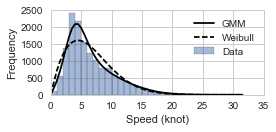

In [72]:
%%time
x = arange(0, max_speed, 0.5)
# 1. Fit Weibull
_, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed, x=x)

# 2. GMM Model
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y_gmm = array(list(zip(*y_))[0])/0.02

# 3. Plot Comparison
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data')
plot(x, y_gmm*len(df.speed),'-', color='black', label='GMM')
plot(x, y_weibull*len(df.speed), '--', color='black', label='Weibull') 
print('Speed Distribution Comparison')
plt_configure(xlabel='Speed'+speed_unit_text,
              ylabel='Frequency',legend=True, figsize=(4, 2))
plt.gca().set_ylim(bottom = 0)
plt.tight_layout()
plt.locator_params(axis='y', nbins=5)

# 4. R square for GMM, Weibull
print(R_square_for_speed(df['speed'], f, weibull_params, f_em))

In [73]:
%%time
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y_cdf_gmm = array(list(zip(*y_))[0])

# 5.2. CDF Comaprison
plot(x, y_ecdf,'o', alpha=0.8, label='Data')
plot(x, y_cdf_gmm,'-', color='black',label='GMM')
plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
plt_configure(xlabel = "V", ylabel='P', legend=True, figsize=(4,3))

plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label = 'Empirical')
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')
plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label = 'GMM')
plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'}, figsize=(4,3))
align_figures()

cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
print(cdf_diff.max(), cdf_diff_weibull.max()) 
print(x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADSCAYAAACPQ+9ZAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3Xl8U1X+//FXlq5J90LLVpaygwgtA8g6Ah0WRYQKBbHo
DIo448JXZEAcEIEBFOfnAsiI+lAWHbZxZqiKaFlEgYpNKVgKBSmUvWUpS5Juae7vj9hApZQtN+ny
ef5Dkpvc87kteffec+85V6MoioIQQriQ1tMFCCFqHgkWIYTLSbAIIVxOgkUI4XISLEIIl5NgEUK4
nKrBsmfPHhITE697ffPmzcTHx5OQkMCaNWvULEEI4QF6tVb8wQcfsH79evz8/Mq9XlJSwrx581i3
bh1+fn6MHj2avn37Eh4erlYpQgg3U22PJSoqioULF173+uHDh4mKiiIoKAhvb29iY2P56aef1CpD
COEBqu2xDBgwgBMnTlz3utlsJiAgwPncYDBgNptvuj6TyeTS+oQQty42Nva23q9asNyI0WjEYrE4
n1sslnJBU5nb3ThXMplM0v417adl5bHhh4Ocv1KKj5eObV98yC8/7yD/7AlKigsA8PYLoF7077h0
7hiXcrNRFHuF6/byMaD38sXL14CXrxEfv0C8/QPx9Q/BEBKJl48BNF74GQLx8vFH0fng6+uHTu9D
KVq89ToASu12dFrHTriX3vFvic1e7vFv33ejx7/9vK3UhqJU/hlPt++l1xIZ5g9A/XAjkxM7V/o7
vVV38kfd7cESHR1NTk4OFy9exN/fn9TUVMaNG+fuMsQd+GJTKp989l9+Tt/F6Zz92IqtjJnyGRlH
s9mfvoOLuYfRaK8eXRcXXCEnYzNanReG0IYEhjUgILQBPgF1CQyJwD+wLnpDGH6+v/bDacBLp63w
y1hSWoqXzhEgGg2UjXDTX/M40OCNpcDmfAwK5y8VlXtc0ftu9PjazxcW2bEUVtzOrXzeXe2X6dcl
6hZ/q+pwW7AkJSVhtVpJSEhg6tSpjBs3DkVRiI+PJyIiwl1liNtgs9nQ6x3/RWbMXsBX/1vtXKbT
e6P3MbB8bgLF1kvO1/V6P8IbtSe8fkuCI5thCInCGFqfUkWDl+76v7LXhoSXTkugwavCL6PBR0ux
4/tDaKAvoHDZUkKQ0YeQAB/QQHFJKfXDdc7HkaEG+nUJJOfUZc5csBAa6Ffh+270+NrPHz6eR/06
gXf8eXe17/hMFDGt6qr7n+MmVA2Whg0bOk8nDxkyxPl637596du3r5pNiztkt9vZsmULy5YtIykp
iY9XbeBgnp4zRWEE1WmCvbSIKxfOUGorptRWjK8xlEZt+zjCJKodoXWisJUqoIGwQB9nMOhusGfx
25CIbhBU4Zcx/+JlQoICPfYFqmqHolWd2w+FRNV09uxZFi9ezCeffEJOTg4AhsBwpr32/7iUe4hT
2XsABdAQ1qA1kdG/o150Z/xCo5x9HF76q3scXjot/r5eALe4Z1F5SFS3L1ZtJ8FSyxUVFbHv6CXW
fLmTN2bNxsvbh6bteqHVQs5BE/t3rgUgtEFrGrXuRYNWPfAPDHPufWh+syfi7+v4LxUa5EdxSSnN
G4ZUiV1z4V4SLLXUzz//zCuvvEL+5QI6D30FhUB6PPAUv+xP5ci+HwAFX0MI0Z0eoEmH/vgHR6DV
OPZMFCAsyKfCPZGqcowvPEuCpZbJyclh+vTprFy5EkVRqNOoHdofvyNr5xpyj2UCEFq/Fa27DaNh
q+6U2jWAo+8lLNgRJhoNsiciKiXBUou8tWQ5UyaOp6S4iOC6TWkVG8cve39g2+qZADRu050WXYYT
FNkKNBAccE3nqw78fb3w9/UicXDbWhsoaVl5JO86xpnzFiLDDPSXcK2QBEstUFpayp5fzrM/z4Ax
qC6N7x3A2eP7+XHDUgAio39H256PUrdhyxt2vvroNdQPN9bqvZS0rDxWfJXpfH76nNn5/E5/Jj/+
+CMTJ06kefPmKIqCzWZj7NixDB48uML3nzp1igMHDlT5s6oSLDWYzWZjwvN/5btt24l56G8odh1N
2vdmz5Zl2EtLCKnXknv7PUlYgzYAlJTanWHy285XxXy81p+VSd51rMLXN+06dldh261bN9566y3A
cSV6YmIiTZs2pU2bNte9NyUlhezsbAkW4RlHjx5l6LAR7E1PJTA0kpzMHez7fgXmCyfxCwijfZ8n
aNS2NxqtlrDAq30nN9orMZmOe2hLqo4z5y0Vv36h4tfvhMFgICEhga+++oqVK1dy5swZ8vLyaNu2
LR07dmTp0qUUFhbSqVMnAgICWLRoEYqiYLFY+Mc//kHTpk1dVsvdkGCpgRZ9uIrJLzxFodVMo9Y9
8DcE8OP/5gMaomMfpH3vRPTejjElZYc8tb3v5FZEhhk4fe76AbORoQaXthMWFsY333zDwIEDGTFi
BEVFRXTv3p3XX3+d8ePHk52dTb9+/fj0009ZsGABERER/POf/+Trr7/mmWeecWktd0qCpYbZnn6U
KS/+hZLiIlp3H8Xx/ds4nn+K4DqN6TjgWcIatHZeFVt2uri2953cqv5dosr1sZRx9bicU6dO0alT
J37++WdSUlIwGo3YbLbr3hcREcHf//53/P39yc3NJSYmxqV13A0JlhqitLQUrVbL9p/P8cDYVzmY
voWfd67DbrfRvPNQOvV7gpAgg5wuvgtlP6tNu45x5oJFlWt2zGYza9eu5ZFHHqGgoIBZs2aRk5PD
6tWrURQFrVaL3e4YmDl9+nS+/fZbjEYjU6ZMoSrde1CCpQYoKipi4IPD0Ac0wr9xX0zffMbJQz/i
FxBK7KAXiGgag10jp4tdIaZVXZf/7FJSUkhMTESr1VJaWspzzz1H06ZNmTRpEunp6Xh7exMZGUle
Xh4tW7ZkyZIltGvXjoceeogxY8bg5+dHeHg4eXl5Lq3rbkiwVHNWq5W4gUPY8f1mIqPaYN6ahDn/
NHUa38vAMX/Dzxh0045Z4Tldu3Zl586dFS5bv36987HJZCIiIoKIiAg2btwIwAMPPOCWGu+EBEs1
ZjabGTJkCDu+30rdhi05dzobW0kRLbvG0653IiUaL8JkL0V4gARLNfVT5mlGj3iIw5mpBEc0I+/E
IfTePjzw+EwatOrOZUsJtlK77KUIj5BgqYbSsvL4bGMWDVt243zeGS7mZuNjCGbw43No3Lwd4OhP
ceX0hELcDgmWaiQtK49vf8zhh10/4x8QzskjmVw8d4LgOlF0i5+BT0i9cu/39PSEovaSYKkmfjld
SMqhTFI2LiN18yqCIppx/kQmEVFtGTZ+PnatL1esJWi1Gpm6QHicBEs1sfuwhV/2ppCy8RN0em/O
n8ikTuMO9Bw5A19/x10OmjcMkUMfUSXIvZuricOHf2HjZ/PQaLSU2oqJbNaZHvEzQOfjfI8c+lRP
x48f5/nnn2fkyJGMHTuW8ePHc+jQIRYuXEibNm3Izc11vvf8+fO0a9eOzz//nBMnTtCqVSuWLl1a
bn0TJkyo8NbG7iR7LFVcWlYe67dksGHFbEqKHfd/aNauO/cnvIKlCLk+xYUmT57M2rVrK1xWXFyM
t7d3hcsqM2LECBYsWHDD5QUFBTzzzDPMnj2bTp06AbB3715mzZpFly5daNKkCRs2bOCee+4B4Kuv
vqJevat9aVFRUWzcuJHx48cDkJ+fT05OjsdvWSx7LFVY2fwfeResKHbHWJG6TTpxf8IrBBj9iQzz
56XHOjM5sbOESjW1ZcsWunXr5gwVgA4dOrB8+XIABg8ezNdff13u/ffff7/zeUhICGFhYRw+fBiA
DRs2MHDgQDdVf2Oyx1KFJe86ht1uZ9v/3sN6+RwRjdvRa+TfsBZDK9lLcbkFCxbccO9CrbsEnDhx
gqioq4ewzzz

0.0265701692784 0.0701636382665
5.0 2.5
Wall time: 56.1 s


Direction Distribution Comparison
0.98633955913
Wall time: 10.2 s


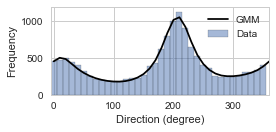

In [74]:
%%time
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]
y = array(list(zip(*y_))[0])
density, _ = dir_hist(df['dir'], bins=arange(-5, 375, 10), density=True)

plt.bar(arange(0, 360, 10), density*10*len(df['dir']), width=10, alpha=0.5, label='Data')
plot(x/pi*180, y*len(df['dir']) ,'-', color='black', label='GMM')
plt_configure(xlabel='Direction'+dir_unit_text, ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4,2))
plt.tight_layout()
dir_fig = plt.gcf()
print('Direction Distribution Comparison')
print(sector_r_square(density*10, y[:-1]))

In [75]:
pd.DataFrame(gofs_mean_set).set_index('year_lim')

k_s  r_square  r_square_dir
year_lim                                      
(2001, 2006)  0.039069  0.991261      0.948159
(1991, 1996)  0.029541  0.995171      0.966484

In [76]:
fig1, ax1 = plt.subplots(figsize=(2.8,2.5))
fig2, ax2 = plt.subplots(figsize=(2.8,2.5))
fig3, ax3 = plt.subplots(figsize=(2.8,2.5))
prop_cycle = iter(mpl.rcParams['axes.color_cycle'])
gofs_mean_set = []

x = bins = arange(0, df['speed'].max() + 1)
_, _, density_speed_expected_gmm, y_cdf_gmm, density_dir_expected = gmm_marginal_distribution(f, x)
_, _, density_expected_weibull, y_cdf_weibull = fit_weibull(df.speed, x, weibull_params)
    
for year_length in [10]:
    start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
    gofs = []
    for sub_start_year in arange(start_year, end_year+1):
        df_previous = df_all_years[str(sub_start_year):str(sub_start_year+year_length-1)]
        
        _, _, density_speed, y_ecdf_previous, density_dir = empirical_marginal_distribution(df_previous, x) 

        r_square_speed = sector_r_square(density_speed, density_speed_expected_gmm)
        r_square_speed_weibull = sector_r_square(density_speed, density_expected_weibull)

        k_s_speed = (np.abs(y_ecdf_previous - y_cdf_gmm)).max()
        k_s_speed_weibull = (np.abs(y_ecdf_previous - y_cdf_weibull)).max()
        
        r_square_dir = sector_r_square(density_dir*10, density_dir_expected[:-1])
        gofs.append({'year': sub_start_year, 
                     'r_square': r_square_speed, 'k_s': k_s_speed, 'r_square_dir': r_square_dir,
                      'r_square_weibulll': r_square_speed_weibull, 'k_s_weibulll': k_s_speed_weibull})

    gofs=pd.DataFrame(gofs).set_index(['year'])  
    year_lim = end_year-year_length-5, end_year-year_length
    gofs_mean = gofs.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
    gofs_mean['year_lim']=year_lim
    gofs_mean_set.append(gofs_mean)

    color = next(prop_cycle)
    # GMM agains previous data
    gofs.plot(y='r_square', ax=ax1, color=color, label='GMM on previous')
    gofs.plot(y='k_s', ax=ax2, color=color, label='GMM on previous')
    gofs.plot(y='r_square_dir', ax=ax3, color=color, label='GMM on previous')
    # Empricial agains previous data
    ax1.plot(gofs_univar_set[year_length].r_square, color=color, linestyle='--', label='Empirical')
    ax2.plot(gofs_univar_set[year_length].k_s, color=color, linestyle='--', label='Empirical')
    ax3.plot(gofs_univar_set[year_length].r_square_dir, color=color, linestyle='--', label='Empirical')
    color = next(prop_cycle)
    gofs.plot(y='r_square_weibulll', ax=ax1, label='Weibull', color=color)
    gofs.plot(y='k_s_weibulll', ax=ax2, label='Weibull', color=color)
    
    plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='start year', legend=True)
    plt_configure(ax=ax2, ylabel='K-S', xlabel='start year', legend=True)
    plt_configure(ax=ax3, ylabel='$\ R^2$', xlabel='start year', legend=True)

align_figures()
display(pd.DataFrame(gofs_mean_set).set_index('year_lim'))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAN8AAAC3CAYAAACSXosbAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXlYVdX+/19nZB4FBWRQUFBBJHAASTTLMIdvOWCKkVOl
/cwhb4bmlMMtb3m1m5ZXM+tqt7oNljmXilo4guIATqigKPPMAc7hcPbvD67nSojixEFdr+c5z8PZ
e6/hczbvvddee633kkmSJCEQCBoduakrIBA8rgjxCQQmQohPIDARQnwCgYkQ4hMITIQQn0BgIkwm
vuPHjxMTE1Nn++7duxkyZAgvvvgi3333HQAGg4G5c+fy4osvEhMTQ3p6OgDp6emMGDGC6Oho5s2b
h8FgaNQYBIJ7QjIBq1evlgYMGCBFRUXV2q7T6aRnnnlGKioqkrRarTR48GApNzdX2rFjhxQbGytJ
kiQdO3ZMmjBhgiRJkjR+/Hjp4MGDkiRJ0pw5c6Rff/21cQMRCO4Bk9z5PD09Wb58eZ3tFy5cwNPT
Ezs7O9RqNSEhIRw5coTExER69OgBQFBQEKdOnQIgOTmZrl27AhAREcH+/fsbLwiB4B5RmqLQyMhI
MjIy6mwvKyvDxsbG+N3KyoqysjLKysqwtrY2blcoFOj1eiRJQiaTGY8tLS29bdmJiYn3IQKBoOGE
hITcdLtJxFcf1tbWaDQa43eNRoONjU2d7QaDAaVSiVwur3Wsra1tg8q52Y+RmJhY74/UFDEYJEo0
OqoNBuxtzFHIZQ1K97DFebfcGOflrBIOnMzkRGoeZ9IL0VVVA/D1wuewsVSzJf4SZ9ILUCsVqJVy
VCoFVuZKXuzjB8CuI5c5f6UIfbUBfbUBe2szXJ2seKar121/91td7JuU+Hx8fEhPT6eoqAhLS0sS
EhIYN24cMpmMuLg4+vXrR1JSEr6+vgB06NCBQ4cO0a1bN/bt20doaGiDyknPKiEjp4yMnFIysssI
bOOEoxIkSWLB54cwVyuwMFNiplZgMEgE+DjRI6gluqpq3v/XEar01RgMYJAkDAaJ8E5uPB/hQ6VW
z9Rle9Hpq9FV1Xy0VQb6dPXkjaggJEni10PpuDe3wdPFBmsLlfHOfSO6qmryiirILawgt6icth4O
eLnacjmrhKXfHKWwpJKiMh0GQ82w3LED/RnUqw15RRV8sTkZZ3sLPFrY0L6VI65OVjctwxSUV1Zx
LVdDRm4ZBcWVONqaERbohplKcd/KMBgkruWVcfhcGX7tdVhbqjmSks1X288gk4GXiy3+3s3w926G
Sllz8e4f3pr+4a3rzfPpLp483cXzvtXxOk1CfJs2baK8vJwXX3yRGTNmMG7cOCRJYsiQIbRo0YI+
ffoQHx/P8OHDkSSJ9957D4DY2FjmzJnD0qVL8fb2JjIyskHlvfFhXJ1tvdqBVldNwunsOvtkMhk9
gloik8nq7JfLoK2HPQBKpRxNRRVqlRwbSzVqlQIzlYK2Hg4AFJRUsuL747XSKxUyoiPbEfW0L/nF
FUxaEkdpeVWtY0b374CXqy0qpYIr2WU42prh5+mAg60ZcpkM75Z2AGTmadh37GqttHbWat6ICiI0
wBVtVTXXCnSoL+RRodVTUamnUqcnNMAVO2uzBv129ZFyKZ8r2WVoq/RoddVoddVU6qoZ2bcdFmZK
1m5K5qc9qXXSfR/gCsC6rSnEH7+Gp4sNEU+4083fBfVtRGkwSMjlMtIzS/gh7jxXsku5kl1mvLMF
+ucRHuhGeCc3WjSzJLCNM7ZW6nuK834ik6THa1ZDYmIi+y8ocG9ujUcLG9ybW+PsYEnSsaMEBwdT
qaumUqunQlfzTySXy7CzMsPexgxJkqjUVaNUyFHIZcgb2NS7jqaiikPJmaRnlnI5u5QKrZ7qagN9
w1rxdBdP8ooqmLv6AI62ZjjbW+LsYIGzvQXtWjni0cKG66eqvjtZdbWB/JJKcgsruHi1mNNpBZxO
K2DmqC74ejoQf/wai9cdqZPuw0k9aNfKkdzCCtQqeYOFeOlaMZ4tbFAo5KzbmsL3u87XOWbt7Gdx
drBg5+HL7D2WgXtza9ydrXG0s6C0XMez3bwA+HJzMjuPXKa4TAeAlbmSHk+48/rgQOPvXFqu4/j5
XJLO1XxG9etAjydacv5KIdM+2odaKf9fq0JRRlS/bjjamjcolgfFrZr5j6X4HoVnvjvhesfU4ZQs
fvsjGS9PNyzNlJibKbEwU/KEb3Psbcz427ojJJzOpn94awb1alNHhBVaPTmF5Rw7m8PuhCtculbC
3HHd6NLBhbyiCk6k5mKmVmKuVmCuVmKmUuDlaoNK2fBm5eWsEnYnXGHP0RqhLpoQTmFpJQs/P0Rq
RhHX/1utzJXE9OtA//DWVOkN5BVV0NzR0vgM1lTO563q0SSanYIHy/U7ZdcOLigqrhIS0v6mxwX4
OJFyqYAf41LZEn+JsI6uhAe60S3Alcw8Da+9v9N4rEIuo5u/i7EZ52RvQe/O9/5c5Oliy+gB/sT0
60CJRguAnZUZ+cUVdGjdjCBfZ4J8nWnrbo9CUfPMplLKcXWyuueyGxshPoGR/uGt6dPVkx0H0/lh
9zniEjOwsVTTLcCVZnbmPOHrTHNHS1q72vJkUMt7fk68FQq5DAebmiajXC7j89nPolQ8WqMhhfgE
tVCrFAzs4U1kqBeZeRqa2VsYty8Y391k9XrUhAdCfIJ6UKsUeLk27L2p4O549C4nAsFDghCfQGAi
hPgEAhMhxCcQmAghPoHARAjxCQQmQohPIDARQnwCgYkQ4hMITIQQn0BgIoT4BAITIcQnEJgIIT6B
wEQ8luKr1OlNXQWBoPGnFBkMBt59913Onj2LWq1m0aJFeHl5Gff//PPPfP7559jY2DBo0CCioqLY
sGEDP/30EwBarZbTp08THx9PRkYG48ePp1WrVgCMGDGCfv363bYO7395hNlju96RvYFAcL9pdPHt
3LkTnU7Hf/7zH5KSkli8eDErV64EoKCggI8//pgNGzZga2vL6NGjCQsLY/DgwQwePBiA+fPnM2TI
EGxtbUlOTmbMmDGMHTv2jupw9GwOH36VSGxMZ6MVgeB/aCqq2J1whTNpBZipFVhZqLA0V2FlrsTS
XIV7C2v8PB1ua0lYWq4j6WwuPh52uDlZ3/LYx5FGF1991u8AGRkZ+Pn5YW9fY8XXsWNHjh8/jru7
OwAnT54kNTWVefPmAXDq1CkuXbrErl278PLy4p133qnlbF0fgW2cOHAyk3/85xhThwffsQtZY2Iw
SGQVaCgrr6Kth/1de3BKksTV3DKKy2s7fd9IWmYJW+IvsSfxCpW66lvm19LZmj5dPendxcNo93C9
nJRLBWw/mEb88WtU6Q3IZBDSrgUDe3jzhK9zk/ERvVOuWxQG+zWnV7D7PcfR6OKrz/pdqVTi5eVF
amoqeXl5WFlZceDAAWOTEmDVqlVMnDjR+D0wMJCoqCgCAgJYuXIln3zyCbGxsbetQ/8n1OQXqolL
zKCspJB+nWv+qU1pJV9tkKjQGiitqCarqIqsgioyC3VkFVah09dYdrk4qOgZYEs7d/MGn/gqvcTJ
9HKOnCsjs7DGD/TTLZtwtlXhbK/E2VaFuVpO0kUNl3NrbPvsLBWEt7fF39MSgyShrZKorDKg1Rmo
rJK4lFVJypUyvtySwrqtKfi2NCfI24oijZ7EVA25xTXP1M1slPh7WXExS0vC6WwSTmfjZKukq681
nVpbYqZ6sK2O+3U+K3UG9pws4dC5MiQJ9iRm8Gv8aQZ0ccBcffcxNLr46rN+B7Czs2PmzJlMmjQJ
e3t7/P39cXCoMZwtKSnh0qVLtVyp+/TpY7SI79OnDwsXLmxQHbqHdiEwUMfMT+M5cr4ET3dXAlwq
eCI4hPziGqf

k_s  k_s_weibulll  r_square  r_square_dir  \
year_lim                                                       
(1991, 1996)  0.031305      0.068497  0.974492      0.973057   

              r_square_weibulll  
year_lim                         
(1991, 1996)            0.89708

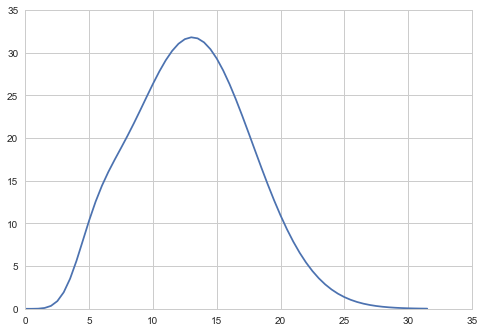

In [77]:
x = arange(0, max_speed, 0.5)
y_ =[]
for x_ in x:
    def sub_f(theta, V=x_):
        return 0.5*1.225*V**3*(mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V
    y_.append(integrate.nquad(sub_f, [[0, 2*pi]]))
y = array(list(zip(*y_))[0])
plot(x, y)

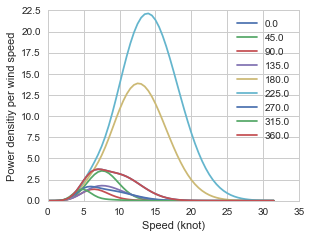

In [78]:
for rad in  linspace(0,2*pi, num=9):
    x = arange(0, max_speed, 0.5)
    y = [0.5*1.225*x_**3*f(x_, rad) for x_ in x]
    plot(x, y, label=rad/pi*180)
plt_configure(legend=True, 
              xlabel='Speed'+speed_unit_text, ylabel='Power densitiy per wind speed'+speed_power_density_unit, 
              figsize=(4.5,3.5))

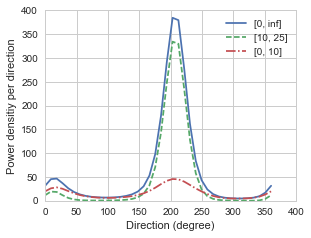

In [79]:
for integrate_interval, line_style in zip([[0, inf], [10, 25], [0,10]],  ['-', '--', '-.']):
    rads = linspace(0,2*pi, num=40)
    y_ =[]
    for rad in rads:
        def sub_f(V,theta=rad):
            return 0.5*1.225*V**3*(mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V
        y_.append(integrate.nquad(sub_f, [integrate_interval]))
    y = array(list(zip(*y_))[0])
    plot(rads/pi*180, y, line_style, label=str(integrate_interval))
plt_configure(legend=True, 
              xlabel='Direction'+dir_unit_text, ylabel='Power densitiy per direction'+dir_power_density_unit, 
              figsize=(4.5,3.5))

## 6.4 Sectoral Comaprison

In [80]:
%%time
incre = max(SECTOR_LENGTH, 10)
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre) 
                                        for angle in arange(0, 360, incre))  
# This R square is computed as in paper 
# Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection))

0.918896461828
Wall time: 13 s


In [81]:
# Turn to parrallel would run 50% faster
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = np.radians([angle, incre])  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # 0. Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        # 1. Get Weibull and ECDF
        x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed)
        # 2. Get GMM PDF, CDF
        _, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)
        
        # 3. R square for GMM, Weibull
        bins = arange(0, sub_df.speed.max()+1)
        density, _ = np.histogram(sub_df['speed'], bins=bins, normed=True)
        density_expected_gmm_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                            for x_ in bins[:-1]]
        density_expected_gmm = array(list(zip(*density_expected_gmm_ ))[0])/direction_prob
        R_square_gmm = sector_r_square(density, density_expected_gmm)
        
        density_expected_weibull = sp.stats.weibull_min.cdf(bins[1:], *weibull_params) - sp.stats.weibull_min.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density, density_expected_weibull)

        # 4. K-S for GMM, Weibull
        cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
                
        # 5. Make Plots
        fig = plt.figure(figsize=(10,1.9))
        # 5.1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5, label='Data')                  
        plot(x, y_gmm*data_size,'-', color='black', label='GMM')
        plot(x, y_weibull*data_size, '--', color='black',label='Weibull')   
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 5.2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        curves = {'direction': angle, 'datasize': data_size, 'weight': direction_prob, 'x': x, 
                  'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf,
                  'max_cdf_diff_gmm': cdf_diff.max(), 'max_cdf_diff_weibull': cdf_diff_weibull.max(), 
                  'r_square_gmm': R_square_gmm, 'r_square_weibull': R_square_weibull}
        curve_collection.append(curves)
        
        plt.tight_layout()
        plt.show()
        print('%s (%s - %s) degree' % (angle, start_angle, end_angle))
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull)
        print('max diff:', cdf_diff.max(), cdf_diff_weibull.max(), 
              'speed value:', x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()], 'y gmm', y_cdf_gmm[cdf_diff.argmax()])
        print(' ')
    return curve_collection

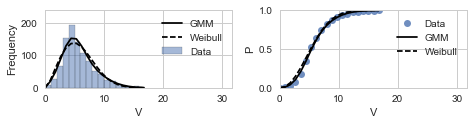

5.0 (-5.0 - 15.0) degree
data size: 940 weight 0.06434830230010953
GMM Weibull
R square 0.94660442271 0.893584426131
max diff: 0.0465226888996 0.0771050329888 speed value: 5.2936317736 3.52908784906 y gmm 0.485392204717
 


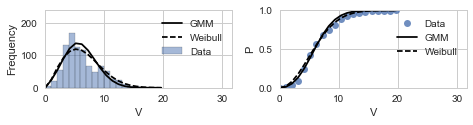

25.0 (15.0 - 35.0) degree
data size: 941 weight 0.06441675794085433
GMM Weibull
R square 0.862400159846 0.863550701235
max diff: 0.0676363046635 0.0863085999142 speed value: 9.32929359971 3.10976453324 y gmm 0.880601235588
 


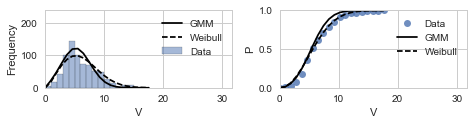

45.0 (35.0 - 55.0) degree
data size: 733 weight 0.050177984665936474
GMM Weibull
R square 0.873163451328 0.876632659717
max diff: 0.103484692611 0.0710506981546 speed value: 8.32831801027 3.70147467123 y gmm 0.887932168736
 


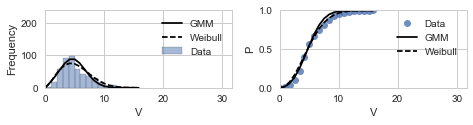

65.0 (55.0 - 75.0) degree
data size: 478 weight 0.03272179627601314
GMM Weibull
R square 0.900880563288 0.90192415501
max diff: 0.0824535809656 0.0708249627593 speed value: 7.51690934494 3.34084859775 y gmm 0.896261112346
 


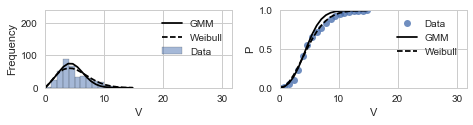

85.0 (75.0 - 95.0) degree
data size: 389 weight 0.026629244249726177
GMM Weibull
R square 0.810974040025 0.841840969387
max diff: 0.108041774317 0.0671053122498 speed value: 7.03517299286 2.34505766429 y gmm 0.8869620828
 


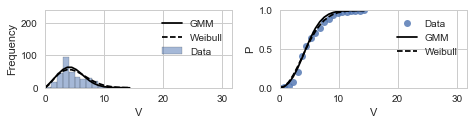

105.0 (95.0 - 115.0) degree
data size: 343 weight 0.023480284775465498
GMM Weibull
R square 0.777547475601 0.776200966885
max diff: 0.0783758642852 0.0839138587616 speed value: 6.78668637352 2.26222879117 y gmm 0.853886068367
 


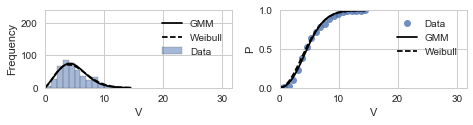

125.0 (115.0 - 135.0) degree
data size: 440 weight 0.030120481927710843
GMM Weibull
R square 0.919362255076 0.922249488189
max diff: 0.051320600737 0.0690600072628 speed value: 7.63190430316 2.28957129095 y gmm 0.87859332801
 


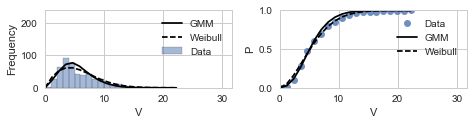

145.0 (135.0 - 155.0) degree
data size: 495 weight 0.0338855421686747
GMM Weibull
R square 0.877251641255 0.873785995754
max diff: 0.0568918023715 0.0557929377357 speed value: 7.02224671272 2.34074890424 y gmm 0.751841297321
 


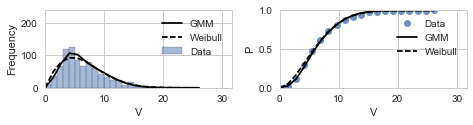

165.0 (155.0 - 175.0) degree
data size: 827 weight 0.056612814895947425
GMM Weibull
R square 0.950963900491 0.920863965675
max diff: 0.0303424717566 0.04915850468 speed value: 4.12100178694 2.74733452463 y gmm 0.268327419416
 


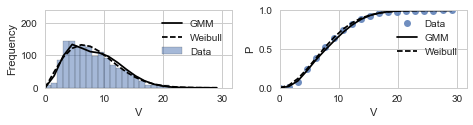

185.0 (175.0 - 195.0) degree
data size: 1414 weight 0.09679627601314349
GMM Weibull
R square 0.961538606222 0.947434571361
max diff: 0.0396950798424 0.0377350711433 speed value: 7.66009006708 3.06403602683 y gmm 0.487179036141
 


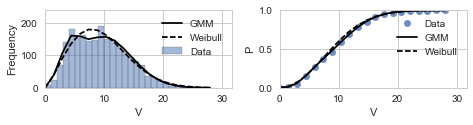

205.0 (195.0 - 215.0) degree
data size: 2136 weight 0.14622124863088717
GMM Weibull
R square 0.977058416236 0.945162886949
max diff: 0.0163012474079 0.0412166746348 speed value: 2.94368633091 8.83105899272 y gmm 0.0612450676327
 


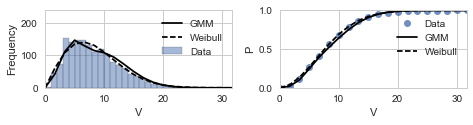

225.0 (215.0 - 235.0) degree
data size: 1559 weight 0.1067223439211391
GMM Weibull
R square 0.969370613913 0.969156353984
max diff: 0.0430615297919 0.0254410857213 speed value: 9.99411732915 3.33137244305 y gmm 0.643275865975
 


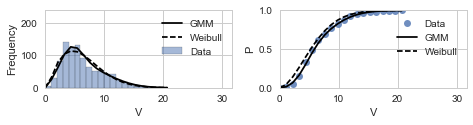

245.0 (235.0 - 255.0) degree
data size: 928 weight 0.06352683461117196
GMM Weibull
R square 0.951880289078 0.916223918506
max diff: 0.0375972351103 0.109576956624 speed value: 4.35634696338 3.26726022254 y gmm 0.299687247648
 


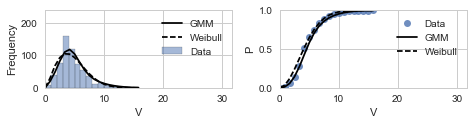

265.0 (255.0 - 275.0) degree
data size: 618 weight 0.04230558598028478
GMM Weibull
R square 0.912539461289 0.860260367887
max diff: 0.0756221099061 0.105856247264 speed value: 4.16713576637 2.50028145982 y gmm 0.432468504981
 


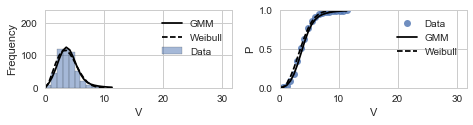

285.0 (275.0 - 295.0) degree
data size: 498 weight 0.03409090909090909
GMM Weibull
R square 0.960018120331 0.959683498876
max diff: 0.0682391786217 0.0818509854162 speed value: 3.58440753022 2.38960502015 y gmm 0.443809014149
 


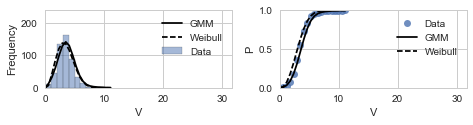

305.0 (295.0 - 315.0) degree
data size: 502 weight 0.03436473165388828
GMM Weibull
R square 0.936745733633 0.95139278759
max diff: 0.0958172908401 0.1393102638 speed value: 4.09290559547 2.33880319741 y gmm 0.633266374499
 


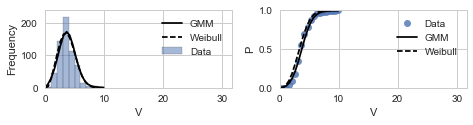

325.0 (315.0 - 335.0) degree
data size: 622 weight 0.04257940854326397
GMM Weibull
R square 0.912373874228 0.922374189259
max diff: 0.0752114990764 0.127905810641 speed value: 3.65362100611 2.60972929008 y gmm 0.479450880345
 


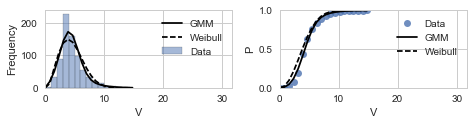

345.0 (335.0 - 355.0) degree
data size: 745 weight 0.05099945235487404
GMM Weibull
R square 0.912018120691 0.85380514044
max diff: 0.0530991233894 0.167245125164 speed value: 3.11884985549 3.11884985549 y gmm 0.247729995873
 
Wall time: 59.1 s


In [82]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
    
curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle)

0.9296133004862959 0.9129599174640215


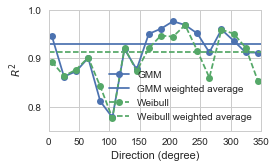

In [83]:
diff_df = pd.DataFrame(curve_collection) 

gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, 
                                                  diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$", xlabel='Direction'+dir_unit_text)
ylim = min(plt.gca().get_ylim()[0],0.75)
plt.gca().set_ylim(top=1, bottom=ylim)
plt.tight_layout()
print(gmm_mean, weibull_mean)

0.05308877359360834 0.0723021659833228


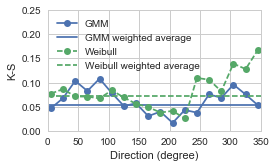

In [84]:
gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.max_cdf_diff_gmm, diff_df.max_cdf_diff_weibull, 
                                                  diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S", xlabel='Direction'+dir_unit_text)
ylim = max(plt.gca().get_ylim()[1],0.25)
plt.gca().set_ylim(top=ylim, bottom=0)
plt.tight_layout()
print(gmm_mean, weibull_mean)

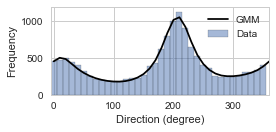

In [85]:
# Compare direction weight with previous figure
display(dir_fig)

## 6.5 Insufficient-fit Sector Investigation

### (1) Data Variability, by Bootstrap (Resampling)

In [86]:
angle =  max_diff_angle = diff_df.ix[diff_df['max_cdf_diff_gmm'].idxmax()]['direction']
incre = rebinned_angle

In [87]:
FRACTION = 1

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

85.0 (75.0 - 95.0) Degree Speed Distribution
0.0947392302722 7.0 0.883942315105


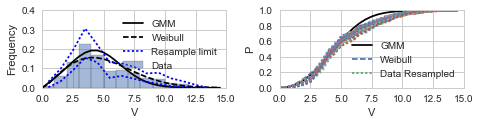

In [88]:
x = arange(0, sub_max_speed, 0.5)
_, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed, x)
_, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)

fig = plt.figure(figsize=(10,1.9))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   

# 1. Data
bins=arange(0, sub_max_speed)
sub_df['speed'].hist(ax=ax1, bins=bins, alpha=0.5, label='Data', normed=True)  

# 2. GMM
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_cdf_gmm,'-', color = 'black', label='GMM')

# 3. Weilbull 
ax1.plot(x, y_weibull,'--',color='black',label='Weibull')
ax2.plot(x, y_cdf_weibull,'--',label='Weibull')

# 4. Data Resampled
count_collection = []
for i in range(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)    
    resampled_count, _ = np.histogram(sub_df_resampled['speed'], bins=bins, normed=True) 
    count_collection.append(resampled_count)
    
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_ecdf = ecdf(x) 
    ax2.plot(x, y_ecdf,':', label='Data Resampled')
    if i == 1: 
        plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})

print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
count_collection = np.array(count_collection)
mx, mn = np.max(count_collection,0), np.min(count_collection,0)
ax1.plot(bins[1:]-0.5, mx, ':', color='blue')
ax1.plot(bins[1:]-0.5, mn, ':', color='blue', label='Resample limit')
ax1.set_ylim(bottom = 0)
# plt_configure(ax=ax1, xlabel='$V$',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax1, xlabel='V', ylabel='Frequency',legend={'loc':'best'})
ax1.locator_params(axis='y', nbins=5)
ax2.locator_params(axis='y', nbins=5)
plt.tight_layout()
diff = abs(y_ecdf - y_cdf_gmm)
print(diff.max(), x[diff.argmax()], y_cdf_gmm[diff.argmax()])

### (2) Time Variability

In [89]:
fig_time_variability_3d = plt.figure()
ax1 = fig_time_variability_3d.gca(projection='3d')

fig_time_variability_cdf,ax2 = plt.subplots(figsize=(3,1.8))

ax2.plot(x, y_cdf_gmm,'-', color='black', label = 'GMM')
ax2.plot(x, y_cdf_weibull,'--', label='Weibull')

# 3. Data
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])
for start_time in range(2001, 2015, 5):
    end_time = start_time + 4 
    df_other_years = df_all_years[str(start_time):str(end_time)]
    df_other_years_at_angle, sub_max_speed_other_year = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_ecdf = ecdf(x)
        ax2.plot(x, y_ecdf,':', label = start_time)
        
        count, division = np.histogram(df_other_years_at_angle['speed'], normed=True,
                                       bins=arange(0, sub_max_speed_other_year))
        ax1.bar(left=division[:-1], height=count, zs=start_time, zdir='x', 
                color=next(prop_cycle), alpha=0.8)
        x_3d = start_time*np.ones_like(x)
        ax1.plot(x_3d, x, y_gmm, '-', color='black', label='GMM'  if start_time == 2011 else '')
        ax1.plot(x_3d, x, y_weibull, '--', color='blue', label='Weibull' if start_time == 2011 else '')
        
print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
ax1.set_ylim(bottom = 0)
ax1.set_zlabel('Frequency')
plt_configure(ax=ax1, xlabel='Time',ylabel='V', legend=True)
plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})

ax1.set_zlim(bottom = 0)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


85.0 (75.0 - 95.0) Degree Speed Distribution


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsnXt8FOW9/z8ze092s7knJCEh4aYcigh6KKJUq9gelXo5
gijeUKm1nlZLT/2pvSGleKEesd7a6lHQolJRi9iCHhTwUtsqFRGVWwiBQLKXZLObve9cfn+EZ5jd
zG72Mpsdkuf9evmSZDMzz+7OzGe+3+f7fL6MKIoiKBQKhUKhpIQt9AAoFAqFQjkZoIJJoVAoFEoa
UMGkUCgUCiUNqGBSKBQKhZIGVDApFAqFQkkDKpgUCoVCoaQBFUwKhUKhUNKACiaFQqFQKGlABZNC
oVAolDSggkmhUCgUShpQwaRQKBQKJQ2oYFIoFAqFkgZUMCkUCoVCSQMqmBQKhUKhpAEVTAqFQqFQ
0oAKJoVCoVCGjCNHjuCHP/wh5s+fj+uvvx7f/e53sX//fjz22GM49dRT4XA4pL/t7u7Gv/3bv+G1
115DR0cHJk6ciD/84Q9x+/ve976H6667bkjGTgWTQqFQKENCKBTCbbfdhkWLFuFPf/oTnn/+efzX
f/0Xli1bBgAYM2YMNm3aJP39X//6V4waNUr6ubGxEW+99Zb0s8fjQXt7+5CNXz9kR6JQKBSKZvjJ
T36CV155RdV9zps3DytXrkz6+tatW/H1r38dp59+uvS7KVOm4Pnnn8fjjz+Oiy66CJs3b8aNN94o
/f15550n/W1ZWRlKS0vR2tqKsWPHYtOmTfj2t7+NTz75RNX3kQwaYVIoFAplSOjo6EBjY6P08223
3YbrrrsO3/72t9HV1YXKykpYLBYcOXIE7e3tqK2thclkitvHxRdfjL/85S8AgHfeeQcXXHDBkI2f
RpgUCoUyAlm5cmXKaDAf1NbWYvfu3dLPTz31FABg/vz54HkewAlB5DgOc+fOxYcffhi3jwsuuAAL
Fy7EFVdcgaqqKpjN5iEbP40wKRQKhTIknH/++fjoo4+wc+dO6Xft7e3o6uoCwzAAgG9961t45513
8Mknn2DGjBkD9lFcXIzm5masXLkSl1xyyZCNHaCCSaFQKJQhori4GE899RTWrFmDa6+9FgsWLMC9
996Le+65B3V1dQAAm82G2tpaTJo0CSyrLFFz587Fjh07MHPmzKEcPhhRFMUhPSKFQqFQKCchNMKk
UCgUCiUNqGBSKBQKhZIGtEqWMiIRBAEcxyEajUKn04FlWeh0Ouh0Oqn4gEKhUORQwaSMKARBgMPh
QFlZmfSzKIoQRRGBQAB9fX2oq6sDy7JgGIYKKYVCkaCCSRkRCIIAnuchCAI6OztRWloKQRAQi8Vg
MBgkMSQCStaEkZo4hmEkAaVCSqGMTKhgUoY1JPUqLwYXRREulws9PT1gGAY8z8NoNIJlWXAch0Ag
AKPRCL1eHyeG6QqpXq+XfqZQKMMHWvRDGZbwPI9oNIpoNCqJG8dxUieEaDSK5uZmNDc3o6WlBdXV
1TCZTBBFER6PB4cPH0ZraysOHz6Mrq4ueDweBAIBSXyJUAInhJTjOEQiESm16/f7EQwGEQqFEIlE
wPM86CouykjmhhtuwK5duwD0X4PTp0/HM888I71+3XXX4auvvhqw3XvvvYd169aho6MD8+fPT/t4
s2bNkvbb2tqa4+hphEkZZvA8L6VeiahxHAe32w2Px4OSkhKwLItRo0ZBp9NJRT8WiwWiKCISiaCh
oUHaVyQSQTQaRSQSgd/vlwTYZDLBaDTCaDRK/x4sIo1EIgAAlmWlCJSkdWlEShkJzJo1C5988gmm
TJmCHTt24Oyzz8b27dtxyy23IBKJ4OjRozjllFMGbDd79mwA/V60hYQKJmVYoCSUsVgMbrcbvb29
sNvtGDt2LIxGI/r6+uJSqsnQ6XQoKipCUVFR3O9JdS0RU7/fj0gkAoZh4gSU/DtxnlMupLFYTIpY
ybxoJBKRtqVCSsknY8YM/N3VVwP335/d64cOpT7eWWedhSeffBI33XQTtm/fjnnz5uE3v/kN+vr6
8MUXX+Df//3f8fHHH+ORRx6BTqfD6NGjsWzZMmzcuBEHDx7EggUL0NPTg+9973vo7u7Gueeei9tv
vx133303LrroIsyePRvvvfce/vrXv+KBBx7I7MNIAyqYlJMaJaGMRqNwu93wer0oLS3FuHHjYDAY
Bt0XwzBppUz1ej30en2ckBIRJCIaDofh8/kQjUbBMIwkonIxJUIqT+1yHIeuri6UlJSguLhYikIT
i42okFJORiZNmoSDBw9CFEV8/PHHWLJkCWbOnIm//e1v2Lt3L84++2z8/Oc/x4svvoiKigqsWrUK
r7/+OvT6E1IVDAaxcuVKFBUVYeHChTj//POHbPxUMCknHaTiVRTFAULpcrng8/lQVlaG8ePHx11o
hHSFMRMYhpGEtLi4WPo9EUEipKFQCL29vVIqWC6i5P9kf8RHUxAECIIg7U/+emKxkVyAKZTBGCwi
zPX1RFiWxSmnnIL33nsPVVVVMBqNmD17NrZt24Y9e/Zg4cKF+PnPf44777wTABAOh3HWWWehqalJ
2scpp5wCm80GAPja176Gtra2uGPks06ACiblpIEIZCgUwsGDBzFx4kQwDINIJAKXy4W+vj6Ul5cn
FUpCMsHMl5AaDIYBEa4oiojFYlJhUjAYlIQU6E/7hkKhuIg0MapMR0jlc6QUihaYNWsWfv/73+Pi
iy8GAEyfPh1PPvkkgP4G0bW1tXjyySdhs9nwzjvvoKioCJ2dndL2ra2tCAQCMJlM2LVrF6666ip8
9NFHcLlcAIAvv/wyb2OngknRPEQo5ctDSBGN0+mE3+9PSygTKWQkRuY7SURJEEURHR0dMJvNYFlW
KjSKxWLQ6/WKqd3EqFIupESAlYQ0sUiJQhkKzjrrLPzsZz/DQw89BAAwGo2w2Ww49dRTwbIsfvrT
n+K73/0uRFFEcXExHnrooTjBtNvt+NGPfoSenh5cdNFFGDduHObNm4d7770XGzduxBiliVeVoN1K
KJqFzAuS9Cu5uQcCARw6dAgsy6KiogIVFRXQ6XRp73f//v0YPXo0zGazJCgAEIlE0NnZmdcLLh2O
Hj0Ku90Oq9Uq/U4URSkalVfuchwHg8EwILUrN2NQIllEqtfrqRkDhZIEGmFSNIeSUDIMg1AoBJfL
hUAgAACYMGFCRkJJyEfqNd+QwiGTySTN3wCQ3IqIiJJCIyKkiREpEdJ0IlJi4FBcXExdjSgUUMGk
aIhkQhkMBuFyuRAKhVBZWYm6ujrs3bs3K7GUHyuRk1FIWZaVhFSOIAhx0SiZHyWuRolLX5QKhvr6
+mCxWOLS3CSdS+0BKSMRKpiUgpNKKJ1OJ8LhMKqqqjB69GiwLCuZpWfLSLi5sywLs9kMs9kc93u5
A1IkEkEwGEQkEoEgCAOiUbJWNPHzSrQHJMejPruU4Q4VTErBSCaUgUAATqcT0WgUVVVVaGxsVKzy
lM9rZsJQVslmS77GQVyNLBZL3O+JkMrNGMLhMILBILxe7wAxTWXGQA3rKcMVKpiUIUcURfT29gIA
LBaLdPP0+/1wOp3gOA5VVVUoLS1VvLGSG7EagqklkSwkSkLa2dkJi8UCo9GY1NUosdiICillOEMF
kzJkyE3KvV4v9Ho9LBYL+vr64HQ6wfM8qqurYbfbB71x5mvNJBXPE4iiqGgPmK6rUaYRKTAwtUs7
v1C0BBVMSt4hzjzyOTGGYRAOh3Hw4EEIgoDq6mqUlJRkdGPMVty0LoxaF4fBXI1IajccDsPr9aZ0
NUoUQyXDekEQ4HQ60dDQQA3rKQWFCiYlb8ibNpP0qSiK8Hq96O3thSiKqKury1gogdxE5WSYw9QC
mX4WclejRCF

### (3) Adjacent Sector Variability

In [90]:
incre = rebinned_angle
angle_group = [max_diff_angle-incre, max_diff_angle, max_diff_angle+incre]

In [91]:
fig_adjecent_variability_3d = plt.figure()
ax1 = fig_adjecent_variability_3d.gca(projection='3d')
fig_adjecent_variability_cdf, ax2 = plt.subplots(figsize=(3,1.8))
fig_adjecent_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

legend_3d = False
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])

curve_df = pd.DataFrame(curve_collection)

for angle in angle_group:
    curves = curve_df.query('direction == @angle%360').T.to_dict()
    curves = curves[list(curves)[0]]
    data_size, x =  curves['datasize'], curves['x']
    y_gmm, y_cdf_gmm =  curves['gmm_pdf'], curves['gmm_cdf'] 
    y_weibull, y_cdf_weibull, y_cdf = curves['weibull_pdf'],  curves['weibull_cdf'], curves['ecdf']

    linestyle = '-' if angle == max_diff_angle else ':'
    alpha = 0.7 if angle == max_diff_angle else 0.3

    ax2.plot(x, y_gmm*data_size, linestyle, label=angle)        
    ax3.plot(x, y_weibull*data_size, linestyle, label=angle)

    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

    x_3d = angle*np.ones_like(x)
    ax1.plot(x_3d, x, y_gmm*data_size, color='black', label='GMM')
    ax1.plot(x_3d, x, y_weibull*data_size, color='blue', linestyle='--',label='Weibull')

    count, division = np.histogram(sub_df['speed'], bins=arange(0, sub_max_speed))
    ax1.bar(left=division[:-1], height=count, zs=angle, zdir='x', color=next(prop_cycle), alpha=0.8)

    if legend_3d == False:
        ax1.legend()
        legend_3d = True
        
plt_configure(ax=ax1, xlabel='Direction', ylabel='Speed')   
plt_configure(ax=ax2, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.set_zlabel('Frequency')
ax1.set_zlim(bottom = 0)
ylim = max(ax1.get_ylim()[1],ax3.get_ylim()[1])
ax2.set_ylim(bottom = 0, top=ylim)
ax3.set_ylim(bottom = 0, top=ylim)

print(max_diff_angle) 
print('GMM, Weibull, Histogram')
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


85.0
GMM, Weibull, Histogram


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsfXl0HNWd9a2lF/WmXbJlSbZlG2wWE3DArB5ICGYJw8wE
zBYPhCQEDpMAyUAcZoCPJBMIWyCZQxJCMMMyATxA2Lwk2GADJgRCgEAA25I3yZZ6UUu9V9f2/dF+
5eru6r27JLXePcfHUrdevVfdVe/Wb7s/RlVVFRQUFBQUFBR5wU70AigoKCgoKKYCKGFSUFBQUFAU
AUqYFBQUFBQURYASJgUFBQUFRRGghElBQUFBQVEEKGFSUFBQUFAUAUqYFBQUFBQURYASJgUFBQUF
RRGghElBQUFBQVEEKGFSUFBQUFAUAUqYFBQUFBQURYASJgUFBQUFRRGghElBQUFBQVEEKGFSUFBQ
UFAUAUqYFBQUFBQURYASJgUFBQWFadi7dy++853vYMWKFfjXf/1XXHnlldi+fTt+8YtfYNGiRRgZ
GdH+NhAI4PDDD8ezzz6LwcFBHHrooXjwwQfTjnfVVVdh5cqVpqydEiYFBQUFhSmIx+O4+uqr8bWv
fQ1PP/00Hn30Ufzbv/0bfvjDHwIA5syZg3Xr1ml/v3btWsycOVP7vbe3Fxs2bNB+DwaD2L17t2nr
502biYKCgoJi0uCGG27AmjVrqnrMCy64AHfddVfO91999VUcf/zxOProo7XXFi9ejEcffRT//d//
jbPPPhvr16/H5Zdfrv39aaedpv1tc3Mzmpqa0N/fj3nz5mHdunU488wz8e6771b1PHKBWpgUFBQU
FKZgcHAQvb292u9XX301Vq5ciTPPPBPDw8Noa2tDQ0MD9u7di927d2PGjBmw2WxpxzjnnHPw8ssv
AwA2btyI008/3bT1UwuTgoKCYhrirrvuymsN1gIzZszARx99pP3+y1/+EgCwYsUKyLIM4CAhSpKE
c889F2+++WbaMU4//XRceuml+Jd/+Re0t7fDbrebtn5qYVJQUFBQmIIvfvGLeOutt/D+++9rr+3e
vRvDw8NgGAYAsHz5cmzcuBHvvvsuli5dmnUMp9OJuXPn4q677sKXv/xl09YOUMKkoKCgoDAJTqcT
v/zlL/E///M/+OpXv4qLLroIN910E37wgx+gq6sLAOB2uzFjxgwcdthhYFljijr33HPxl7/8BSec
cIKZywejqqpq6owUFBQUFBRTENTCpKCgoKCgKAKUMCkoKCgoKIoAzZKlmJZQFAWSJCGZTILjOLAs
C47jwHGclnxAQUFBoQclTIppBUVRMDIygubmZu13VVWhqiqi0SjC4TC6urrAsiwYhqFESkFBoYES
JsW0gKIokGUZiqJg//79aGpqgqIoEEURFotFI0NCoKQmjOTEMQyjESglUgqK6QlKmBR1DeJ61SeD
q6oKn8+H0dFRMAwDWZZhtVrBsiwkSUI0GoXVagXP82lkWCyR8jyv/U5BQVE/oEk/FHUJWZaRTCaR
TCY1cpMkSeuEkEwmMXfuXMydOxd9fX3o6OiAzWaDqqoIBoPYs2cP+vv7sWfPHgwPDyMYDCIajWrk
S4gSOEikkiRBEATNtRuJRBCLxRCPxyEIAmRZBq3iopjOuOyyy/Dhhx8CSN2DS5YswUMPPaS9v3Ll
SnzyySdZ47Zs2YKnnnoKg4ODWLFiRdHznXTSSdpx+/v7K1w9tTAp6gyyLGuuV0JqkiTB7/cjGAzC
4/GAZVnMnDkTHMdpST8NDQ1QVRWCIKC7u1s7liAISCaTEAQBkUhEI2CbzQar1Qqr1ar9XMgiFQQB
kiQhGAxi5syZYBhGc+tSi5RiOuCkk07Cu+++i8WLF+Mvf/kLTj75ZGzevBnf+MY3IAgChoaGsHDh
wqxxy5YtA5DSop1IUMKkqAsYEaUoivD7/RgbG0NjYyPmzZsHq9WKcDic5lLNBY7j4HA44HA40l4n
2bWETCORCARBAMMwaQRKftbHOUlyESFSURQ1i5XERfU/UyKlqCXmzMl+7eKLgdtvL+/9Xbvyz3fi
iSfigQcewBVXXIHNmzfjggsuwN13341wOIyPP/4Yxx13HN555x387Gc/A8dx6OnpwQ9/+EO8+OKL
GBgYwEUXXYTR0VFcddVVCAQCOPXUU3HNNddg1apVOPvss7Fs2TJs2bIFa9euxR133FHah1EEKGFS
TGkYEWUymYTf78f4+Diampowf/58WCyWgsdiGKYolynP8+B5Po1IiTVJSDSRSCAUCiGZTIJhGI1E
OY7TEpAIOerJVJIk7WdCpHripERKMZVx2GGHYWBgAKqq4p133sF3v/tdnHDCCdi6dSs+++wznHzy
ybj55pvxv//7v2htbcV9992H5557Djx/kKpisRjuuusuOBwOXHrppfjiF79o2vopYVJMOaiqCkVR
4Pf7IQgCOjs7NaL0+XwIhUJobm7GggUL0m40gmKJsRQwDKMRqdPpTFsriW0mk0nE43EoioKBgQFw
HJdmkZL/CRnqM3cVRdGOR+ZjWTYr2Ug/joKiEApZhJW+nwmWZbFw4UJs2bIF7e3tsFqtWLZsGV57
7TV8+umnuPTSS3HzzTfjuuuuAwAkEgmceOKJmD17tnaMhQsXwu12AwCOPPJI7Ny5M22OWuYJUMKk
mDIgREksSmJdCoIAn8+HcDiMlpaWnERJkIswa0WkFotFs3CTySSGhoYwZ84ciKKoJSbFYjGMjY0h
mUyC5/ms+KieSAnyEWk0GkVDQwPsdrtmkVJQTAacdNJJ+PWvf41zzjkHALBkyRI88MADAFINomfM
mIEHHngAbrcbGzduhMPhwP79+7Xx/f39iEajsNls+PDDD3HhhRfirbfegs/nAwD8/e9/r9naKWFS
THoQoszMUJUkCZFIBOPj40URZSYmwhIjpEzinVarNe19VVUhimJafDSZTEIURfA8n2WNWq3WLKtS
URQEAgE0NzfntEg5jstKUqKgMAMnnngi/vM//xN33nknAMBqtcLtdmPRokVgWRb/8R//gSuvvBKq
qsLpdOLOO+9MI8zGxkZcf/31GB0dxdlnn4358+fjggsuwE033YQXX3wRc4wCr1UC7VZCMWlB4oKk
HINs7olEQrMorVYr5s6dC47jij7u9u3b0dPTA7vdjmQyqb0uCAL2799f0xtOFEXs3bsXfX19JY1T
VVWzRvWZu5IkwWKxZLl2R0ZG0NLSkuYezjwekE2kPM9TMQYKihygFibFpIMRUTIMg3g8Dp/Ph1gs
htbWVjidTkSj0ZLIEqiN67XWIIlDNptNi98A0NSKCImSRCNRFDEyMoKGhoY0MiWqRrlcu+QBQk+k
VNWIgiIFSpgUkwa5iDIWi8Hn8yEej6OtrQ3d3d1gWRbj4+NlE59ZMcxag2VZjUj12Lt3L1wuF1iW
RTKZ1OKjRNUos/TFKGGIEKn+MyHuXPK3xLVMiZRiOoASJsWEQ1EUxGIxWCyWLKL0er1IJBJob29H
T09PWvJKuQQ30Zu7WaRstVqzXLJ6BSRBEBCLxSAIAhRFMYyPGsU5SQ2pLMvo7+/HggULsjJ2qUVK
UY+ghEkxYSAWZSKRQH9/PxYuXAiGYRCNRuH1epFMJtHe3o7e3l7DLM9KCHOiLEwzCcRoLqJq1NDQ
kPY6IdLMZCNVVQ1LXzKtTCpYTzEdQAmTwnQYuV5lWUYkEoHX64UkSWhvb0dTU1PejbUahDkV3bC1
QC4izadqRDwCY2NjhqpGQPGC9ZRIKaYCKGFSmAa9SDlw0AKKRqNQVRX79u1DR0cHGhsbi9o4q012
lDyzkU/VKB6PY3h4OKeqkZFFmnkM8jOBkRgDVTWimCyghElRc+hFBoCDxBQKheDz+bQMzQULFpS0
MVbbJUtRHEj

# 7. Result Variability & Cross-Validation

In [92]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

print(bandwidth, FIT_METHOD)

0.9 square_error


## 7.1  Result Variability

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.447  -6.626  -3.088  4.868  4.248   0.232
2  0.224   3.082   2.818  3.670  2.396  -0.174
3  0.195   2.564  -1.807  2.250  1.962   0.555
4  0.134  -3.030  -1.444  1.817  2.741  -0.200

GMM Plot Result
0.447191841205 [[-6.6256363  -3.08808002]] [ 3.91247596  5.14205996] -60.2637475822
0.2242223903 [[ 3.08174883  2.81761554]] [ 2.33490584  3.7098474 ] -100.77755481
0.194817774024 [[ 2.56358822 -1.80720987]] [ 1.38994261  2.64221908] -51.9376145631
0.133767994471 [[-3.03000579 -1.44358945]] [ 1.75399058  2.7816111 ] -167.332763165


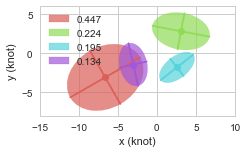

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.989  0.024      0.285  3.265927e-08      0.019       0.177

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.025      0.208  3.071917e-08      0.019       0.172

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.697  -3.810  -1.447  6.619  4.799   0.540
2  0.162   2.436  -1.931  2.422  1.961   0.655
3  0.072  -3.279  -1.075  1.399  3.091   0.111
4  0.069   3.610   2.543  2.106  1.583  -0.343

GMM Plot Result
0.69665934203 [[-3.81007017 -1.44693374]] [ 3.65407462  7.31350211] -60.5940029924
0.162202529591 [[ 2.43583719 -1.93094765]] [ 1.2583492   2.85104184] -54.0041488876
0.0717648381513 [[-3.27911829 -1.07454047]] [ 1.38804977  3.09545116] 176.40578874
0.0693732902277 [[ 3.61026787  2.54326451]] [ 1.40469918  2.22877045] -114.946241365


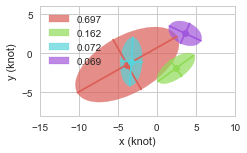

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.991  0.010      0.033  2.579532e-08      0.017       0.158

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.011      0.032  2.938775e-08      0.019       0.168

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.731  -3.341  -1.112  6.284  4.817   0.535
2  0.167   2.705  -1.714  2.569  2.121   0.705
3  0.055  -3.043  -1.906  1.572  2.252  -0.414
4  0.047   3.324   2.569  1.569  1.384  -0.345

GMM Plot Result
0.731430348781 [[-3.34057727 -1.11200862]] [ 3.63531902  7.03390748] -58.3497374632
0.166993351316 [[ 2.7045876  -1.71442633]] [ 1.25097894  3.08738427] -52.6335888407
0.0548580156712 [[-3.04315847 -1.90636479]] [ 1.34631526  2.39329454] -155.805238461
0.0467182842314 [[ 3.32443225  2.56897681]] [ 1.17965425  1.72847473] -124.975840467


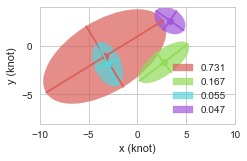

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.009      0.025  2.863457e-08      0.019       0.166

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.008      0.034  2.956808e-08      0.019       0.169

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.464  -6.499  -3.027  4.933  4.329   0.277
2  0.225   3.364   2.721  3.444  2.363  -0.159
3  0.197   2.419  -1.944  2.304  1.949   0.564
4  0.115  -3.042  -1.379  1.699  2.671  -0.157

GMM Plot Result
0.463695587639 [[-6.49867437 -3.02664342]] [ 3.87309415  5.29828438] -57.6589407714
0.225121790969 [[ 3.36393912  2.721173  ]] [ 2.30869147  3.48081647] -101.190834566
0.196555364781 [[ 2.4194978  -1.94386056]] [ 1.38215873  2.68275652] -53.2883791964
0.114627256611 [[-3.04208575 -1.37915955]] [ 1.66401672  2.69233373] -170.728444447


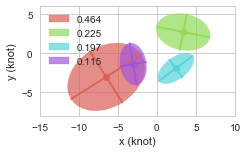

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.026      0.190  2.961259e-08      0.018       0.169

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.989  0.025      0.175  3.388422e-08      0.020       0.180

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.733  -3.479  -1.172  6.350  4.712   0.521
2  0.169   2.717  -1.727  2.612  2.114   0.693
3  0.050  -3.359  -1.698  1.377  2.194  -0.128
4  0.047   3.498   2.493  1.562  1.383  -0.275

GMM Plot Result
0.73301424777 [[-3.47916087 -1.17190104]] [ 3.63664417  7.0214222 ] -60.0668352669
0.169394634913 [[ 2.7166975  -1.72739533]] [ 1.28092365  3.10669953] -53.5437902867
0.0501889507869 [[-3.35937451 -1.69794969]] [ 1.35857727  2.20523858] -172.603619539
0.04740216653 [[ 3.49782471  2.49319198]] [ 1.23525605  1.68164664] -123.058988003


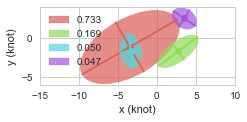

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.991  0.009      0.035  2.693214e-08      0.018       0.161

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.010      0.030  2.860211e-08      0.018       0.166

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.450  -6.613  -3.049  4.877  4.223   0.253
2  0.223   3.055   2.861  3.701  2.204  -0.205
3  0.199   2.497  -1.828  2.272  1.979   0.553
4  0.128  -3.172  -1.446  1.787  2.599  -0.163

GMM Plot Result
0.450284488634 [[-6.6128065  -3.04897979]] [ 3.84925997  5.17704177] -59.873549389
0.223045254475 [[ 3.05502207  2.86059601]] [ 2.13370297  3.74158045] -100.345195166
0.198631118541 [[ 2.49664484 -1.82765999]] [ 1.40549866  2.66549368] -52.0272334499
0.128039138351 [[-3.17241507 -1.44613875]] [ 1.74325685  2.6282945 ] -168.485374054


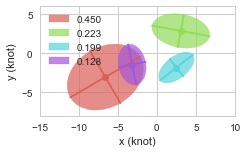

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.988  0.028      0.614  3.505675e-08      0.020       0.184

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.028      0.308  2.924213e-08      0.018       0.168

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.685  -3.434  -1.254  6.667  4.877   0.541
2  0.175   2.678  -1.697  2.482  2.036   0.661
3  0.086  -3.527  -1.516  1.676  2.912   0.120
4  0.054   3.137   2.712  1.897  1.585  -0.367

GMM Plot Result
0.684690940489 [[-3.4344938  -1.25405066]] [ 3.70371644  7.38351272] -60.209504802
0.174595955293 [[ 2.67750292 -1.69664278]] [ 1.28984953  2.93962603] -53.3874778246
0.0864093223123 [[-3.52725812 -1.51640338]] [ 1.65818724  2.92230917] 174.184473422
0.0543037819054 [[ 3.13676305  2.71236756]] [ 1.35102352  2.07020805] -121.891366397


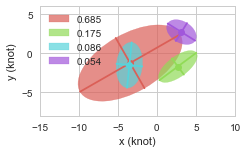

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.012      0.032  2.936392e-08      0.018       0.168

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.014      0.030  2.855173e-08      0.018       0.166

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.634  -4.068  -1.575  6.704  4.818   0.536
2  0.180   2.683  -1.766  2.489  2.096   0.653
3  0.103  -3.341  -1.477  1.643  2.710  -0.094
4  0.084   2.980   2.793  2.814  1.502  -0.368

GMM Plot Result
0.633628546218 [[-4.06818592 -1.57508255]] [ 3.69218268  7.38388446] -61.0458734262
0.179750849504 [[ 2.68334852 -1.76613392]] [ 1.33164946  2.96942492] -52.4116936795
0.102509452617 [[-3.34141336 -1.47655943]] [ 1.63157103  2.71734438] -174.866671965
0.0841111516615 [[ 2.98004757  2.79331601]] [ 1.36279641  2.88389293] -104.386789466


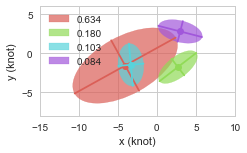

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.989  0.009      0.036  3.170217e-08      0.020       0.175

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.011      0.032  2.950414e-08      0.019       0.168

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.455  -6.593  -3.000  4.749  4.270   0.282
2  0.227   3.140   2.957  3.869  2.470  -0.111
3  0.201   2.613  -1.702  2.199  2.077   0.531
4  0.117  -3.158  -1.716  1.786  2.394  -0.296

GMM Plot Result
0.455466161455 [[-6.59299415 -2.99995781]] [ 3.77812077  5.14892518] -55.3559119185
0.226792064752 [[ 3.13965912  2.95744863]] [ 2.44480546  3.88518666] -96.7113233349
0.200631210672 [[ 2.61314316 -1.70246891]] [ 1.46092075  2.6482494 ] -48.0791710662
0.117110563121 [[-3.15780894 -1.7163448 ]] [ 1.6328546   2.50111553] -157.566594131


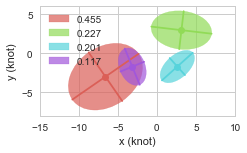

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.989  0.024      0.108  3.113317e-08      0.019       0.173

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.988  0.023      0.088  3.588598e-08      0.020       0.186

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.688  -3.843  -1.378  6.461  4.805   0.540
2  0.177   2.656  -1.738  2.587  2.119   0.691
3  0.074  -3.361  -1.359  1.504  2.718  -0.081
4  0.060   3.234   2.778  2.001  1.423  -0.248

GMM Plot Result
0.688105715578 [[-3.84299453 -1.37843557]] [ 3.63697282  7.18379856] -59.5456966528
0.177290024103 [[ 2.65627633 -1.73809008]] [ 1.28368958  3.0880768 ] -53.1048095026
0.0741219497471 [[-3.36056387 -1.35856523]] [ 1.49649589  2.72171573] -176.301674304
0.0604823105725 [[ 3.23358792  2.77845288]] [ 1.34122698  2.05665769] -107.752165982


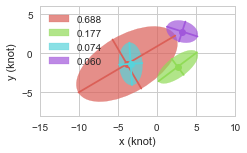

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.991  0.009      0.051  2.510506e-08      0.018       0.155

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.991  0.011      0.033  2.699568e-08      0.018       0.161

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.433  -6.750  -3.205  4.667  4.233   0.262
2  0.237   2.913   2.920  3.944  2.219  -0.152
3  0.204   2.463  -1.791  2.282  1.992   0.544
4  0.127  -3.181  -1.624  1.801  2.515  -0.222

GMM Plot Result
0.432604307307 [[-6.74955525 -3.20489655]] [ 3.78437326  5.037456  ] -55.2411673358
0.236567365023 [[ 2.91341288  2.9203491 ]] [ 2.1816235   3.96461641] -97.0461280327
0.203511879555 [[ 2.46254018 -1.79141069]] [ 1.42822274  2.67134908] -52.0311349883
0.127316448115 [[-3.18073544 -1.62354944]] [ 1.71597202  2.57348469] -163.424532774


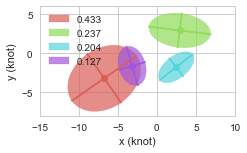

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.988  0.029      0.357  3.460928e-08      0.020       0.182

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.028      0.259  2.989176e-08      0.019       0.169

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.689  -3.566  -1.202  6.556  4.829   0.528
2  0.170   2.534  -1.827  2.438  2.079   0.670
3  0.085  -3.417  -1.643  1.517  2.582  -0.084
4  0.056   3.353   2.669  1.990  1.535  -0.223

GMM Plot Result
0.689066268458 [[-3.56586801 -1.20187285]] [ 3.7100261  7.2486398] -60.235385859
0.170320428673 [[ 2.53388768 -1.82718392]] [ 1.28226977  2.93662837] -51.7249027221
0.0849739339555 [[-3.41661762 -1.64327174]] [ 1.50862624  2.58692141] -175.701947369
0.0556393689134 [[ 3.35329719  2.66883974]] [ 1.45089471  2.05159788] -110.158626662


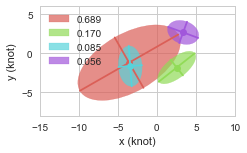

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.993  0.009      0.033  2.015135e-08      0.015       0.139

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.011      0.028  2.871857e-08      0.018       0.166


Wall time: 28.2 s


In [93]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, FIT_METHOD, NUMBER_OF_GAUSSIAN, config) for i in range(12))                        
for result in results:
    display(pretty_print_gmm(result['gmm']))
    fig,ax = plt.subplots(figsize=(3.5,3.5))
    plot_gmm_ellipses(result['gmm'],ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
    plt.show()
    
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))
    display(gof_df(result['gmm_pdf_result'], kde_result))
    print('')

## 7.2 Cross-validation, to select the number of Gaussian

In [97]:
number_of_fold

4

In [99]:
# %%time
from sklearn.model_selection import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,6)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(n_splits=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf.split(df))                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

Number of train/test dataset 10956.0 3652.0
  
Number of gaussian 1
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.174857  0.053766  3.586140e-07    0.063615     0.586685  0.880277
1    0.131740  0.056173  3.702615e-07    0.066063     0.596767  0.874686
2    0.156087  0.053852  3.542359e-07    0.064592     0.583236  0.877827
3    0.168989  0.055184  3.527297e-07    0.063948     0.582064  0.880303

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.158327  0.059972  3.815714e-07    0.068089     0.606184  0.865080
1    0.379029  0.050736  3.274274e-07    0.059157     0.559754  0.888883
2    0.167236  0.053541  3.975000e-07    0.066601     0.618250  0.872321
3    0.188136  0.056947  4.002049e-07    0.067539     0.620128  0.865303

  
Number of gaussian 2
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.089073  0.019718  9.418831e-08    0.033024     0.300666  0.968094
1    0.068974  0.019439  9.941129e-08    0.033992     0.309022  0.966273
2    0.079036  0.017134  9.162955e-08    0.033304     0.296879  0.968754
3    0.091983  0.016927  8.529922e-08    0.030881     0.286183  0.971250

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.126537  0.018975  1.002231e-07    0.034574     0.310683  0.966032
1    0.196695  0.019891  1.004220e-07    0.033542     0.310592  0.966279
2    0.106722  0.020679  1.306892e-07    0.035969     0.353612  0.956857
3    0.104081  0.031323  1.513520e-07    0.043980     0.381565  0.948275

  
Number of gaussian 3
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.075410  0.013185  8.441760e-08    0.031721     0.284584  0.971051
1    0.093682  0.014873  9.540812e-08    0.032208     0.302632  0.968161
2    0.039718  0.015439  9.258555e-08    0.033222     0.298517  0.968852
3    0.044489  0.015533  8.981700e-08    0.032833     0.293735  0.969164

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.090417  0.018557  1.401332e-07    0.039165     0.367603  0.954380
1    0.074379  0.017615  1.015249e-07    0.037204     0.312615  0.964094
2    0.057029  0.024532  1.099947e-07    0.034122     0.324104  0.962059
3    0.069764  0.012786  1.152842e-07    0.035173     0.332772  0.962505

  
Number of gaussian 4
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.036788  0.008824  2.366188e-08    0.015891     0.150647  0.992047
1    0.168591  0.025021  3.055066e-08    0.018787     0.171332  0.989652
2    0.030732  0.010054  2.620246e-08    0.017866     0.158608  0.991104
3    0.029968  0.008988  2.689463e-08    0.018236     0.160882  0.990801

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.049833  0.020410  5.735825e-08    0.028042     0.235280  0.980130
1    0.434250  0.027691  4.998008e-08    0.024497     0.219030  0.983103
2    0.066367  0.016416  4.336753e-08    0.021129     0.204274  0.985404
3    0.048580  0.017268  5.436717e-08    0.023182     0.227898  0.982154

  
Number of gaussian 5
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.019995  0.018182  1.876999e-08    0.014448     0.134314  0.993706
1    0.027527  0.010940  1.737345e-08    0.014233     0.129145  0.994152
2    0.027458  0.010072  1.456004e-08    0.013360     0.118315  0.995017
3    0.017168  0.004932  1.376689e-08    0.012669     0.114954  0.995291

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.044706  0.019089  5.324474e-08    0.026868     0.225974  0.981490
1    0.049809  0.025134  3.868676e-08    0.021253     0.192961  0.986661
2    0.054529  0.016871  5.605361e-08    0.023813     0.231748  0.981640
3    0.035869  0.017063  5.691219e-08    0.025787     0.234082  0.981338

In [100]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

Train gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.157918  0.054744  3.589603e-07    0.064555     0.587188  0.878273
2    0.082266  0.018305  9.263209e-08    0.032800     0.298187  0.968593
3    0.063325  0.014757  9.055707e-08    0.032496     0.294867  0.969307
4    0.066520  0.013222  2.682741e-08    0.017695     0.160367  0.990901
5    0.023037  0.011032  1.611759e-08    0.013677     0.124182  0.994542

Test gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.223182  0.055299  3.766759e-07    0.065347     0.601079  0.872897
2    0.133509  0.022717  1.206716e-07    0.037017     0.339113  0.959361
3    0.072897  0.018372  1.167343e-07    0.036416     0.334274  0.960760
4    0.149757  0.020446  5.126826e-08    0.024213     0.221620  0.982698
5    0.046228  0.019539  5.122433e-08    0.024430     0.221192  0.982782

R_square


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


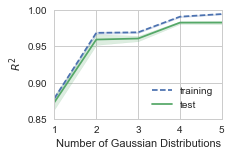

K_S


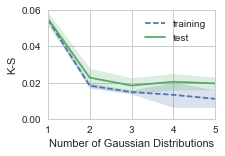

Chi_square


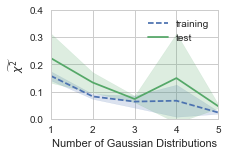

In [101]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '--', label = 'training', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Gaussian Distributions', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    if column == 'R_square':
        plt.gca().set_ylim(top=1)
    if column == 'K_S' or column == 'Chi_square':
        plt.gca().set_ylim(bottom=0)
    plt.show()

In [ ]:
# for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
#     display(fig)
# for fig in [fig_time_variability_3d, fig_time_variability_cdf, fig_time_variability_weibull, 
#             fig_adjecent_variability_3d, fig_adjecent_variability_cdf, fig_adjecent_variability_weibull,]:
#     display(fig)

In [ ]:

import time
save_notebook()
time.sleep(3)
location_name = get_location_name(file_path)
print(location_name)
current_file = 'GMM.ipynb'
output_file = 'D:/output_HTML/'+location_name+'.html' 

output_HTML(current_file, output_file)